# HR Analytics
<br>
This repo contains the HR Analytics project as part of my data science portfolio. The objective is to predict employee attrition using a HR dataset from IBM Watson Analytics Sample Data - [HR Employee Attrition & Performance](https://www.ibm.com/communities/analytics/watson-analytics-blog/hr-employee-attrition/) which contains employee data for 1,470 employees with various information about the employees. 



1. [Problem Statement](#problem)
2. [Dataset](#data)
3. [Exploratory Data Analysis](#eda)
4. [Pre-processing Pipeline](#pre)
5. [Building Machine Learning Models](#ml)
6. [Discussion and Conclusion](#conclusion)

# <a name="problem">Problem Statement</a>
Although some staff turnover is inevitable in any company, a high attrition rate is costly. Employee attrition is the overall turnover within a company as existing employees leave and new ones are hired. The attrition rate is usually calculated as the percentage of employees leaving the company over a specified period of time. Recruitment, hiring and training all involve financial costs and a new employee may not be immediately productive in terms of creating profit. The amount of time spent to interview and find a replacement, and the loss of productivity for several months while the new employee gets accustomed to the new role, are indirect costs to the company. These costs can significantly increase if executive-level or highest-paid employees are to be replaced. As such, the costs of replacing employees for most companies are often very significant.

An unusually high employee attrition rate is also considered indicative of problems within the company. Uncompetitive pay scales, micromanagement, ineffective human resource management (HRM) practices and unreasonable expectations can all lead to unacceptable levels of staff turnover. Understanding why and when employees are most likely to leave can lead to actions to improve employee retention as well as possibly planning new hiring in advance. 

In this project, I will attempt to answer the following questions: 

- What is the probability % of an employee leaving the company? 
- What are the key drivers of an employee leaving the company? 
- What are the recommendations or strategies that can be adopted to improve employee retention?

This is a standard supervised classification problem where the target or label is a binary variable, 0 (active employee), 1 (ex-employee). The objective is to predict employee attrition based on various information about the employee. I will also attempt to generate the probability of an employee leaving the company as our target variable.

# <a name="data">Dataset</a>

The dataset used in this project is IBM Watson Analytics Sample Data - [HR Employee Attrition & Performance🔗](https://www.kaggle.com/datasets/bhanupratapbiswas/hr-analytics-case-study) . The dataset contains 1,470 rows corresponding to 1,470 employees with their various information. It is also available directly within Watson Analytics as Employee Performance. As mentioned on IBM website, the purpose of the dataset is to

> *Uncover the factors that lead to employee attrition and explore important questions such as ‘show me a breakdown of distance from home by job role and attrition’ or ‘compare average monthly income by education and attrition’. This is a fictional data set created by IBM data scientists.*

# <a name="eda">Exploratory Data Analysis</a>

## Importing Libraries :

In [1]:
# import libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns


In [2]:
# Loading the dataset
df_raw =  pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

# make a copy of the original source file
df = df_raw.copy()

print("Size of dataset is: {}".format(df.shape))
df.head()

Size of dataset is: (1470, 35)


Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

There are 35 columns and 1,470 rows.

In [3]:
# dataset columns
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [4]:
# columns datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
# groupby column data types
df.columns.groupby(df.dtypes)

{int64: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'], object: ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']}

In [6]:
df.isnull().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

In [7]:
# number of columns
print("No of columns for {} is {}.".format(list(df.columns.groupby(df.dtypes).keys())[0], len(df.columns.groupby(df.dtypes)[list(df.columns.groupby(df.dtypes).keys())[0]])))
print("No of columns for {} is {}.".format(list(df.columns.groupby(df.dtypes).keys())[1], len(df.columns.groupby(df.dtypes)[list(df.columns.groupby(df.dtypes).keys())[1]])))

No of columns for int64 is 26.
No of columns for object is 9.


In [8]:
# check for missing values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [9]:
df.shape

(1470, 35)

In [10]:
# Checking kthe duplicate values
df[df.duplicated()]

Empty DataFrame
Columns: [Age, Attrition, BusinessTravel, DailyRate, Department, DistanceFromHome, Education, EducationField, EmployeeCount, EmployeeNumber, EnvironmentSatisfaction, Gender, HourlyRate, JobInvolvement, JobLevel, JobRole, JobSatisfaction, MaritalStatus, MonthlyIncome, MonthlyRate, NumCompaniesWorked, Over18, OverTime, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, StandardHours, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager]
Index: []

[0 rows x 35 columns]

In [11]:
# summary statistics
df.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  ...  RelationshipSatisfaction  StandardHours  \
count  1470.000000  ...               1470.000000         1470.0   
mean      2.063946  ...                  2.712245           80.0   
std       1.106940  ...                  1.081209            0.0   
min       1.000000  ...                  1.000000           80.0   
25%       1.000000  ...                  2.000000           80.0   
50%       2.000000  ...                  3.000000           80.0   
75%       3.000000  ...                  4.000000           80.0   
max       5.000000  ...                  4.000000           80.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1470.000000        1470.000000            1470.000000   
mean           0.793878          11.279592               2.799320   
std            0.852077           7.780782               1.289271   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1470.000000     1470.000000         1470.000000   
mean          2.761224        7.008163            4.229252   
std           0.706476        6.126525            3.623137   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1470.000000           1470.000000  
mean                  2.187755              4.123129  
std                   3.222430              3.568136  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 26 columns]

## Inference:
There are only 26 Numerical Attributes in the dataset.
On the other hand we have 9 Categorical Attributes.

In [12]:
# summary statistics
df.describe(include="all")

Age Attrition BusinessTravel    DailyRate  \
count   1470.000000      1470           1470  1470.000000   
unique          NaN         2              3          NaN   
top             NaN        No  Travel_Rarely          NaN   
freq            NaN      1233           1043          NaN   
mean      36.923810       NaN            NaN   802.485714   
std        9.135373       NaN            NaN   403.509100   
min       18.000000       NaN            NaN   102.000000   
25%       30.000000       NaN            NaN   465.000000   
50%       36.000000       NaN            NaN   802.000000   
75%       43.000000       NaN            NaN  1157.000000   
max       60.000000       NaN            NaN  1499.000000   

                    Department  DistanceFromHome    Education EducationField  \
count                     1470       1470.000000  1470.000000           1470   
unique                       3               NaN          NaN              6   
top     Research & Development               NaN          NaN  Life Sciences   
freq                       961               NaN          NaN            606   
mean                       NaN          9.192517     2.912925            NaN   
std                        NaN          8.106864     1.024165            NaN   
min                        NaN          1.000000     1.000000            NaN   
25%                        NaN          2.000000     2.000000            NaN   
50%                        NaN          7.000000     3.000000            NaN   
75%                        NaN         14.000000     4.000000            NaN   
max                        NaN         29.000000     5.000000            NaN   

        EmployeeCount  EmployeeNumber  ...  RelationshipSatisfaction  \
count          1470.0     1470.000000  ...               1470.000000   
unique            NaN             NaN  ...                       NaN   
top               NaN             NaN  ...                       NaN   
freq              NaN             NaN  ...                       NaN   
mean              1.0     1024.865306  ...                  2.712245   
std               0.0      602.024335  ...                  1.081209   
min               1.0        1.000000  ...                  1.000000   
25%               1.0      491.250000  ...                  2.000000   
50%               1.0     1020.500000  ...                  3.000000   
75%               1.0     1555.750000  ...                  4.000000   
max               1.0     2068.000000  ...                  4.000000   

       StandardHours  StockOptionLevel  TotalWorkingYears  \
count         1470.0       1470.000000        1470.000000   
unique           NaN               NaN                NaN   
top              NaN               NaN                NaN   
freq             NaN               NaN                NaN   
mean            80.0          0.793878          11.279592   
std              0.0          0.852077           7.780782   
min             80.0          0.000000           0.000000   
25%             80.0          0.000000           6.000000   
50%             80.0          1.000000          10.000000   
75%             80.0          1.000000          15.000000   
max             80.0          3.000000          40.000000   

        TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
count             1470.000000     1470.000000     1470.000000   
unique                    NaN             NaN             NaN   
top                       NaN             NaN             NaN   
freq                      NaN             NaN             NaN   
mean                 2.799320        2.761224        7.008163   
std                  1.289271        0.706476        6.126525   
min                  0.000000        1.000000        0.000000   
25%                  2.000000        2.000000        3.000000   
50%                  3.000000        3.000000        5.000000   
75%                  3.000000        3.000000        9.000000   
max      

# Inference:
        1.The Minimum Age is 18 which conveys that All employees are Adult. So there's no need of Over18 Attribute for our  
          analysis.
        2.The Stanard Deviation value of EmployeeCount and StandardHours is 0.00 which conveys that 
          All values present in this attribute are same.
        3. Attribute EmployeeNumber represents a unique value to each of the employees, which will not provide any 
           meaningful inisghts.
        4.Since this Attribute will not provide any meaningful insights in our analysis we can simply drop these attributes.

# Data Visualization

---
## Features / Input Variables

### Age

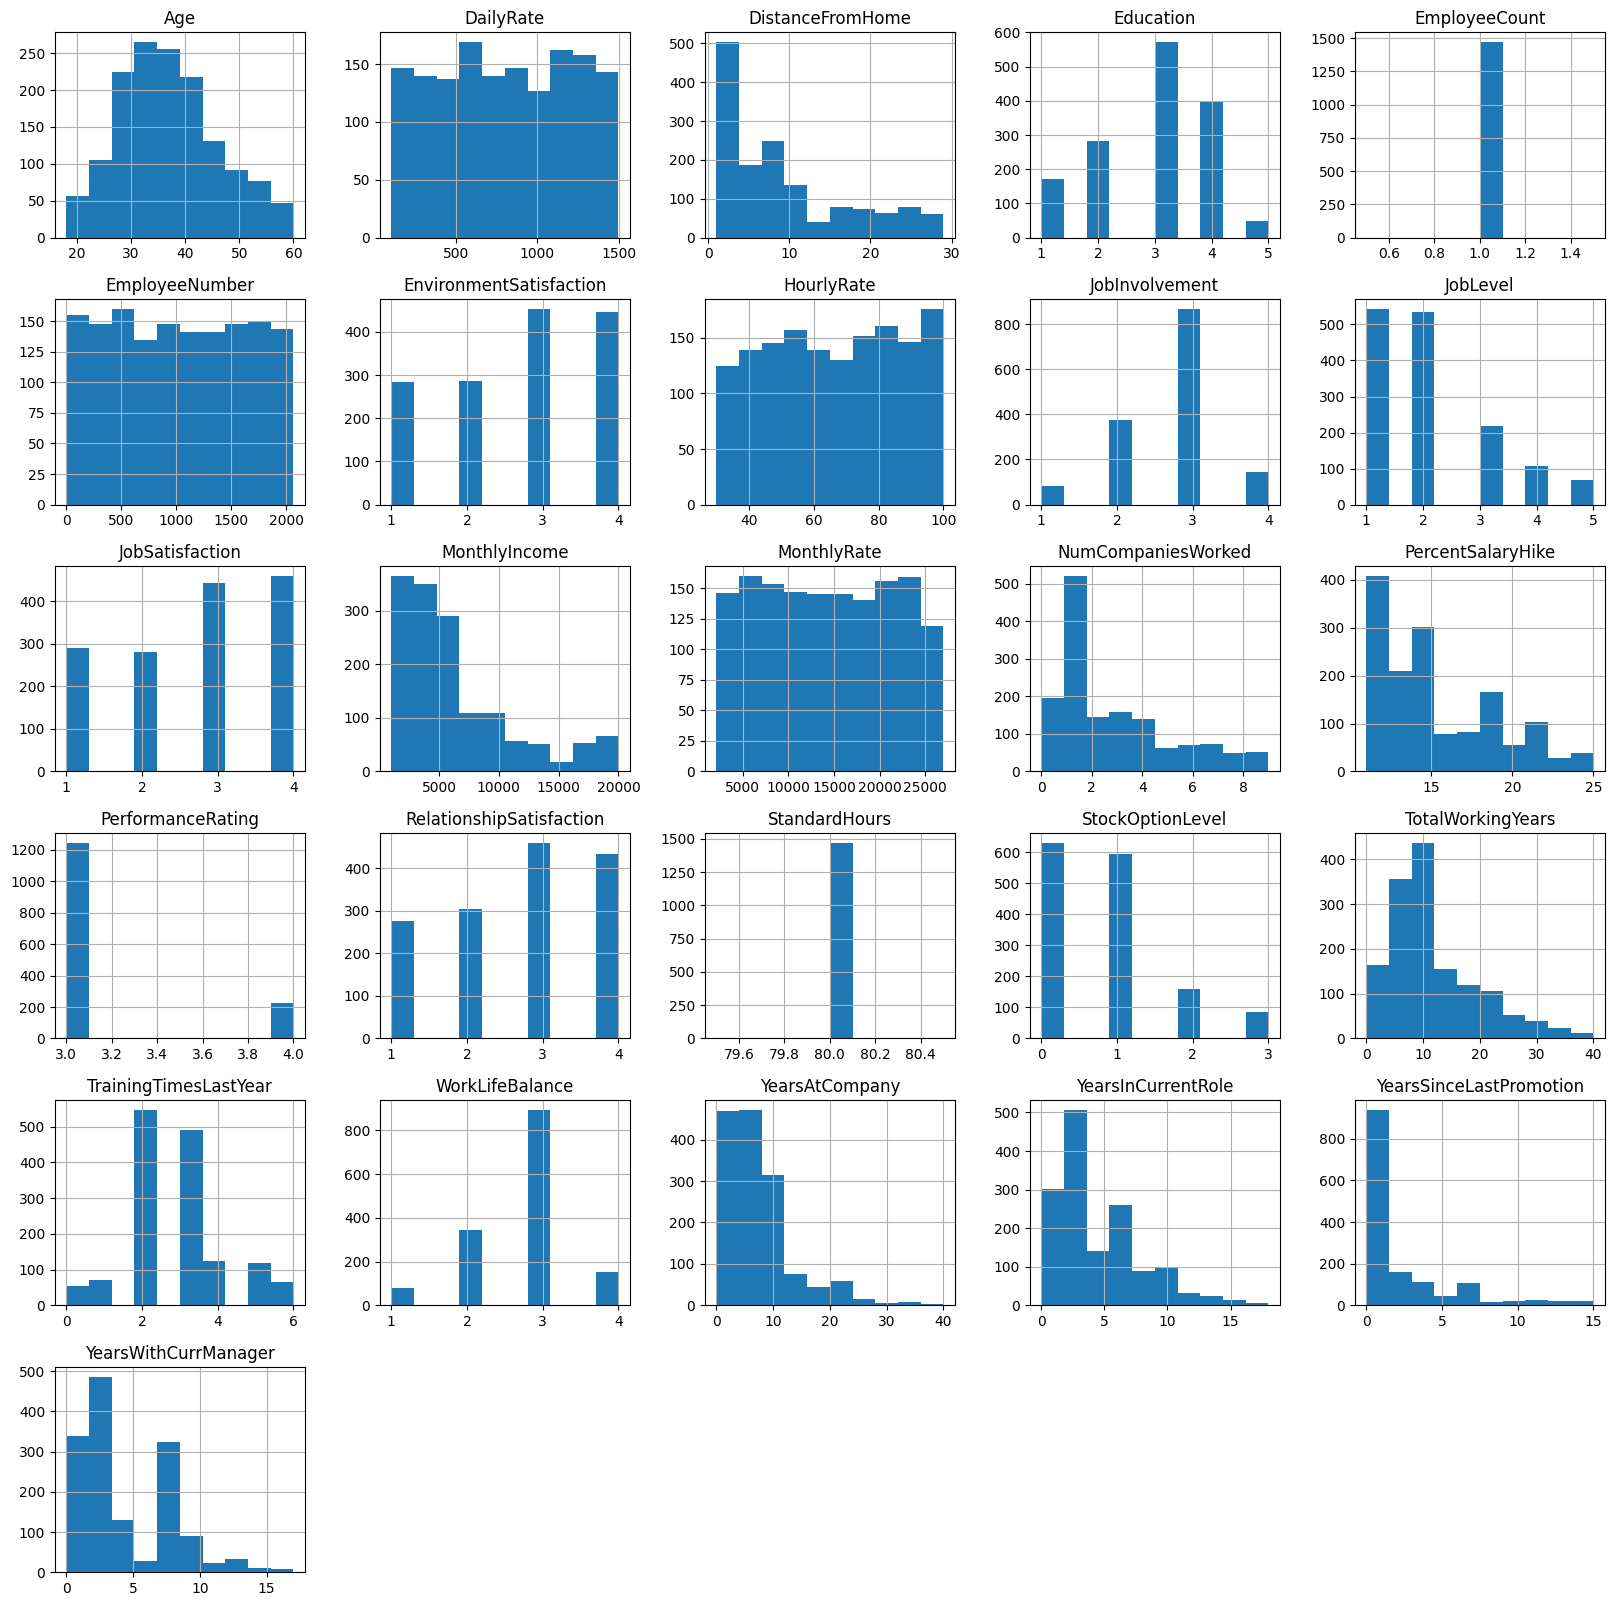

In [13]:
# plot histogram for numeric columns
df.hist(figsize=(20,20))
# plt.savefig("histograms.png", bbox_inches="tight")
plt.show()

In [14]:
# Age
print("Age of employees is from {} to {} years old.".format(df['Age'].min(), df['Age'].max()))

Age of employees is from 18 to 60 years old.


In [15]:
# Ex-Employees
print("Ex-Employees:")
print("Average Age of Ex-Employees = {:1.1f}".format(np.mean(df.loc[df['Attrition'] == 'Yes', 'Age'])))
print("Standard Deviation = {:1.1f}".format(np.std(df.loc[df['Attrition'] == 'Yes', 'Age'])))

Ex-Employees:
Average Age of Ex-Employees = 33.6
Standard Deviation = 9.7


In [16]:
# Active Employees
print("Active Employees:")
print("Average Age of Active Employees = {:1.1f}".format(np.mean(df.loc[df['Attrition'] == 'No', 'Age'])))
print("Standard Deviation = {:1.1f}".format(np.std(df.loc[df['Attrition'] == 'No', 'Age'])))

Active Employees:
Average Age of Active Employees = 37.6
Standard Deviation = 8.9


We can create a kernel density estimation (KDE) plot colored by the value of the target. A kernel density estimation (KDE) is a non-parametric way to estimate the probability density function of a random variable. Density plots are representations of the underlying distribution.

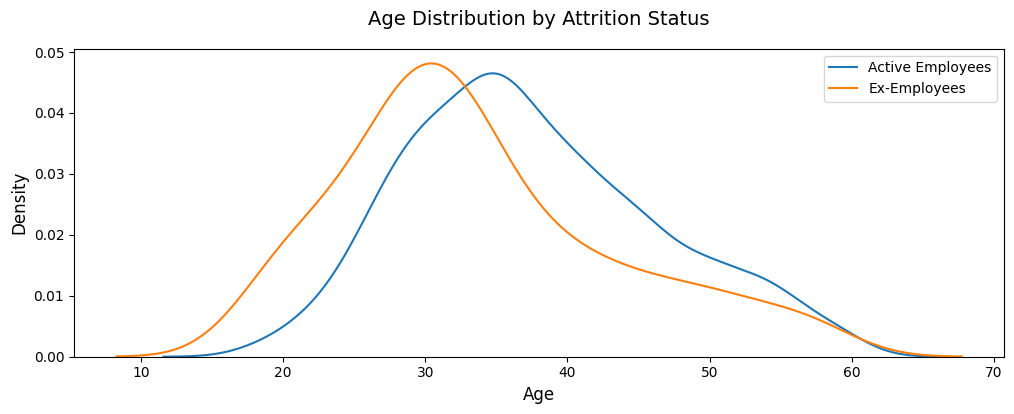

In [17]:
# kernel density estimation (KDE) plot 

plt.subplots(figsize=(12,4))

target_0 = df.loc[df["Attrition"] == "No"]
target_1 = df.loc[df["Attrition"] == "Yes"]

sns.kdeplot(target_0["Age"], label="Active Employees")
sns.kdeplot(target_1["Age"], label="Ex-Employees")
plt.legend()
plt.xlabel("Age", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.title("Age Distribution by Attrition Status", x=0.5, y=1.05, ha="center", fontsize=14)

# plt.savefig("age_kde.png", bbox_inches="tight")
plt.show()

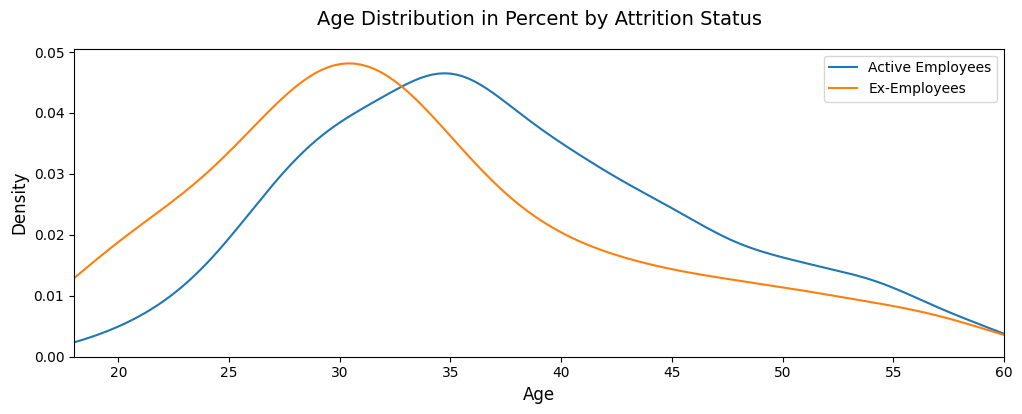

In [18]:
# kernel density estimation (KDE) plot 

plt.subplots(figsize=(12,4))

target_0 = df.loc[df["Attrition"] == "No"]
target_1 = df.loc[df["Attrition"] == "Yes"]

sns.kdeplot(target_0["Age"], label="Active Employees")
sns.kdeplot(target_1["Age"], label="Ex-Employees")
plt.legend()
plt.xlim(df["Age"].min(), df["Age"].max()) # Min-Max
plt.xlabel("Age", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.title("Age Distribution in Percent by Attrition Status", x=0.5, y=1.05, ha="center", fontsize=14)

# plt.savefig("age_kde.png", bbox_inches="tight")
plt.show()

According to KDE Plot diagram For Active Employe the density of attrition rate curve has groving for Age group between 30-45
on the other hand same curve has growing for ex employee age group between 25-35.It concludes the attrition rate by age is diffrent for Active & For Ex Employees.

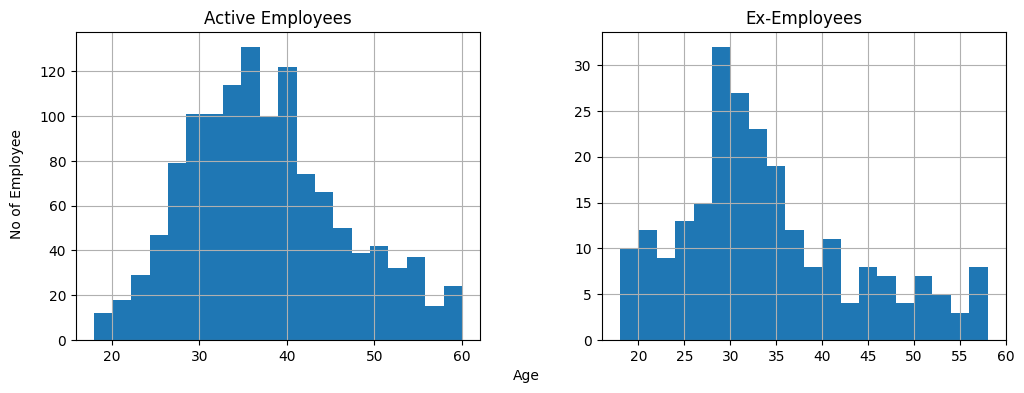

In [19]:
# plot histogram
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(12,4)

target_0[['Age']].hist(bins=20, ax=axes[0])
axes[0].set_title('Active Employees')

target_1[['Age']].hist(bins=20, ax=axes[1])
axes[1].set_title('Ex-Employees')

fig.text(0.5, 0.01, 'Age', ha='center')
fig.text(0.07, 0.5, 'No of Employee', va='center', rotation='vertical')

# plt.savefig("age_hist.png", bbox_inches="tight")
plt.show()

C:\Users\VivekG\AppData\Local\Temp\ipykernel_25508\221910583.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Attrition",y="Age",data=df,palette=["#D4A1E7","#6faea4"])


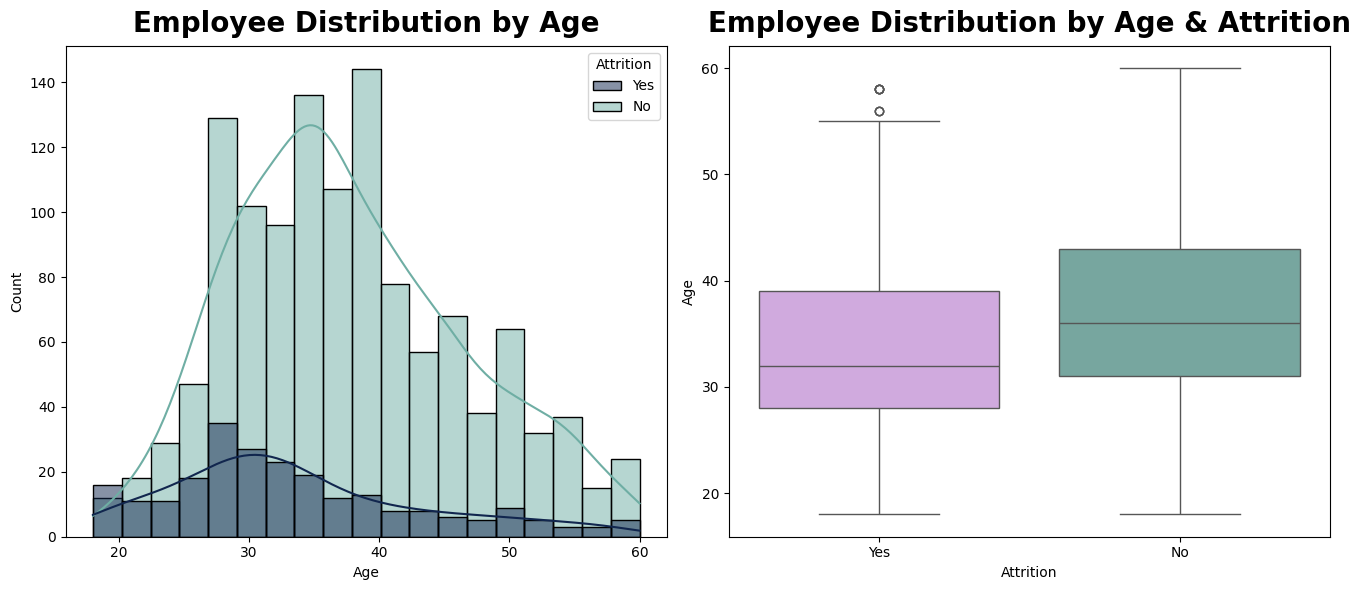

In [20]:
#Visualization to show Employee Distribution by Age.
plt.figure(figsize=(13.5,6))
plt.subplot(1,2,1)
sns.histplot(x="Age",hue="Attrition",data=df,kde=True,palette=["#11264e","#6faea4"])
plt.title("Employee Distribution by Age",fontweight="black",size=20,pad=10)

#Visualization to show Employee Distribution by Age & Attrition.
plt.subplot(1,2,2)
sns.boxplot(x="Attrition",y="Age",data=df,palette=["#D4A1E7","#6faea4"])
plt.title("Employee Distribution by Age & Attrition",fontweight="black",size=20,pad=10)
plt.tight_layout()
plt.show()

## Inference:
    1.Age of employees is from 18 to 60 years old.Most of the emloyees are between age 30 to 40. 
    2.The average age of ex-employees at 33.6 years old and 37.6 years old for current employees.
    3.From the boxplot we can also observe that the medain age of employee who left the organization is less than the 
      employees who are working in the organization.
    4.Employees with young age leaves the company more compared to elder employees.

### BUSINESS TRAVEL

In [21]:
# Travel status  of employees
df['BusinessTravel'].value_counts()

BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64

In [22]:
# Travel status of employees
df['BusinessTravel'].value_counts(normalize=True)

BusinessTravel
Travel_Rarely        0.709524
Travel_Frequently    0.188435
Non-Travel           0.102041
Name: proportion, dtype: float64

The employees who Travel for business trip are 70% travel rarerly & 10% of Emplouyee who didn't travel for buisness.

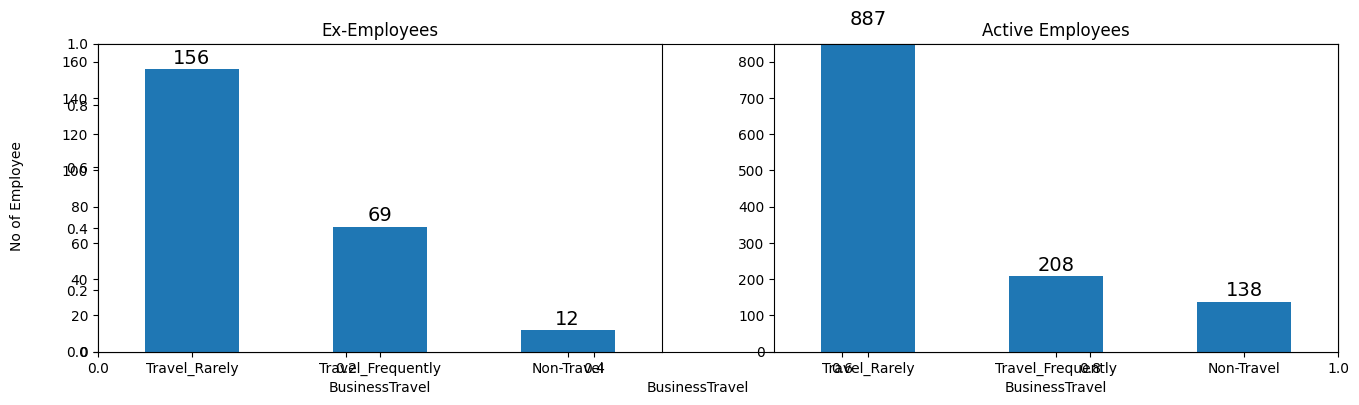

In [23]:
fig, axes = plt.subplots(figsize=(16,4))

plt.subplot(121)
g2 = df.loc[df['Attrition'] == 'Yes', 'BusinessTravel'].value_counts().plot.bar(title= 'Ex-Employees', color="#1f77b4")
plt.xticks(rotation=0)
plt.ylim(0,170)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+3, "{:1.0f}".format(height), ha="center", fontsize=14) 
    
plt.subplot(122)
g2 = df.loc[df['Attrition'] == 'No', 'BusinessTravel'].value_counts().plot.bar(title= 'Active Employees', color="#1f77b4")
plt.xticks(rotation=0)
plt.ylim(0,850)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+15, "{:1.0f}".format(height), ha="center", fontsize=14) 
    
fig.text(0.5, 0.01, 'BusinessTravel', ha='center')
fig.text(0.07, 0.5, 'No of Employee', va='center', rotation='vertical')

# plt.savefig("gender_hist_1.png", bbox_inches="tight")
plt.show()

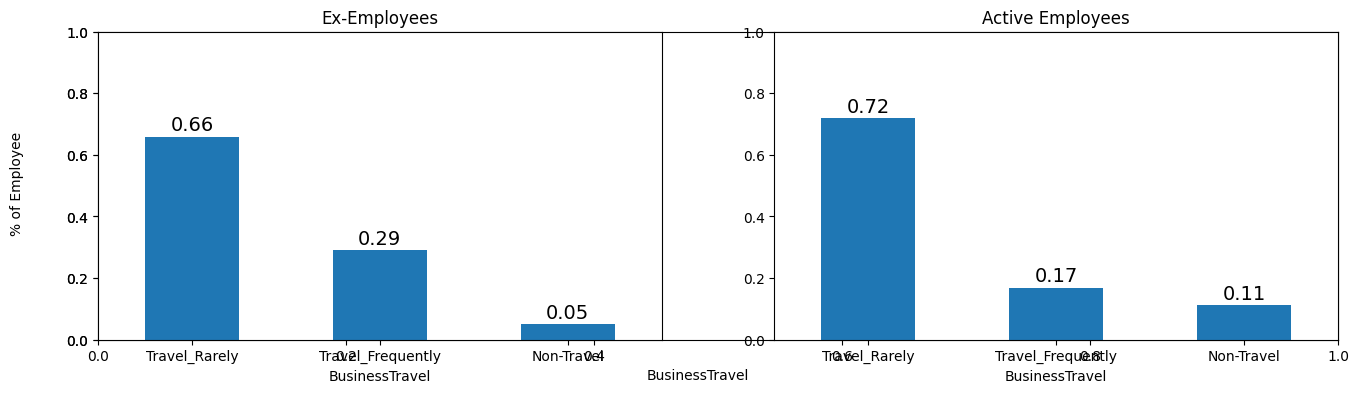

In [24]:
fig, axes = plt.subplots(figsize=(16,4))

plt.subplot(121)
g1 = df.loc[df['Attrition'] == 'Yes', 'BusinessTravel'].value_counts(normalize=True).plot.bar(title= 'Ex-Employees', color="#1f77b4")
plt.xticks(rotation=0)
plt.ylim(0,1)
for p in g1.patches:
    height = p.get_height()
    g1.text(p.get_x()+p.get_width()/2., height+0.02, "{:1.2f}".format(height), ha="center", fontsize=14) 
    
plt.subplot(122)
g2 = df.loc[df['Attrition'] == 'No', 'BusinessTravel'].value_counts(normalize=True).plot.bar(title= 'Active Employees', color="#1f77b4")
plt.xticks(rotation=0)
plt.ylim(0,1)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+0.02, "{:1.2f}".format(height), ha="center", fontsize=14) 
    
fig.text(0.5, 0.01, 'BusinessTravel', ha='center')
fig.text(0.07, 0.5, '% of Employee', va='center', rotation='vertical')

# plt.savefig("gender_hist_2.png", bbox_inches="tight")
plt.show()

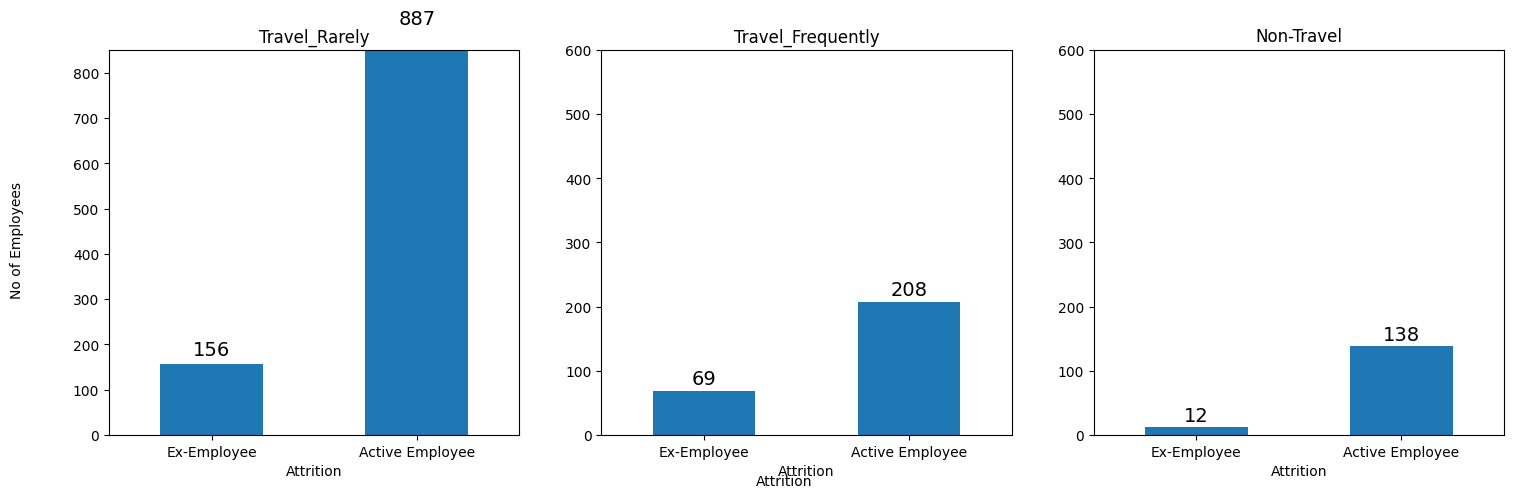

In [25]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # 3 subplots in one row

# Travel_Rarely
g1 = df.loc[df['BusinessTravel'] == 'Travel_Rarely', 'Attrition'].value_counts().reindex(["Yes", "No"]).plot.bar(
    ax=axes[0], title='Travel_Rarely', color="#1f77b4")
axes[0].set_xticklabels(["Ex-Employee", "Active Employee"])
axes[0].set_ylim(0, 850)
axes[0].tick_params(axis='x', rotation=0)
for p in g1.patches:
    height = p.get_height()
    g1.text(p.get_x() + p.get_width() / 2., height + 20, f"{height:.0f}", ha="center", fontsize=14)

# Travel_Frequently
g2 = df.loc[df['BusinessTravel'] == 'Travel_Frequently', 'Attrition'].value_counts().reindex(["Yes", "No"]).plot.bar(
    ax=axes[1], title='Travel_Frequently', color="#1f77b4")
axes[1].set_xticklabels(["Ex-Employee", "Active Employee"])
axes[1].set_ylim(0, 600)
axes[1].tick_params(axis='x', rotation=0)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x() + p.get_width() / 2., height + 10, f"{height:.0f}", ha="center", fontsize=14)

# Non-Travel
g3 = df.loc[df['BusinessTravel'] == 'Non-Travel', 'Attrition'].value_counts().reindex(["Yes", "No"]).plot.bar(
    ax=axes[2], title='Non-Travel', color="#1f77b4")
axes[2].set_xticklabels(["Ex-Employee", "Active Employee"])
axes[2].set_ylim(0, 600)
axes[2].tick_params(axis='x', rotation=0)
for p in g3.patches:
    height = p.get_height()
    g3.text(p.get_x() + p.get_width() / 2., height + 10, f"{height:.0f}", ha="center", fontsize=14)

fig.text(0.5, 0.01, 'Attrition', ha='center')
fig.text(0.07, 0.5, 'No of Employees', va='center', rotation='vertical')

# Save or show
# plt.savefig("Business_Travel.png", bbox_inches="tight")
plt.show()

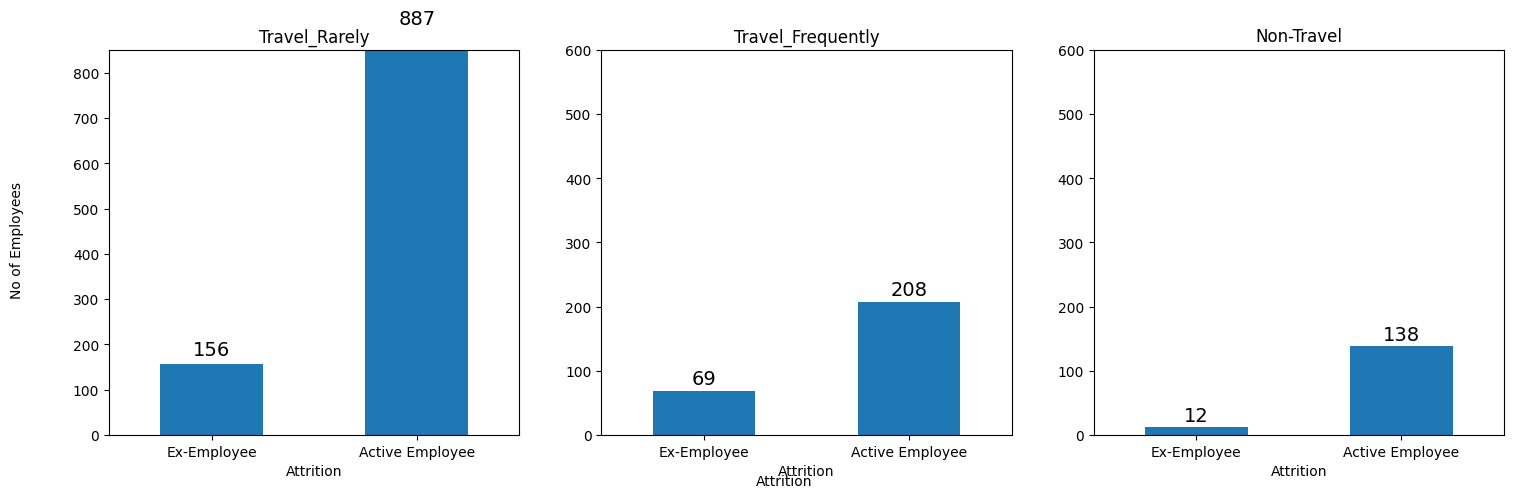

In [26]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # 3 subplots in one row

# Travel_Rarely
g1 = df.loc[df['BusinessTravel'] == 'Travel_Rarely', 'Attrition'].value_counts().reindex(["Yes", "No"]).plot.bar(
    ax=axes[0], title='Travel_Rarely', color="#1f77b4")
axes[0].set_xticklabels(["Ex-Employee", "Active Employee"])
axes[0].set_ylim(0, 850)
axes[0].tick_params(axis='x', rotation=0)
for p in g1.patches:
    height = p.get_height()
    g1.text(p.get_x() + p.get_width() / 2., height + 20, f"{height:.0f}", ha="center", fontsize=14)

# Travel_Frequently
g2 = df.loc[df['BusinessTravel'] == 'Travel_Frequently', 'Attrition'].value_counts().reindex(["Yes", "No"]).plot.bar(
    ax=axes[1], title='Travel_Frequently', color="#1f77b4")
axes[1].set_xticklabels(["Ex-Employee", "Active Employee"])
axes[1].set_ylim(0, 600)
axes[1].tick_params(axis='x', rotation=0)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x() + p.get_width() / 2., height + 10, f"{height:.0f}", ha="center", fontsize=14)

# Non-Travel
g3 = df.loc[df['BusinessTravel'] == 'Non-Travel', 'Attrition'].value_counts().reindex(["Yes", "No"]).plot.bar(
    ax=axes[2], title='Non-Travel', color="#1f77b4")
axes[2].set_xticklabels(["Ex-Employee", "Active Employee"])
axes[2].set_ylim(0, 600)
axes[2].tick_params(axis='x', rotation=0)
for p in g3.patches:
    height = p.get_height()
    g3.text(p.get_x() + p.get_width() / 2., height + 10, f"{height:.0f}", ha="center", fontsize=14)

fig.text(0.5, 0.01, 'Attrition', ha='center')
fig.text(0.07, 0.5, 'No of Employees', va='center', rotation='vertical')

# Save or show
# plt.savefig("Business_Travel.png", bbox_inches="tight")
plt.show()

C:\Users\VivekG\AppData\Local\Temp\ipykernel_25508\3105529220.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_2.index,y=value_2.values,palette=["#11264e","#6faea4","#FEE08B"])


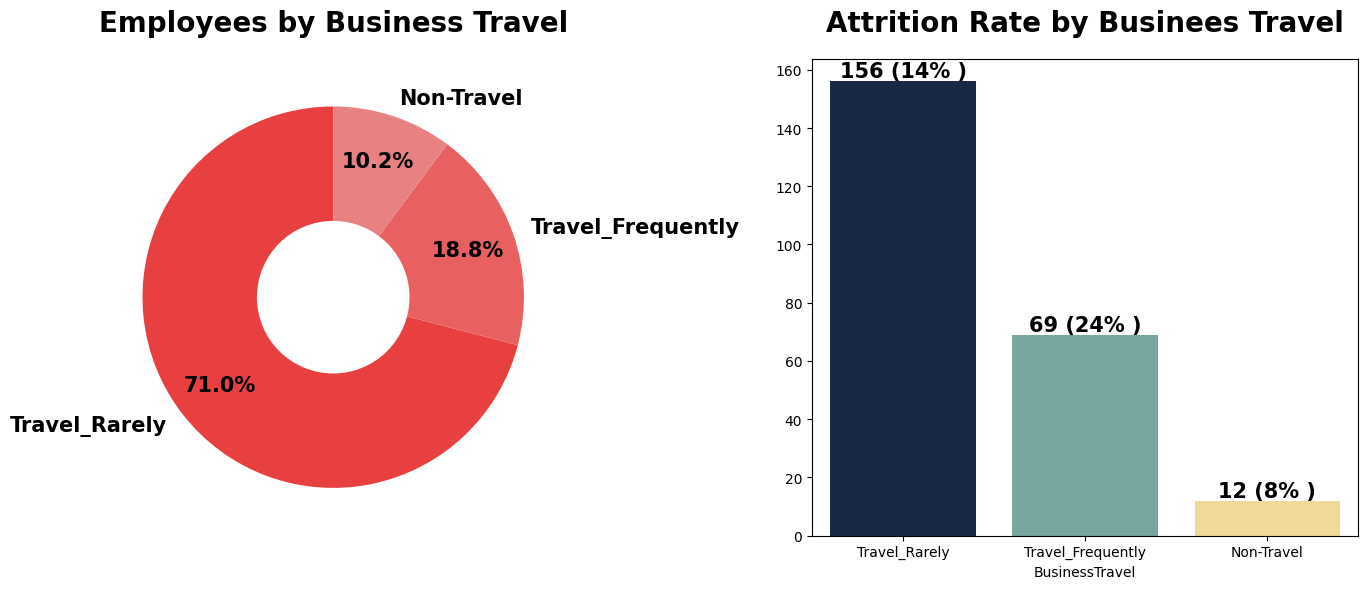

In [27]:
#Visualization to show Total Employees by Businees Travel.
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
value_1 = df["BusinessTravel"].value_counts()
plt.title("Employees by Business Travel", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%",pctdistance=0.75,startangle=90,
        colors=['#E84040', '#E96060', '#E88181'],textprops={"fontweight":"black","size":15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

#Visualization to show Attrition Rate by Businees Travel.
plt.subplot(1,2,2)
new_df = df[df["Attrition"]=="Yes"]
value_2 = new_df["BusinessTravel"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index,y=value_2.values,palette=["#11264e","#6faea4","#FEE08B"])
plt.title("Attrition Rate by Businees Travel",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(int(attrition_rate[index]))+"% )",ha="center",va="bottom",
             size=15,fontweight="black")
plt.tight_layout()
plt.show()

### Inference:
    1.Most of the employees in the organization Travel Rarely.
    2.Highest employee attrition can be observed by those employees who Travels Frequently.
    3.Lowest employee attrition can be observed by those employees who are Non-Travel.

### Gender


In [28]:
# Gender of employees
df['Gender'].value_counts()

Gender
Male      882
Female    588
Name: count, dtype: int64

In [29]:
# Gender of employees
df['Gender'].value_counts(normalize=True)

Gender
Male      0.6
Female    0.4
Name: proportion, dtype: float64

60% of the employees are Male while 40% are Female

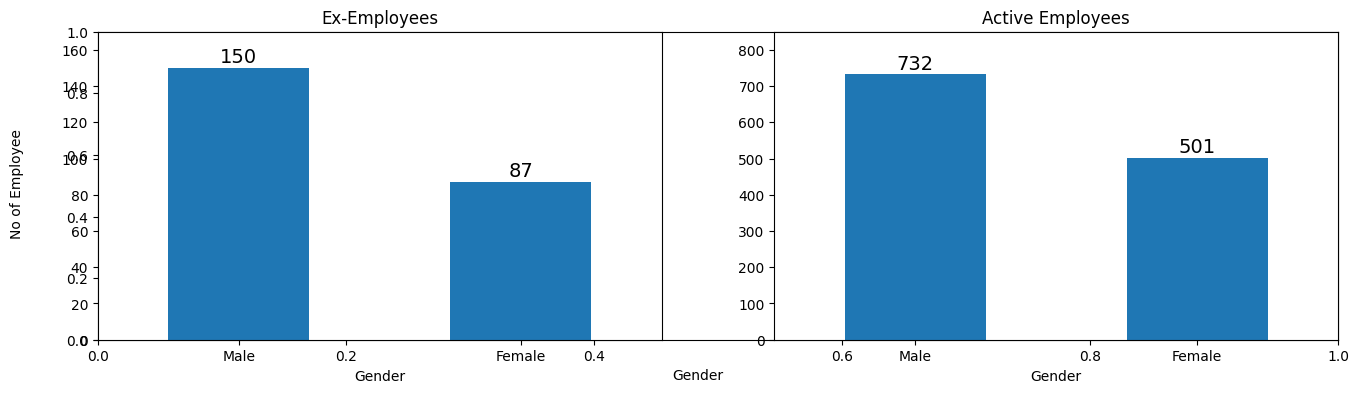

In [30]:
fig, axes = plt.subplots(figsize=(16,4))

plt.subplot(121)
g2 = df.loc[df['Attrition'] == 'Yes', 'Gender'].value_counts().plot.bar(title= 'Ex-Employees', color="#1f77b4")
plt.xticks(rotation=0)
plt.ylim(0,170)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+3, "{:1.0f}".format(height), ha="center", fontsize=14) 
    
plt.subplot(122)
g2 = df.loc[df['Attrition'] == 'No', 'Gender'].value_counts().plot.bar(title= 'Active Employees', color="#1f77b4")
plt.xticks(rotation=0)
plt.ylim(0,850)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+15, "{:1.0f}".format(height), ha="center", fontsize=14) 
    
fig.text(0.5, 0.01, 'Gender', ha='center')
fig.text(0.07, 0.5, 'No of Employee', va='center', rotation='vertical')

# plt.savefig("gender_hist_1.png", bbox_inches="tight")
plt.show()

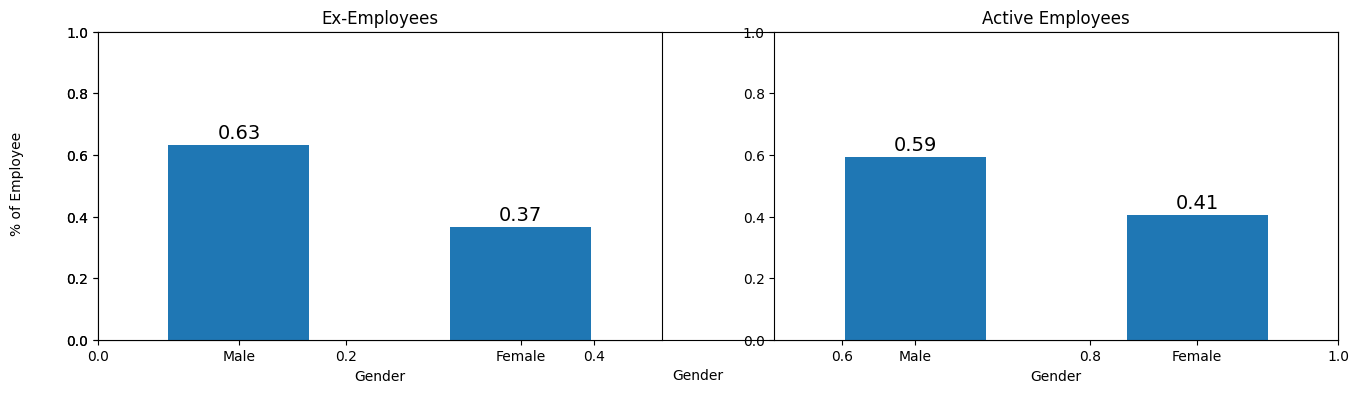

In [31]:
fig, axes = plt.subplots(figsize=(16,4))

plt.subplot(121)
g1 = df.loc[df['Attrition'] == 'Yes', 'Gender'].value_counts(normalize=True).plot.bar(title= 'Ex-Employees', color="#1f77b4")
plt.xticks(rotation=0)
plt.ylim(0,1)
for p in g1.patches:
    height = p.get_height()
    g1.text(p.get_x()+p.get_width()/2., height+0.02, "{:1.2f}".format(height), ha="center", fontsize=14) 
    
plt.subplot(122)
g2 = df.loc[df['Attrition'] == 'No', 'Gender'].value_counts(normalize=True).plot.bar(title= 'Active Employees', color="#1f77b4")
plt.xticks(rotation=0)
plt.ylim(0,1)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+0.02, "{:1.2f}".format(height), ha="center", fontsize=14) 
    
fig.text(0.5, 0.01, 'Gender', ha='center')
fig.text(0.07, 0.5, '% of Employee', va='center', rotation='vertical')

# plt.savefig("gender_hist_2.png", bbox_inches="tight")
plt.show()

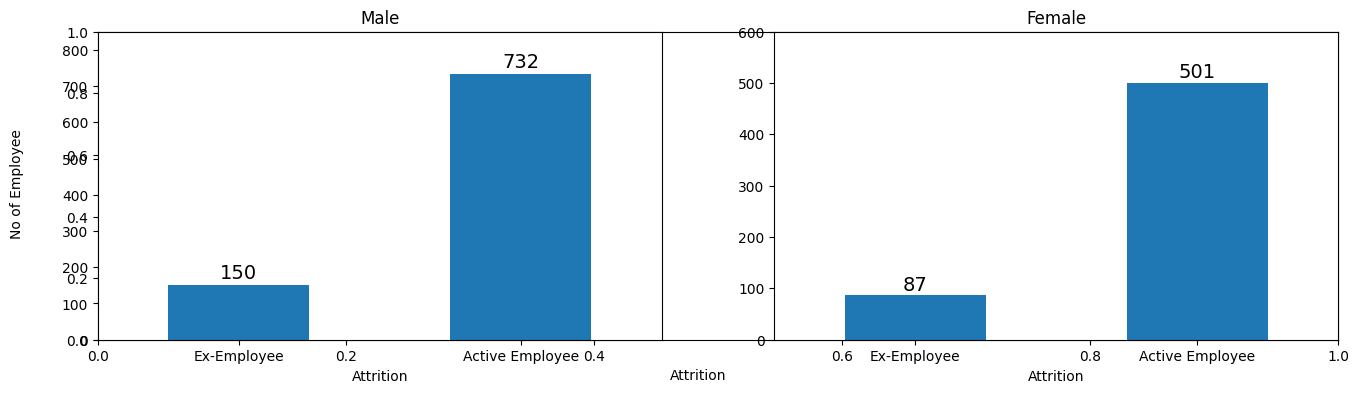

In [32]:
fig, axes = plt.subplots(figsize=(16,4))

plt.subplot(121)
g1 = df.loc[df['Gender'] == 'Male', 'Attrition'].value_counts().reindex(["Yes", "No"]).plot.bar(title= 'Male', color="#1f77b4")
g1.set_xticklabels(["Ex-Employee", "Active Employee"])
plt.xticks(rotation=0)
plt.ylim(0,850)
for p in g1.patches:
    height = p.get_height()
    g1.text(p.get_x()+p.get_width()/2., height+20, "{:1.0f}".format(height), ha="center", fontsize=14) 
    
plt.subplot(122)
g2 = df.loc[df['Gender'] == 'Female', 'Attrition'].value_counts().reindex(["Yes", "No"]).plot.bar(title= 'Female', color="#1f77b4")
g2.set_xticklabels(["Ex-Employee", "Active Employee"])
plt.xticks(rotation=0)
plt.ylim(0,600)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+10, "{:1.0f}".format(height), ha="center", fontsize=14) 
    
fig.text(0.5, 0.01, 'Attrition', ha='center')
fig.text(0.07, 0.5, 'No of Employee', va='center', rotation='vertical')

# plt.savefig("gender_hist_3.png", bbox_inches="tight")
plt.show()

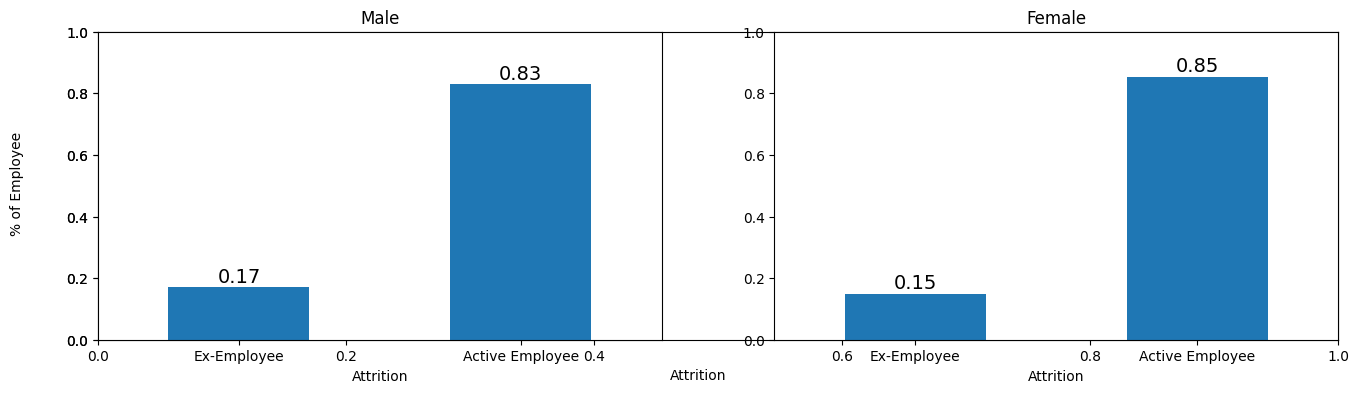

In [33]:
fig, axes = plt.subplots(figsize=(16,4))

plt.subplot(121)
g1 = df.loc[df['Gender'] == 'Male', 'Attrition'].value_counts(normalize=True).reindex(["Yes", "No"]).plot.bar(title= 'Male', color="#1f77b4")
g1.set_xticklabels(["Ex-Employee", "Active Employee"])
plt.xticks(rotation=0)
plt.ylim(0,1)
for p in g1.patches:
    height = p.get_height()
    g1.text(p.get_x()+p.get_width()/2., height+0.015, "{:1.2f}".format(height), ha="center", fontsize=14) 
    
plt.subplot(122)
g2 = df.loc[df['Gender'] == 'Female', 'Attrition'].value_counts(normalize=True).reindex(["Yes", "No"]).plot.bar(title= 'Female', color="#1f77b4")
g2.set_xticklabels(["Ex-Employee", "Active Employee"])
plt.xticks(rotation=0)
plt.ylim(0,1)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+0.02, "{:1.2f}".format(height), ha="center", fontsize=14) 
    
fig.text(0.5, 0.01, 'Attrition', ha='center')
fig.text(0.07, 0.5, '% of Employee', va='center', rotation='vertical')

# plt.savefig("gender_hist_4.png", bbox_inches="tight")
plt.show()

C:\Users\VivekG\AppData\Local\Temp\ipykernel_25508\2543320773.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_2.index, y=value_2.values,palette=["#D4A1E7","#E7A1A1"])


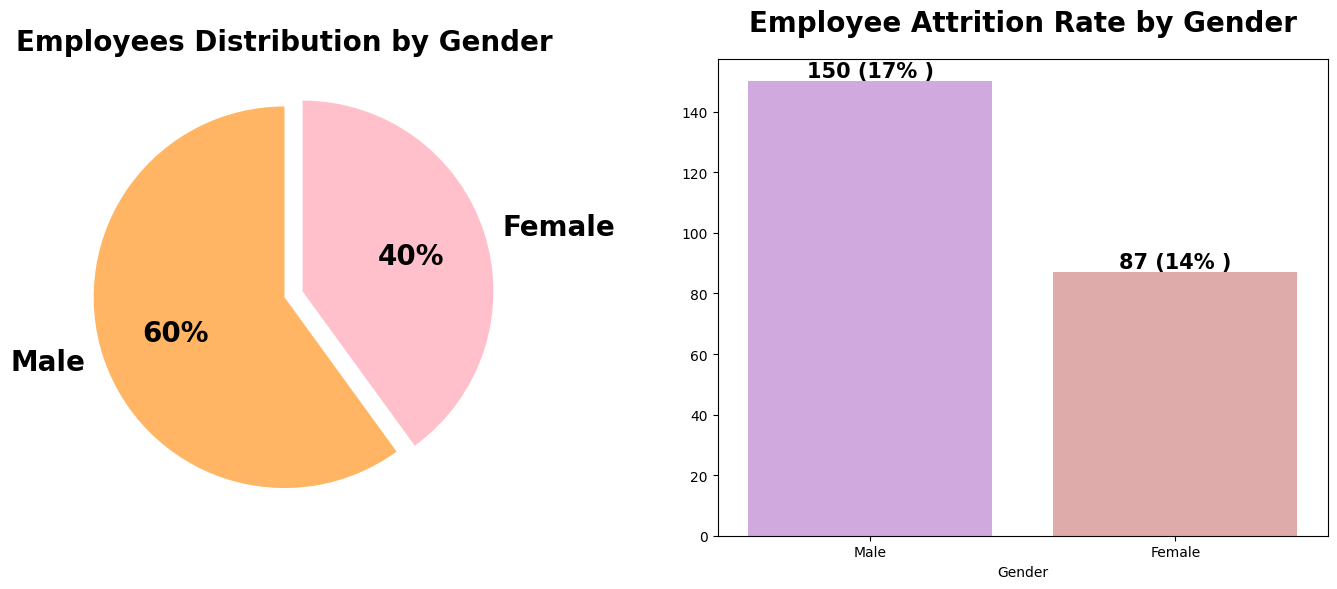

In [34]:
#Visualization to show Total Employees by Gender.
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
gender_attrition = df["Gender"].value_counts()
plt.title("Employees Distribution by Gender",fontweight="black",size=20)
plt.pie(gender_attrition, autopct="%.0f%%",labels=gender_attrition.index,textprops=({"fontweight":"black","size":20}),
        explode=[0,0.1],startangle=90,colors= ["#ffb563","#FFC0CB"])

#Visualization to show Employee Attrition by Gender.
plt.subplot(1,2,2)
new_df = df[df["Attrition"]=="Yes"]
value_1 = df["Gender"].value_counts()
value_2 = new_df["Gender"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index, y=value_2.values,palette=["#D4A1E7","#E7A1A1"])
plt.title("Employee Attrition Rate by Gender",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(int(attrition_rate[index]))+"% )",ha="center",va="bottom",
             size=15,fontweight="black")
plt.tight_layout()
plt.show()

# Inference:
    1.The number of male employees in the organization accounts for a higher proportion than female employees by more than 
    20%. 
    2.Male employees are leaving more from the organization compared to female employees.
    3.Gender distribution shows that the dataset features a higher relative proportion of male ex-employees than female ex- 
      employees, with normalised gender distribution of ex-employees in the dataset at 17% for Males and 15% for Females.

### Marital Status


In [35]:
# marital Status of employees
df['MaritalStatus'].value_counts()

MaritalStatus
Married     673
Single      470
Divorced    327
Name: count, dtype: int64

In [36]:
# marital Status of employees
df['MaritalStatus'].value_counts(normalize=True)

MaritalStatus
Married     0.457823
Single      0.319728
Divorced    0.222449
Name: proportion, dtype: float64

45% of Employee are Married which is higher overall in the organisation.While Employees who are divorcee are less in numbers.

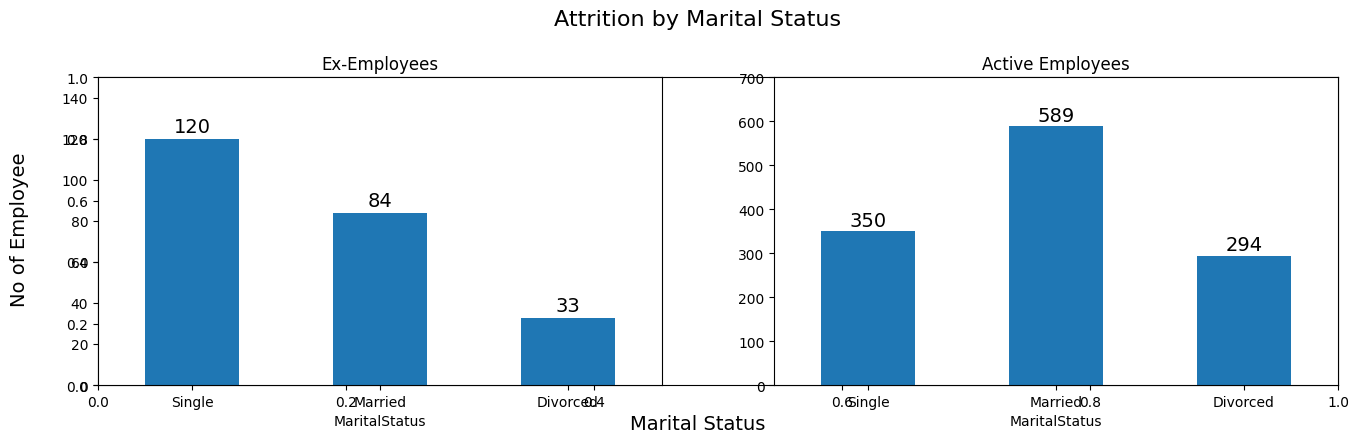

In [37]:
fig, axes = plt.subplots(figsize=(16,4))

plt.subplot(121)
g2 = df.loc[df['Attrition'] == 'Yes', 'MaritalStatus'].value_counts().plot.bar(title= 'Ex-Employees', color="#1f77b4")
plt.xticks(rotation=0)
plt.ylim(0,150)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+3, "{:1.0f}".format(height), ha="center", fontsize=14) 
    
plt.subplot(122)
g2 = df.loc[df['Attrition'] == 'No', 'MaritalStatus'].value_counts().reindex(["Single", "Married","Divorced"]).plot.bar(title= 'Active Employees', color="#1f77b4")
plt.xticks(rotation=0)
plt.ylim(0,700)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+12, "{:1.0f}".format(height), ha="center", fontsize=14) 

# set title and axis labels
plt.suptitle('Attrition by Marital Status', x=0.5, y=1.05, ha='center', fontsize=16)
fig.text(0.5, 0.001, 'Marital Status', ha='center', fontsize=14)
fig.text(0.07, 0.5, 'No of Employee', va='center', rotation='vertical', fontsize=14)

# plt.savefig("marital_hist_1.png", bbox_inches="tight")
plt.show()

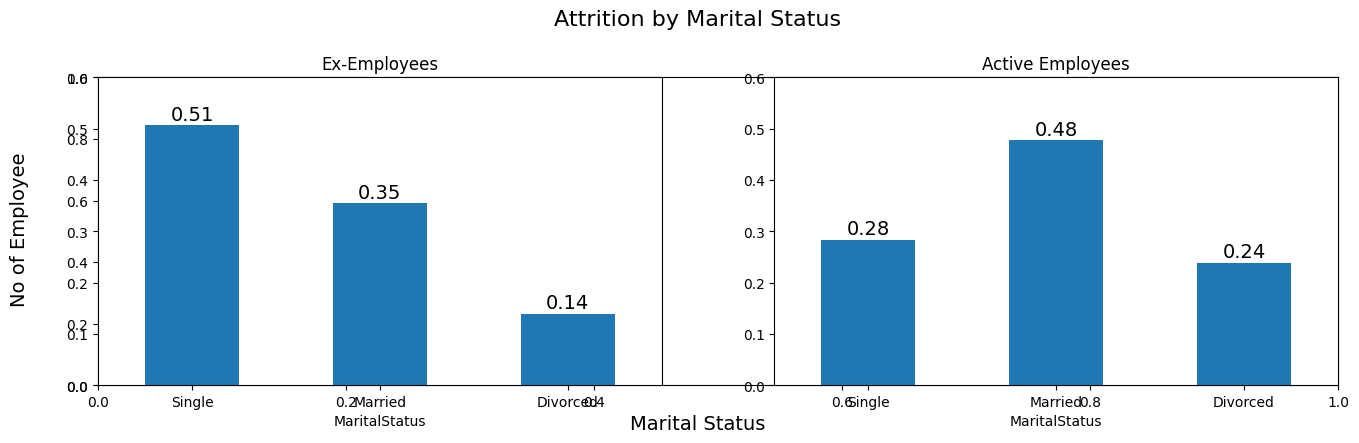

In [38]:
fig, axes = plt.subplots(figsize=(16,4))

plt.subplot(121)
g1 = df.loc[df["Attrition"] == "Yes", "MaritalStatus"].value_counts(normalize=True).plot.bar(title= "Ex-Employees", color="#1f77b4")
plt.xticks(rotation=0)
plt.ylim(0,0.6)
for p in g1.patches:
    height = p.get_height()
    g1.text(p.get_x()+p.get_width()/2., height+0.01, "{:1.2f}".format(height), ha="center", fontsize=14) 
    
plt.subplot(122)
g2 = df.loc[df["Attrition"] == "No", "MaritalStatus"].value_counts(normalize=True).reindex(["Single", "Married","Divorced"]).plot.bar(title= "Active Employees", color="#1f77b4")
plt.xticks(rotation=0)
plt.ylim(0,0.6)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+0.01, "{:1.2f}".format(height), ha="center", fontsize=14) 
    
# set title and axis labels
plt.suptitle("Attrition by Marital Status", x=0.5, y=1.05, ha="center", fontsize=16)
fig.text(0.5, 0.001, "Marital Status", ha="center", fontsize=14)
fig.text(0.07, 0.5, "No of Employee", va="center", rotation="vertical", fontsize=14)

# plt.savefig("marital_hist_2.png", bbox_inches="tight")
plt.show()

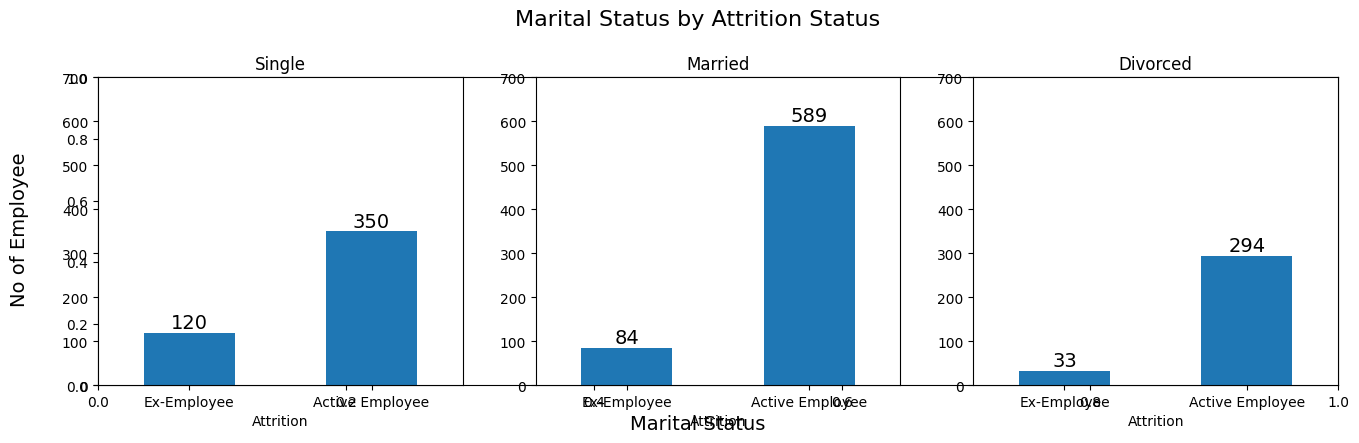

In [39]:
fig, axes = plt.subplots(figsize=(16,4))

plt.subplot(131)
g1 = df.loc[df['MaritalStatus'] == 'Single', 'Attrition'].value_counts().sort_values(ascending=True).plot.bar(title= 'Single', color="#1f77b4")
g1.set_xticklabels(["Ex-Employee", "Active Employee"])
plt.xticks(rotation=0)
plt.ylim(0,700)
for p in g1.patches:
    height = p.get_height()
    g1.text(p.get_x()+p.get_width()/2., height+10, "{:1.0f}".format(height), ha="center", fontsize=14) 
    
plt.subplot(132)
g2 = df.loc[df['MaritalStatus'] == 'Married', 'Attrition'].value_counts().sort_values(ascending=True).plot.bar(title= 'Married', color="#1f77b4")
g2.set_xticklabels(["Ex-Employee", "Active Employee"])
plt.xticks(rotation=0)
plt.ylim(0,700)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+12, "{:1.0f}".format(height), ha="center", fontsize=14) 
    
plt.subplot(133)
g3 = df.loc[df['MaritalStatus'] == 'Divorced', 'Attrition'].value_counts().sort_values(ascending=True).plot.bar(title= 'Divorced', color="#1f77b4")
g3.set_xticklabels(["Ex-Employee", "Active Employee"])
plt.xticks(rotation=0)
plt.ylim(0,700)
for p in g3.patches:
    height = p.get_height()
    g3.text(p.get_x()+p.get_width()/2., height+10, "{:1.0f}".format(height), ha="center", fontsize=14) 
    
# set title and axis labels
plt.suptitle("Marital Status by Attrition Status", x=0.5, y=1.05, ha="center", fontsize=16)
fig.text(0.5, 0.001, "Marital Status", ha="center", fontsize=14)
fig.text(0.07, 0.5, "No of Employee", va="center", rotation="vertical", fontsize=14)

# plt.savefig("marital_hist_3.png", bbox_inches="tight")
plt.show()

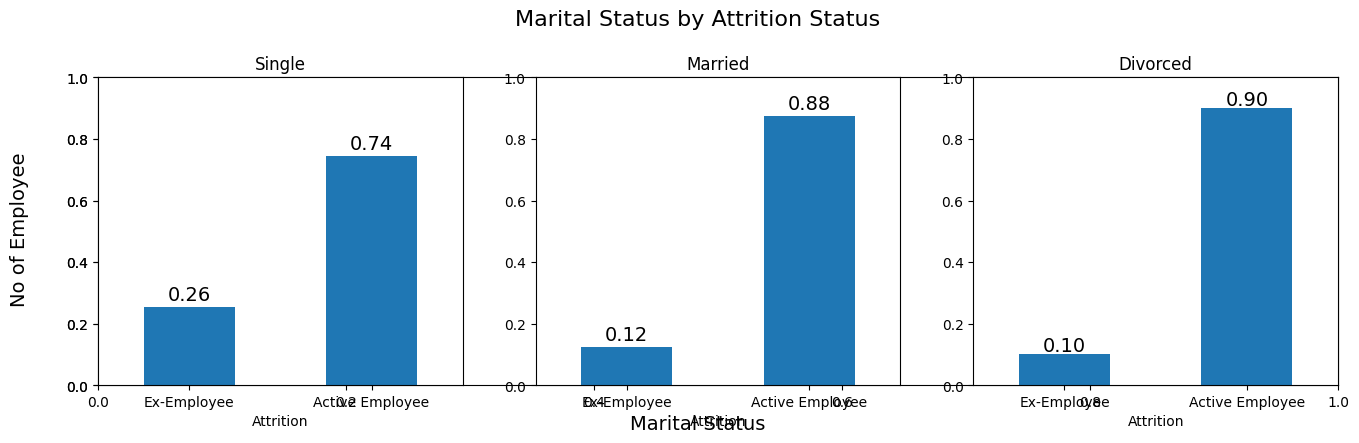

In [40]:
fig, axes = plt.subplots(figsize=(16,4))

plt.subplot(131)
g1 = df.loc[df['MaritalStatus'] == 'Single', 'Attrition'].value_counts(normalize=True).sort_values(ascending=True).plot.bar(title= 'Single', color="#1f77b4")
g1.set_xticklabels(["Ex-Employee", "Active Employee"])
plt.xticks(rotation=0)
plt.ylim(0,1)
for p in g1.patches:
    height = p.get_height()
    g1.text(p.get_x()+p.get_width()/2., height+0.02, "{:1.2f}".format(height), ha="center", fontsize=14) 
    
plt.subplot(132)
g2 = df.loc[df['MaritalStatus'] == 'Married', 'Attrition'].value_counts(normalize=True).sort_values(ascending=True).plot.bar(title= 'Married', color="#1f77b4")
g2.set_xticklabels(["Ex-Employee", "Active Employee"])
plt.xticks(rotation=0)
plt.ylim(0,1)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+0.02, "{:1.2f}".format(height), ha="center", fontsize=14) 
    
plt.subplot(133)
g3 = df.loc[df['MaritalStatus'] == 'Divorced', 'Attrition'].value_counts(normalize=True).sort_values(ascending=True).plot.bar(title= 'Divorced', color="#1f77b4")
g3.set_xticklabels(["Ex-Employee", "Active Employee"])
plt.xticks(rotation=0)
plt.ylim(0,1)
for p in g3.patches:
    height = p.get_height()
    g3.text(p.get_x()+p.get_width()/2., height+0.01, "{:1.2f}".format(height), ha="center", fontsize=14) 
    
# set title and axis labels
plt.suptitle("Marital Status by Attrition Status", x=0.5, y=1.05, ha="center", fontsize=16)
fig.text(0.5, 0.001, "Marital Status", ha="center", fontsize=14)
fig.text(0.07, 0.5, "No of Employee", va="center", rotation="vertical", fontsize=14)

# plt.savefig("marital_hist_4.png", bbox_inches="tight")
plt.show()

C:\Users\VivekG\AppData\Local\Temp\ipykernel_25508\643690231.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_2.index, y=value_2.values,palette=["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])
C:\Users\VivekG\AppData\Local\Temp\ipykernel_25508\643690231.py:17: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.barplot(x=value_2.index, y=value_2.values,palette=["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])


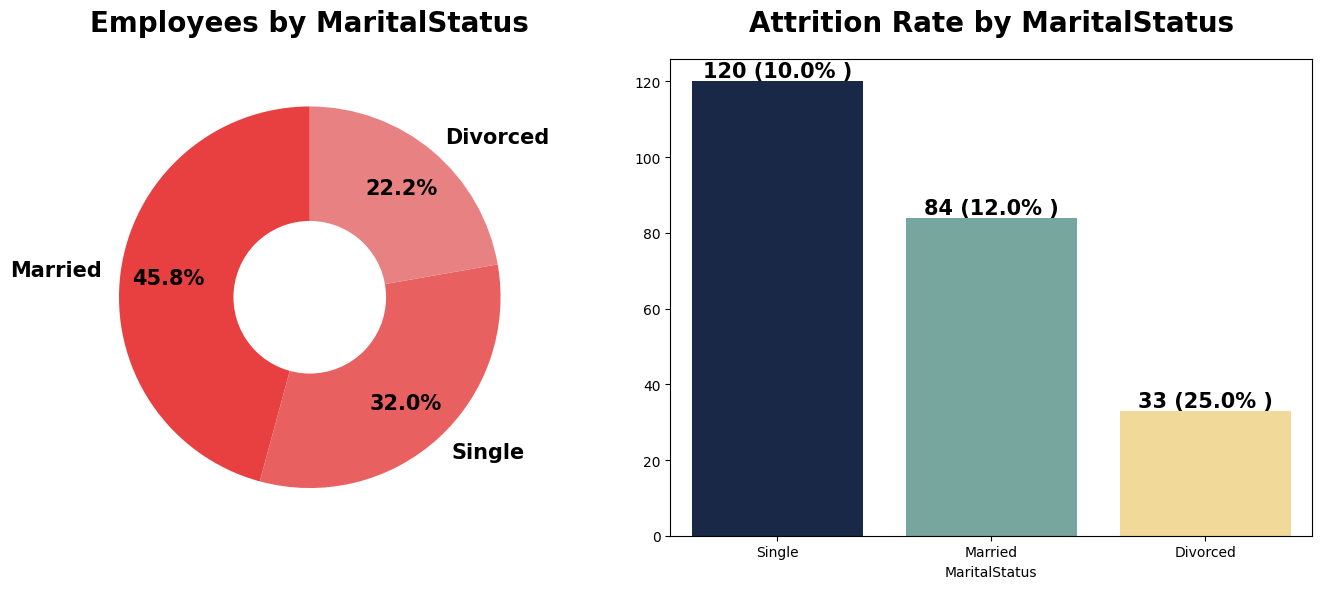

In [41]:
#Visualization to show Total Employees by MaritalStatus.
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
value_1 = df["MaritalStatus"].value_counts()
plt.title("Employees by MaritalStatus", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%",pctdistance=0.75,startangle=90,
        colors=['#E84040', '#E96060', '#E88181', '#E7A1A1'],textprops={"fontweight":"black","size":15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
   
#Visualization to show Attrition Rate by MaritalStatus.
plt.subplot(1,2,2)
new_df = df[df["Attrition"]=="Yes"]
value_2 = new_df["MaritalStatus"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index, y=value_2.values,palette=["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])
plt.title("Attrition Rate by MaritalStatus",
          fontweight="black",
          size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(attrition_rate[index])+"% )",ha="center",va="bottom",
             size=15,fontweight="black")
plt.tight_layout()
plt.show()

# Inference:
    1.Most of the employees are Married in the organization.
    2.The attrition rate is very high of employees who are divorced.
    3.The attrition rate is low for employees who are single.
    4.The dataset features three marital status: Married (673 employees), Single (470 employees), Divorced (327 employees). 
      Single employees show the largest proportion of leavers at 25%.

### Distance from Home


In [44]:
# Distance from Home
print("Distance from home for employees to get to work is from {} to {} miles.".format(df['DistanceFromHome'].min(), df['DistanceFromHome'].max()))

Distance from home for employees to get to work is from 1 to 29 miles.


In [45]:
# Ex-Employees
print("Ex-Employees:")
print("Average Distance From Home of Ex-Employees = {:1.2f} miles".format(np.mean(df.loc[df['Attrition'] == 'Yes', 'DistanceFromHome'])))
print("Standard Deviation = {:1.2f}".format(np.std(df.loc[df['Attrition'] == 'Yes', 'DistanceFromHome'])))

Ex-Employees:
Average Distance From Home of Ex-Employees = 10.63 miles
Standard Deviation = 8.43


In [46]:
# Active Employees
print("Active Employees:")
print("Average Distance From Home of Active Employees = {:1.2f} miles".format(np.mean(df.loc[df['Attrition'] == 'No', 'DistanceFromHome'])))
print("Standard Deviation = {:1.2f}".format(np.std(df.loc[df['Attrition'] == 'No', 'DistanceFromHome'])))

Active Employees:
Average Distance From Home of Active Employees = 8.92 miles
Standard Deviation = 8.01


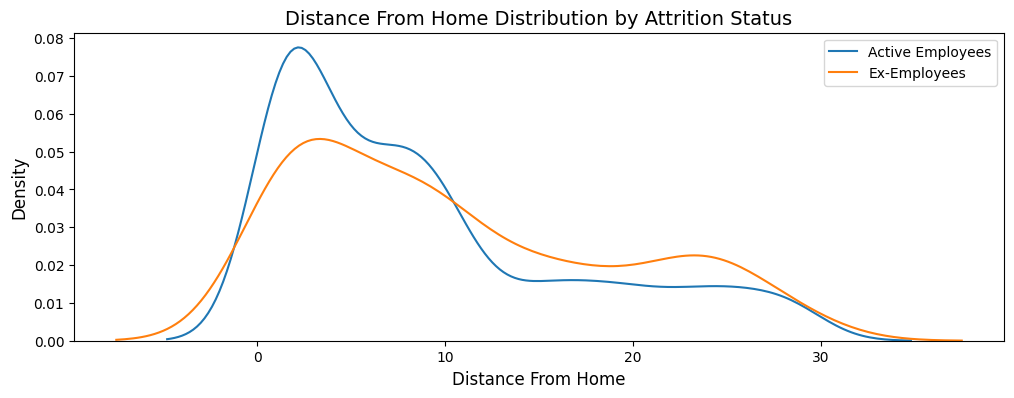

In [47]:
# kernel density estimation (KDE) plot 

plt.subplots(figsize=(12,4))

target_0 = df.loc[df["Attrition"] == "No"]
target_1 = df.loc[df["Attrition"] == "Yes"]

sns.kdeplot(data=target_0, x="DistanceFromHome", fill=False, label="Active Employees")
sns.kdeplot(data=target_1, x="DistanceFromHome", fill=False, label="Ex-Employees")

plt.legend()
plt.xlabel("Distance From Home", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.title("Distance From Home Distribution by Attrition Status", fontsize=14)

# plt.savefig("distance_kde.png", bbox_inches="tight")
plt.show()

KDE Plot Suggest The attrition status are higher when distance from home is between 2-4 miles

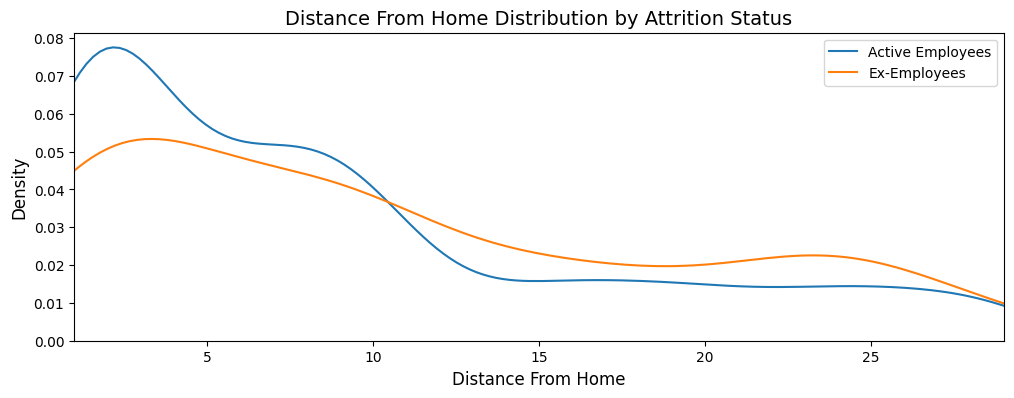

In [48]:
# kernel density estimation (KDE) plot 

plt.subplots(figsize=(12,4))

target_0 = df.loc[df["Attrition"] == "No"]
target_1 = df.loc[df["Attrition"] == "Yes"]

sns.kdeplot(data=target_0, x="DistanceFromHome", fill=False, label="Active Employees")
sns.kdeplot(data=target_1, x="DistanceFromHome", fill=False, label="Ex-Employees")

plt.legend()
plt.xlim(df["DistanceFromHome"].min(), df["DistanceFromHome"].max())
plt.xlabel("Distance From Home", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.title("Distance From Home Distribution by Attrition Status", fontsize=14)

# plt.savefig("distance_kde.png", bbox_inches="tight")
plt.show()

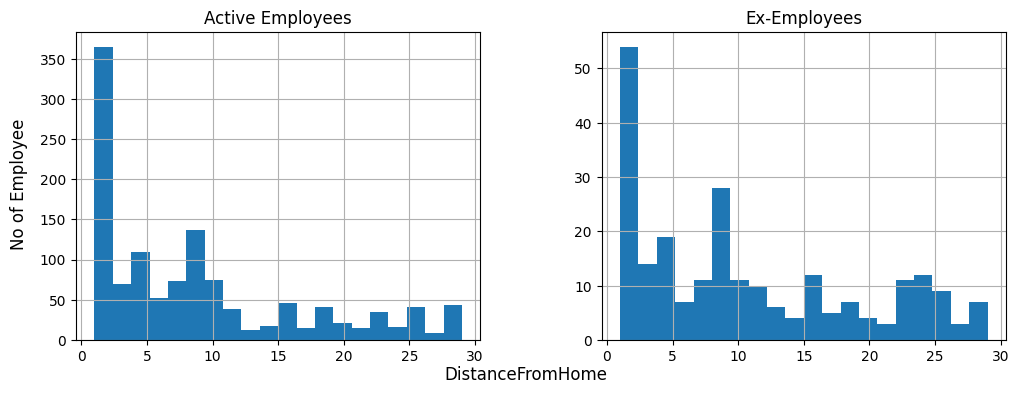

In [49]:
# plot histogram
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(12,4)

target_0[['DistanceFromHome']].hist(bins=20, ax=axes[0])
axes[0].set_title('Active Employees')

target_1[['DistanceFromHome']].hist(bins=20, ax=axes[1])
axes[1].set_title('Ex-Employees')

fig.text(0.5, 0.01, 'DistanceFromHome', ha='center', fontsize=12)
fig.text(0.07, 0.5, 'No of Employee', va='center', rotation='vertical', fontsize=12)

# plt.savefig("distance_hist.png", bbox_inches="tight")
plt.show()

In [50]:
print("Total Unique Values in Attribute is =>",df["DistanceFromHome"].nunique())

Total Unique Values in Attribute is => 29


In [51]:
df["DistanceFromHome"].describe().to_frame().T

count      mean       std  min  25%  50%   75%   max
DistanceFromHome  1470.0  9.192517  8.106864  1.0  2.0  7.0  14.0  29.0

In [52]:
# Define the bin edges for the groups
bin_edges = [0,2,5,10,30]

# Define the labels for the groups
bin_labels = ['0-2 kms', '3-5 kms', '6-10 kms',"10+ kms"]

# Cuttinf the DistaanceFromHome column into groups
df['DistanceGroup'] = pd.cut(df['DistanceFromHome'], bins=bin_edges, labels=bin_labels)

C:\Users\VivekG\AppData\Local\Temp\ipykernel_27296\3322964037.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_1.index.tolist(), y=value_1.values,palette = ["#FFA07A", "#D4A1E7", "#FFC0CB","#87CEFA"])
C:\Users\VivekG\AppData\Local\Temp\ipykernel_27296\3322964037.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_2.index.tolist(),y= value_2.values,palette=["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])
C:\Users\VivekG\AppData\Local\Temp\ipykernel_27296\3322964037.py:15: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(x=value_2.index.tolist(),y= value_2.values,palette=["#11264e","#6faea4","#FEE08B","#D4A1E7

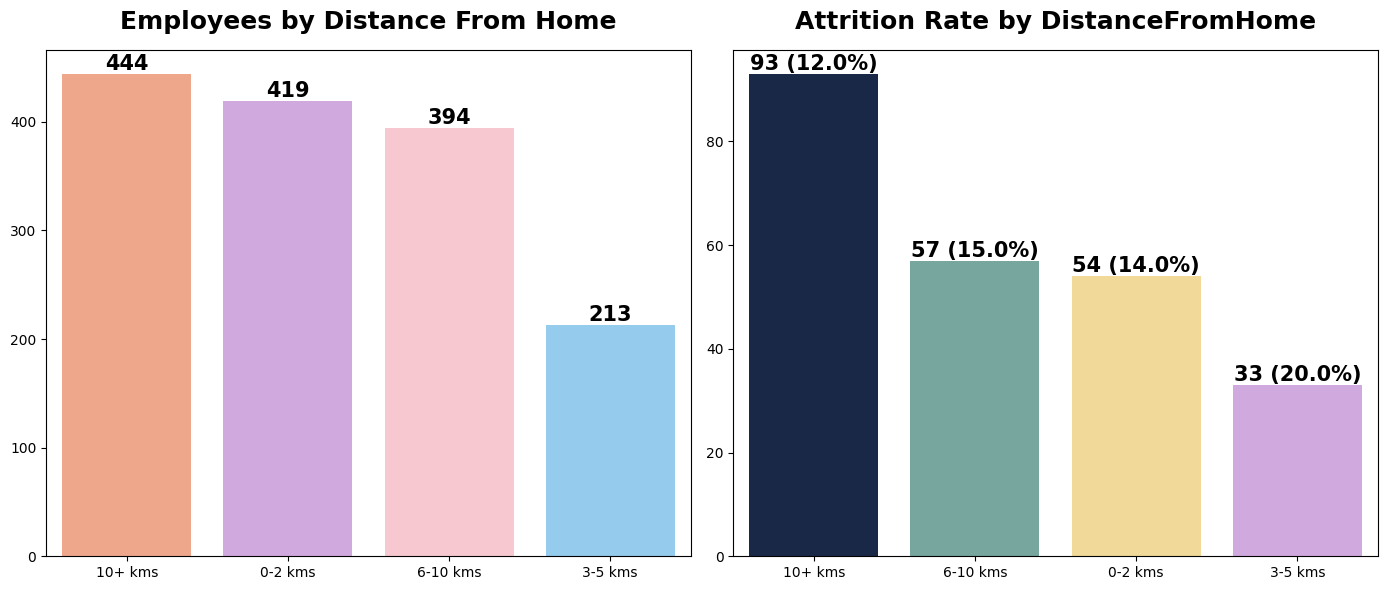

In [53]:
##Visualization to show Total Employees by DistnaceFromHome.
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
value_1 = df["DistanceGroup"].value_counts()
sns.barplot(x=value_1.index.tolist(), y=value_1.values,palette = ["#FFA07A", "#D4A1E7", "#FFC0CB","#87CEFA"])
plt.title("Employees by Distance From Home",fontweight="black",pad=15,size=18)
for index, value in enumerate(value_1.values):
    plt.text(index,value,value,ha="center",va="bottom",fontweight="black",size=15)
    
#Visualization to show Attrition Rate by DistanceFromHome.
plt.subplot(1,2,2)
new_df = df[df["Attrition"]=="Yes"]
value_2 = new_df["DistanceGroup"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index.tolist(),y= value_2.values,palette=["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])
plt.title("Attrition Rate by DistanceFromHome",fontweight="black",pad=15,size=18)
for index,value in enumerate(value_2.values):
    plt.text(index,value, str(value)+" ("+str(attrition_rate[index])+"%)",ha="center",va="bottom",fontweight="black",size=15)

plt.tight_layout()
plt.show()

#  Inference:
    1.In the organization there are all kind of employees staying close or staying far from the office.
    2.The feature Distance From Home doesn't follows any trend in attrition rate.
    3.Employees staying close to the organization are mostly leaving compared to employees staying far from the 
      oragnization.
    4.Distance from home for employees to get to work varies from 1 to 29 miles. 
    5.There is no discernable strong correlation between Distance from Home and Attrition Status as per the KDE plot below.

## Education Field

In [54]:
# Education Level of employees
df['Education'].value_counts(normalize=True)

Education
3    0.389116
4    0.270748
2    0.191837
1    0.115646
5    0.032653
Name: proportion, dtype: float64

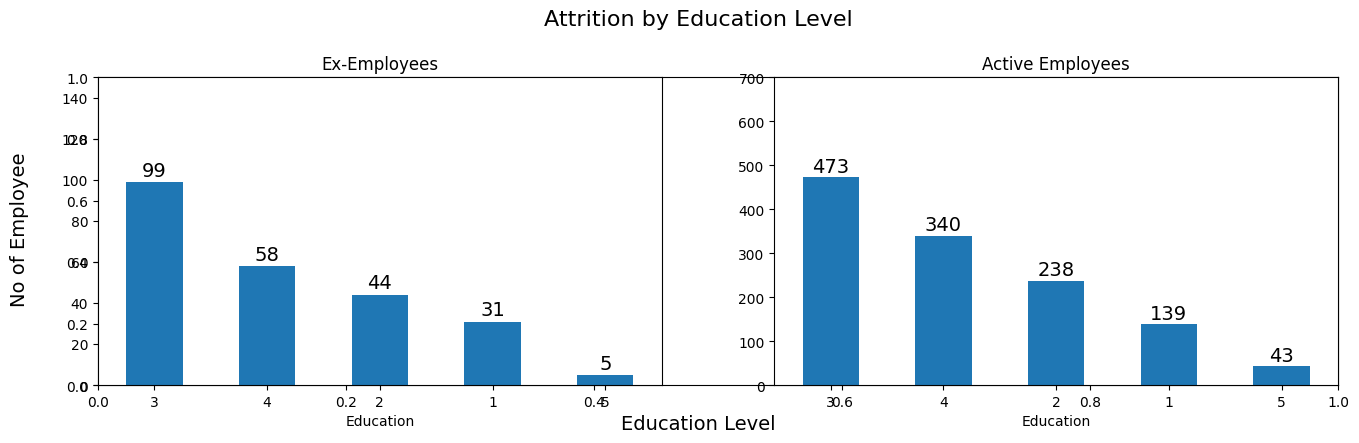

In [55]:
fig, axes = plt.subplots(figsize=(16,4))

plt.subplot(121)
g2 = df.loc[df['Attrition'] == 'Yes', 'Education'].value_counts().plot.bar(title= 'Ex-Employees', color="#1f77b4")
plt.xticks(rotation=0)
plt.ylim(0,150)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+3, "{:1.0f}".format(height), ha="center", fontsize=14) 
    
plt.subplot(122)
g2 = df.loc[df['Attrition'] == 'No', 'Education'].value_counts().plot.bar(title= 'Active Employees', color="#1f77b4")
plt.xticks(rotation=0)
plt.ylim(0,700)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+12, "{:1.0f}".format(height), ha="center", fontsize=14) 

# set title and axis labels
plt.suptitle('Attrition by Education Level', x=0.5, y=1.05, ha='center', fontsize=16)
fig.text(0.5, 0.001, 'Education Level', ha='center', fontsize=14)
fig.text(0.07, 0.5, 'No of Employee', va='center', rotation='vertical', fontsize=14)

# plt.savefig("Education.png", bbox_inches="tight")
plt.show()

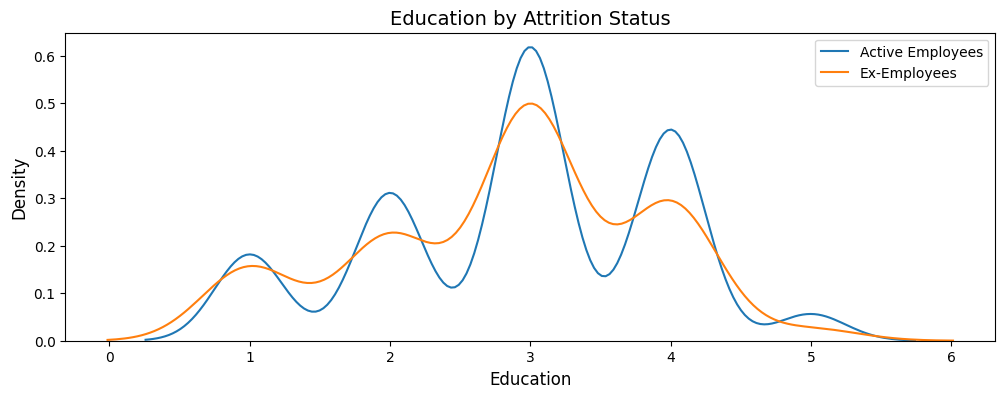

In [56]:
# kernel density estimation (KDE) plot 

plt.subplots(figsize=(12,4))

target_0 = df.loc[df["Attrition"] == "No"]
target_1 = df.loc[df["Attrition"] == "Yes"]

sns.kdeplot(data=target_0, x="Education", fill=False, label="Active Employees")
sns.kdeplot(data=target_1, x="Education", fill=False, label="Ex-Employees")

plt.legend()
plt.xlabel("Education", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.title("Education by Attrition Status", fontsize=14)

# plt.savefig("distance_kde.png", bbox_inches="tight")
plt.show()

C:\Users\VivekG\AppData\Local\Temp\ipykernel_27296\254733508.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_1.index,y=value_1.values,order=value_1.index,palette = ["#FFA07A", "#D4A1E7", "#FFC0CB","#87CEFA"])
C:\Users\VivekG\AppData\Local\Temp\ipykernel_27296\254733508.py:5: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=value_1.index,y=value_1.values,order=value_1.index,palette = ["#FFA07A", "#D4A1E7", "#FFC0CB","#87CEFA"])
C:\Users\VivekG\AppData\Local\Temp\ipykernel_27296\254733508.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_2.index,y=value_2.values,order=value_2.

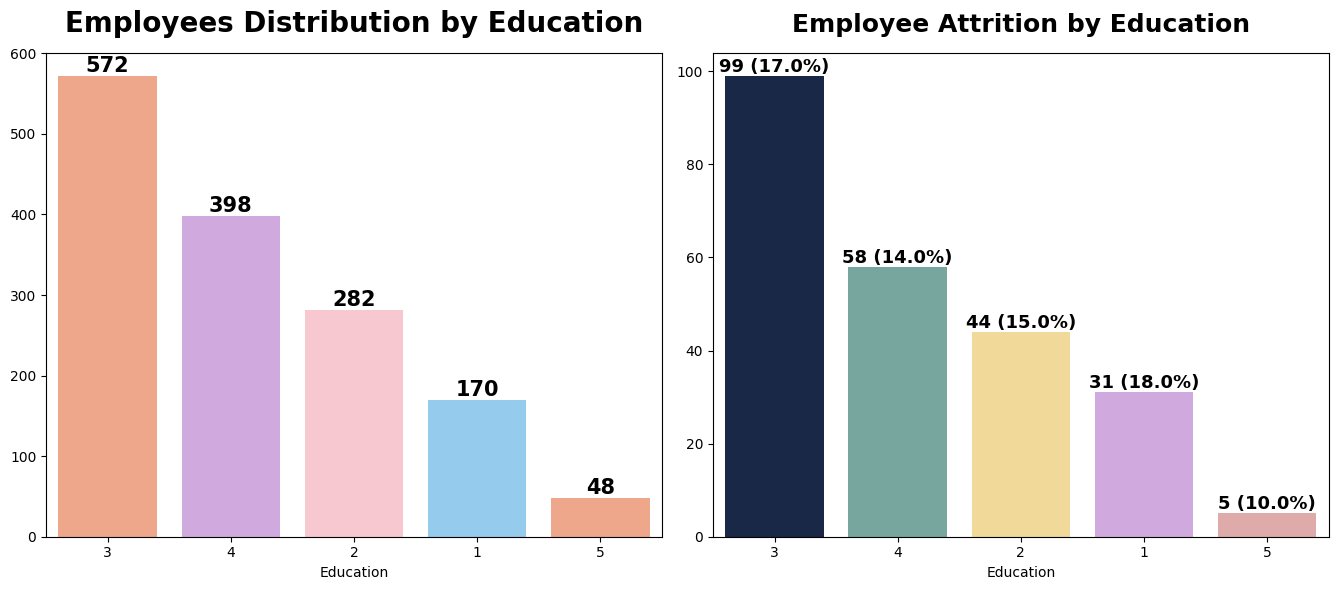

In [57]:
#Visualization to show Total Employees by Education.
plt.figure(figsize=(13.5,6))
plt.subplot(1,2,1)
value_1 = df["Education"].value_counts()
sns.barplot(x=value_1.index,y=value_1.values,order=value_1.index,palette = ["#FFA07A", "#D4A1E7", "#FFC0CB","#87CEFA"])
plt.title("Employees Distribution by Education",fontweight="black",size=20,pad=15)
for index,value in enumerate(value_1.values):
    plt.text(index,value,value,ha="center",va="bottom",fontweight="black",size=15)
    
#Visualization to show Employee Attrition by Education.
plt.subplot(1,2,2)
value_2 = new_df["Education"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index,y=value_2.values,order=value_2.index,palette=["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])
plt.title("Employee Attrition by Education",fontweight="black",size=18,pad=15)
for index,value in enumerate(value_2.values):
    plt.text(index,value,str(value)+" ("+str(attrition_rate[index])+"%)",ha="center",va="bottom",
             fontweight="black",size=13)
plt.tight_layout()
plt.show()

# Inference:
    1.Most of the employees in the organization have completed Bachelors or Masters as their education qualification.
    2.Very few employees in the organization have completed Doctorate degree as their education qualification.
    3.We can observe a trend of decreasisng in attrition rate as the education qualification increases.

## EDUCATION FIELD

In [58]:
# Education Field of employees
df['EducationField'].value_counts(normalize=True)

EducationField
Life Sciences       0.412245
Medical             0.315646
Marketing           0.108163
Technical Degree    0.089796
Other               0.055782
Human Resources     0.018367
Name: proportion, dtype: float64

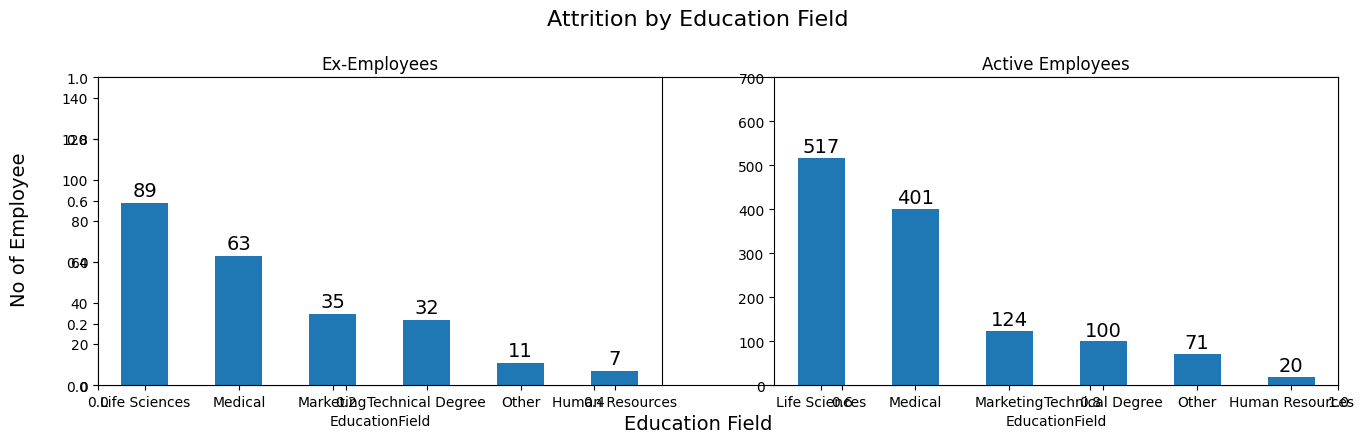

In [59]:
fig, axes = plt.subplots(figsize=(16,4))

plt.subplot(121)
g2 = df.loc[df['Attrition'] == 'Yes', 'EducationField'].value_counts().plot.bar(title= 'Ex-Employees', color="#1f77b4")
plt.xticks(rotation=0)
plt.ylim(0,150)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+3, "{:1.0f}".format(height), ha="center", fontsize=14) 
    
plt.subplot(122)
g2 = df.loc[df['Attrition'] == 'No', 'EducationField'].value_counts().plot.bar(title= 'Active Employees', color="#1f77b4")
plt.xticks(rotation=0)
plt.ylim(0,700)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+12, "{:1.0f}".format(height), ha="center", fontsize=14) 

# set title and axis labels
plt.suptitle('Attrition by Education Field', x=0.5, y=1.05, ha='center', fontsize=16)
fig.text(0.5, 0.001, 'Education Field', ha='center', fontsize=14)
fig.text(0.07, 0.5, 'No of Employee', va='center', rotation='vertical', fontsize=14)

# plt.savefig("Education.png", bbox_inches="tight")
plt.show()

C:\Users\VivekG\AppData\Local\Temp\ipykernel_27296\3999838674.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_1.index, y=value_1.values,order=value_1.index,palette = ["#FFA07A", "#D4A1E7", "#FFC0CB","#87CEFA"])
C:\Users\VivekG\AppData\Local\Temp\ipykernel_27296\3999838674.py:5: UserWarning: 
The palette list has fewer values (4) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=value_1.index, y=value_1.values,order=value_1.index,palette = ["#FFA07A", "#D4A1E7", "#FFC0CB","#87CEFA"])
C:\Users\VivekG\AppData\Local\Temp\ipykernel_27296\3999838674.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_2.index,y=value_2.values,order=val

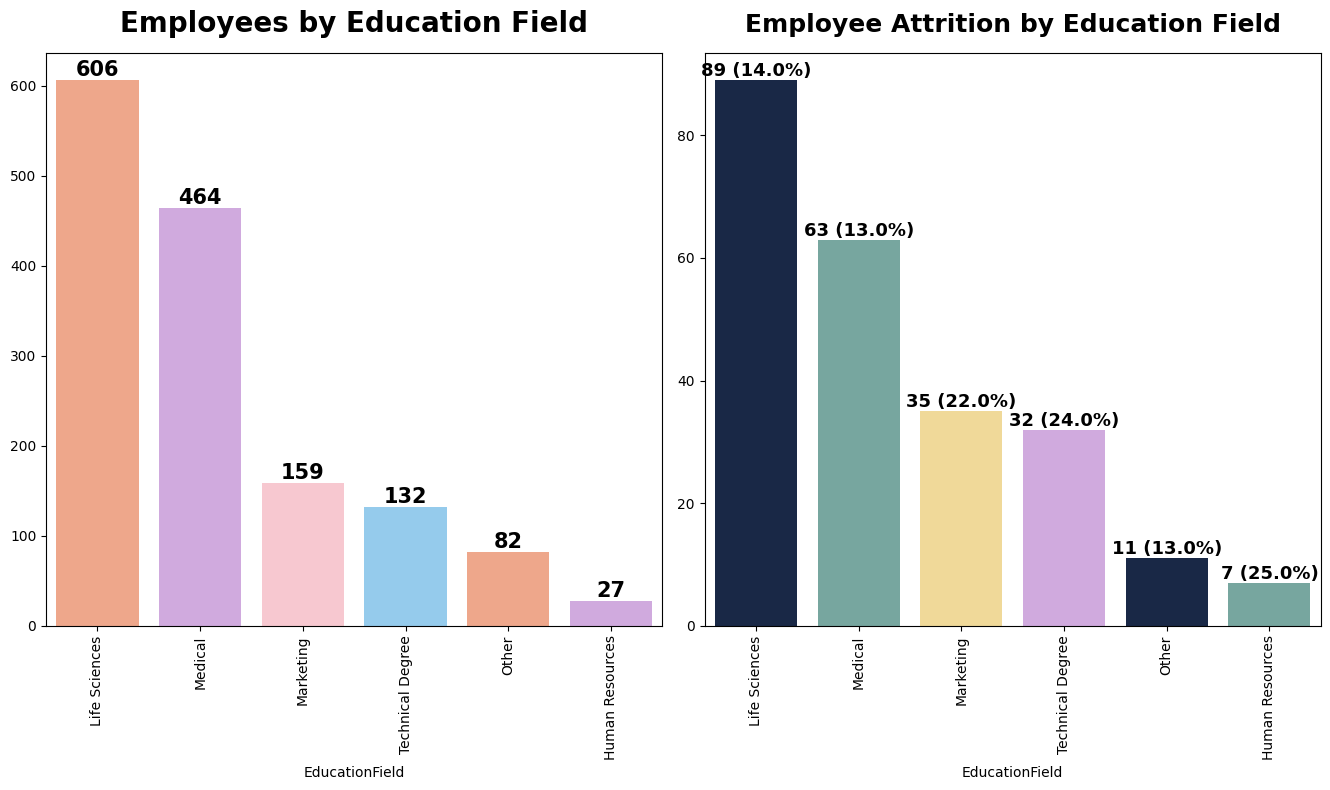

In [60]:
#Visualization to show Total Employees by Education Field.
plt.figure(figsize=(13.5,8))
plt.subplot(1,2,1)
value_1 = df["EducationField"].value_counts()
sns.barplot(x=value_1.index, y=value_1.values,order=value_1.index,palette = ["#FFA07A", "#D4A1E7", "#FFC0CB","#87CEFA"])
plt.title("Employees by Education Field",fontweight="black",size=20,pad=15)
for index,value in enumerate(value_1.values):
    plt.text(index,value,value,ha="center",va="bottom",fontweight="black",size=15)
plt.xticks(rotation=90)

#Visualization to show Employee Attrition by Education Field.
plt.subplot(1,2,2)
value_2 = new_df["EducationField"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index,y=value_2.values,order=value_2.index,palette=["#11264e","#6faea4","#FEE08B","#D4A1E7"])
plt.title("Employee Attrition by Education Field",fontweight="black",size=18,pad=15)
for index,value in enumerate(value_2.values):
    plt.text(index,value,str(value)+" ("+str(attrition_rate[index])+"%)",ha="center",va="bottom",
             fontweight="black",size=13)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Inference:
    1.Most of the employees are either from Life Science or Medical Education Field.
    2.Very few employees are from Human Resources Education Field.
    3.Education Fields like Human Resources, Marketing, Technical is having very high attrition rate.
   

## ENVIRONMENT SATISFACTION

In [61]:
# ENVIRONMENT SATISFACTION of employees
df['EnvironmentSatisfaction'].value_counts(normalize=True)

EnvironmentSatisfaction
3    0.308163
4    0.303401
2    0.195238
1    0.193197
Name: proportion, dtype: float64

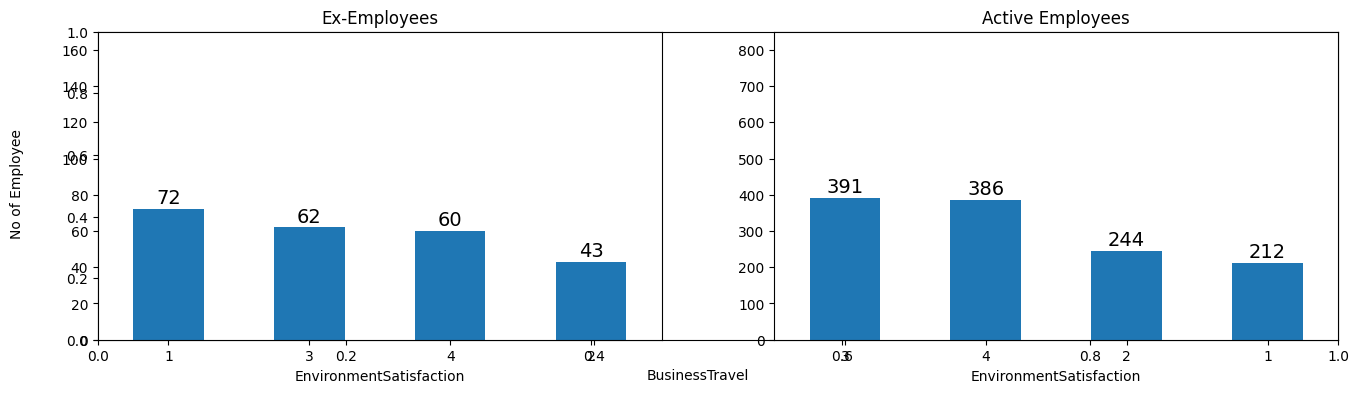

In [62]:
fig, axes = plt.subplots(figsize=(16,4))

plt.subplot(121)
g2 = df.loc[df['Attrition'] == 'Yes', 'EnvironmentSatisfaction'].value_counts().plot.bar(title= 'Ex-Employees', color="#1f77b4")
plt.xticks(rotation=0)
plt.ylim(0,170)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+3, "{:1.0f}".format(height), ha="center", fontsize=14) 
    
plt.subplot(122)
g2 = df.loc[df['Attrition'] == 'No', 'EnvironmentSatisfaction'].value_counts().plot.bar(title= 'Active Employees', color="#1f77b4")
plt.xticks(rotation=0)
plt.ylim(0,850)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+15, "{:1.0f}".format(height), ha="center", fontsize=14) 
    
fig.text(0.5, 0.01, 'BusinessTravel', ha='center')
fig.text(0.07, 0.5, 'No of Employee', va='center', rotation='vertical')

# plt.savefig("gender_hist_1.png", bbox_inches="tight")
plt.show()

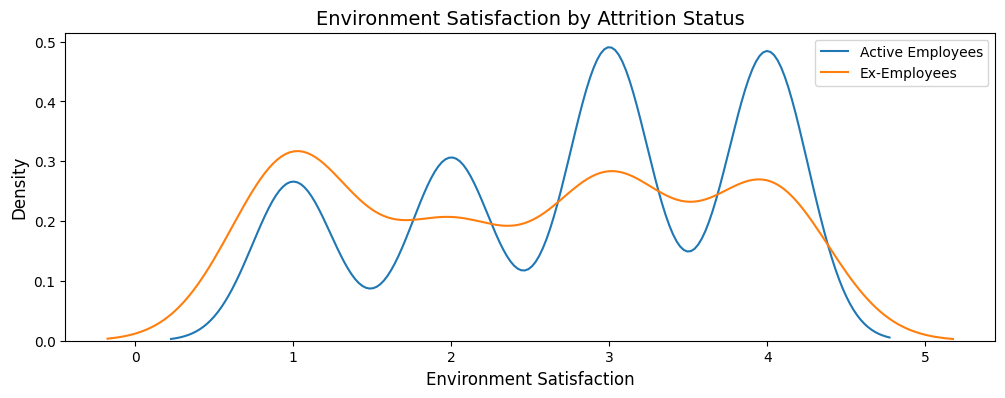

In [63]:
# kernel density estimation (KDE) plot 

plt.subplots(figsize=(12,4))

target_0 = df.loc[df["Attrition"] == "No"]
target_1 = df.loc[df["Attrition"] == "Yes"]

sns.kdeplot(data=target_0, x="EnvironmentSatisfaction", fill=False, label="Active Employees")
sns.kdeplot(data=target_1, x="EnvironmentSatisfaction", fill=False, label="Ex-Employees")

plt.legend()
plt.xlabel("Environment Satisfaction", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.title("Environment Satisfaction by Attrition Status", fontsize=14)

# plt.savefig("distance_kde.png", bbox_inches="tight")
plt.show()

C:\Users\VivekG\AppData\Local\Temp\ipykernel_27296\2211260449.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_2.index,y=value_2.values,order=value_2.index,palette=["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])
C:\Users\VivekG\AppData\Local\Temp\ipykernel_27296\2211260449.py:17: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(x=value_2.index,y=value_2.values,order=value_2.index,palette=["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])


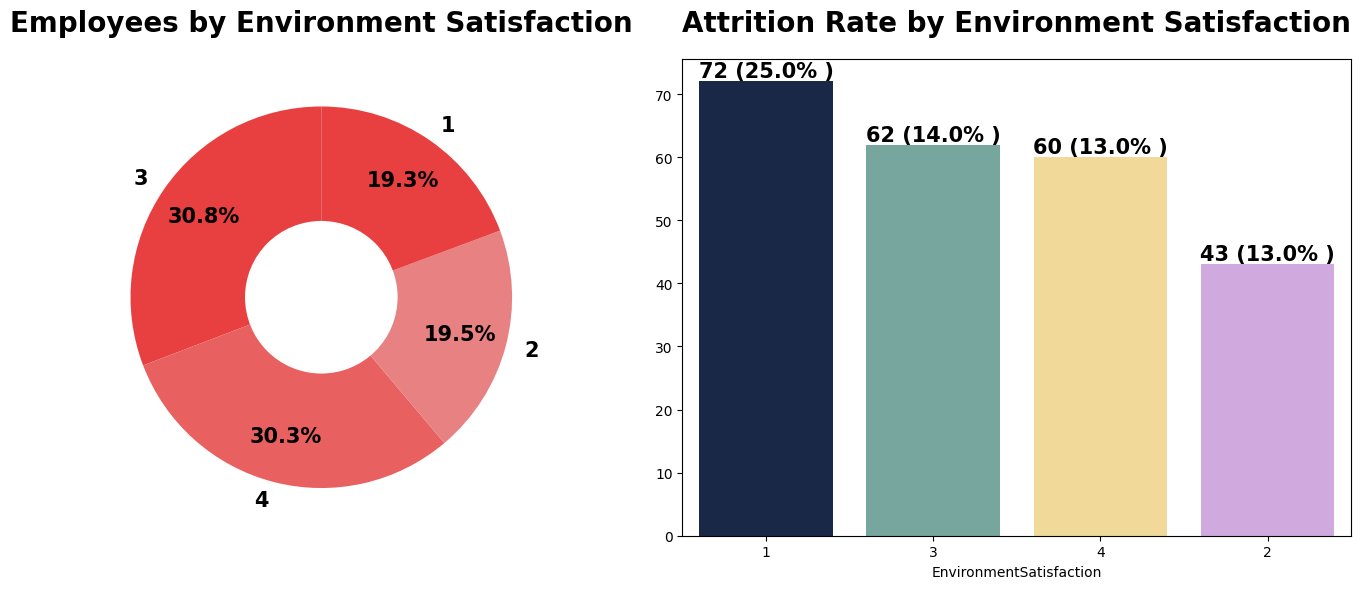

In [64]:
#Visualization to show Total Employees by EnvironmentSatisfaction.
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
value_1 = df["EnvironmentSatisfaction"].value_counts()
plt.title("Employees by Environment Satisfaction", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%",pctdistance=0.75,startangle=90,
        colors=['#E84040', '#E96060', '#E88181'],textprops={"fontweight":"black","size":15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

#Visualization to show Attrition Rate by EnvironmentSatisfaction.
plt.subplot(1,2,2)
new_df = df[df["Attrition"]=="Yes"]
value_2 = new_df["EnvironmentSatisfaction"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index,y=value_2.values,order=value_2.index,palette=["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])
plt.title("Attrition Rate by Environment Satisfaction",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(attrition_rate[index])+"% )",ha="center",va="bottom",
             size=15,fontweight="black")
plt.tight_layout()
plt.show()

## Inference:
    1.Most of the employees have rated the organization environment satisfaction High & Very High.
    2.Though the organization environment satisfaction is high still there's very high attriton in this envirnoment.
    3.Attrition Rate increases with increase in level of environment satisfication.

### Department


In [65]:
# departments
df['Department'].value_counts()

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

In [66]:
# departments
df['Department'].value_counts(normalize=True)

Department
Research & Development    0.653741
Sales                     0.303401
Human Resources           0.042857
Name: proportion, dtype: float64

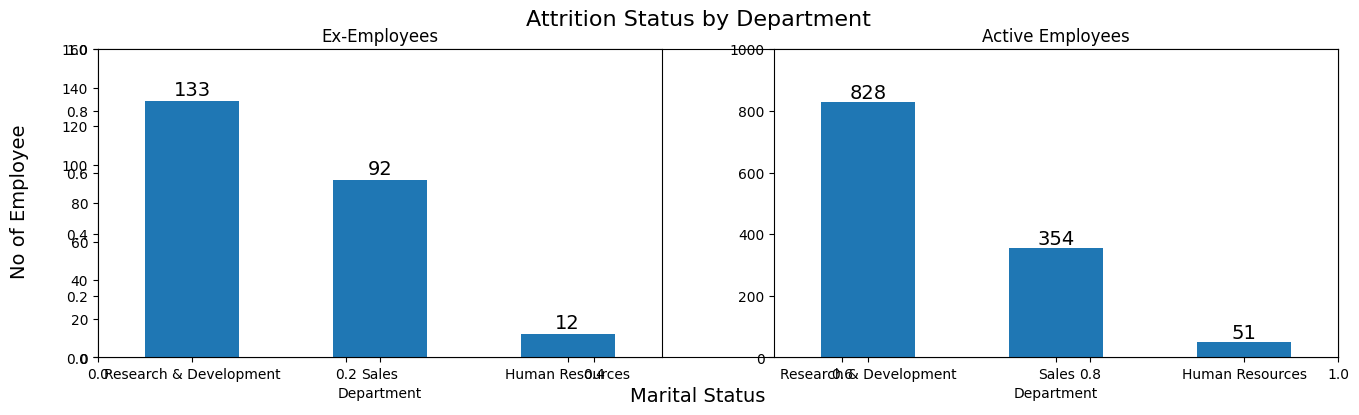

In [67]:
fig, axes = plt.subplots(figsize=(16,4))

plt.subplot(121)
g2 = df.loc[df['Attrition'] == 'Yes', 'Department'].value_counts().plot.bar(title= 'Ex-Employees', color="#1f77b4")
plt.xticks(rotation=0)
plt.ylim(0,160)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+3, "{:1.0f}".format(height), ha="center", fontsize=14) 
    
plt.subplot(122)
g2 = df.loc[df['Attrition'] == 'No', 'Department'].value_counts().plot.bar(title= 'Active Employees', color="#1f77b4")
plt.xticks(rotation=0)
plt.ylim(0,1000)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+12, "{:1.0f}".format(height), ha="center", fontsize=14) 

# set title and axis labels
plt.suptitle('Attrition Status by Department', fontsize=16)
fig.text(0.5, 0.001, 'Marital Status', ha='center', fontsize=14)
fig.text(0.07, 0.5, 'No of Employee', va='center', rotation='vertical', fontsize=14)

# plt.savefig("dept_hist_1.png", bbox_inches="tight")
plt.show()

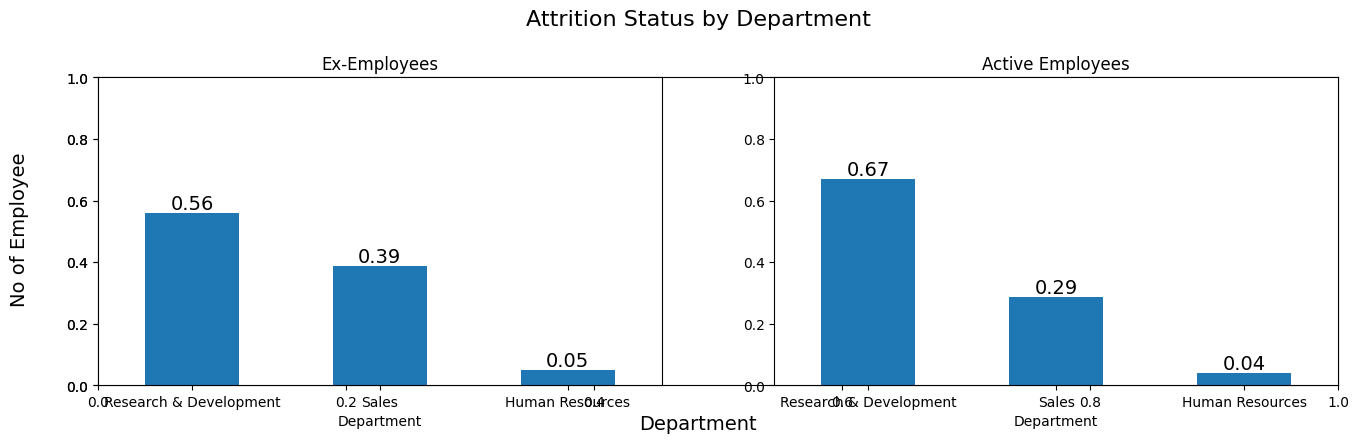

In [68]:
fig, axes = plt.subplots(figsize=(16,4))

plt.subplot(121)
g1 = df.loc[df["Attrition"] == "Yes", "Department"].value_counts(normalize=True).plot.bar(title= "Ex-Employees", color="#1f77b4")
plt.xticks(rotation=0)
plt.ylim(0,1)
for p in g1.patches:
    height = p.get_height()
    g1.text(p.get_x()+p.get_width()/2., height+0.01, "{:1.2f}".format(height), ha="center", fontsize=14) 
    
plt.subplot(122)
g2 = df.loc[df["Attrition"] == "No", "Department"].value_counts(normalize=True).plot.bar(title= "Active Employees", color="#1f77b4")
plt.xticks(rotation=0)
plt.ylim(0,1)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+0.01, "{:1.2f}".format(height), ha="center", fontsize=14) 
    
# set title and axis labels
plt.suptitle("Attrition Status by Department", x=0.5, y=1.05, ha="center", fontsize=16)
fig.text(0.5, 0.001, "Department", ha="center", fontsize=14)
fig.text(0.07, 0.5, "No of Employee", va="center", rotation="vertical", fontsize=14)

# plt.savefig("dept_hist_2.png", bbox_inches="tight")
plt.show()

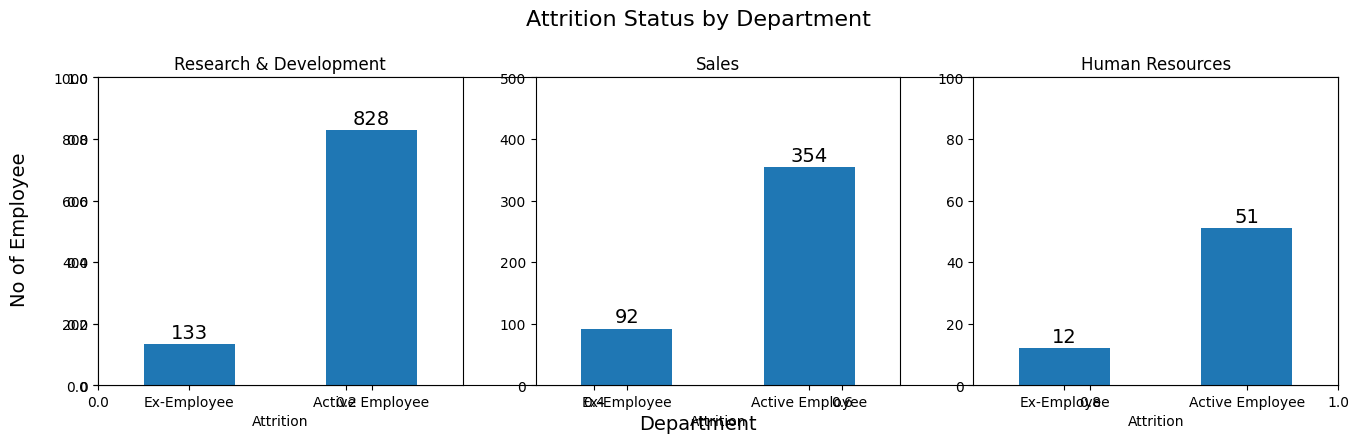

In [69]:
fig, axes = plt.subplots(figsize=(16,4))

plt.subplot(131)
g1 = df.loc[df['Department'] == 'Research & Development', 'Attrition'].value_counts().sort_values(ascending=True).plot.bar(title= 'Research & Development', color="#1f77b4")
g1.set_xticklabels(["Ex-Employee", "Active Employee"])
plt.xticks(rotation=0)
plt.ylim(0,1000)
for p in g1.patches:
    height = p.get_height()
    g1.text(p.get_x()+p.get_width()/2., height+20, "{:1.0f}".format(height), ha="center", fontsize=14) 
    
plt.subplot(132)
g2 = df.loc[df['Department'] == 'Sales', 'Attrition'].value_counts().sort_values(ascending=True).plot.bar(title= 'Sales', color="#1f77b4")
g2.set_xticklabels(["Ex-Employee", "Active Employee"])
plt.xticks(rotation=0)
plt.ylim(0,500)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+10, "{:1.0f}".format(height), ha="center", fontsize=14) 
    
plt.subplot(133)
g3 = df.loc[df['Department'] == 'Human Resources', 'Attrition'].value_counts().sort_values(ascending=True).plot.bar(title= 'Human Resources', color="#1f77b4")
g3.set_xticklabels(["Ex-Employee", "Active Employee"])
plt.xticks(rotation=0)
plt.ylim(0,100)
for p in g3.patches:
    height = p.get_height()
    g3.text(p.get_x()+p.get_width()/2., height+2, "{:1.0f}".format(height), ha="center", fontsize=14) 
    
# set title and axis labels
plt.suptitle("Attrition Status by Department", x=0.5, y=1.05, ha="center", fontsize=16)
fig.text(0.5, 0.001, "Department", ha="center", fontsize=14)
fig.text(0.07, 0.5, "No of Employee", va="center", rotation="vertical", fontsize=14)

# plt.savefig("sdept_hist_3.png", bbox_inches="tight")
plt.show()

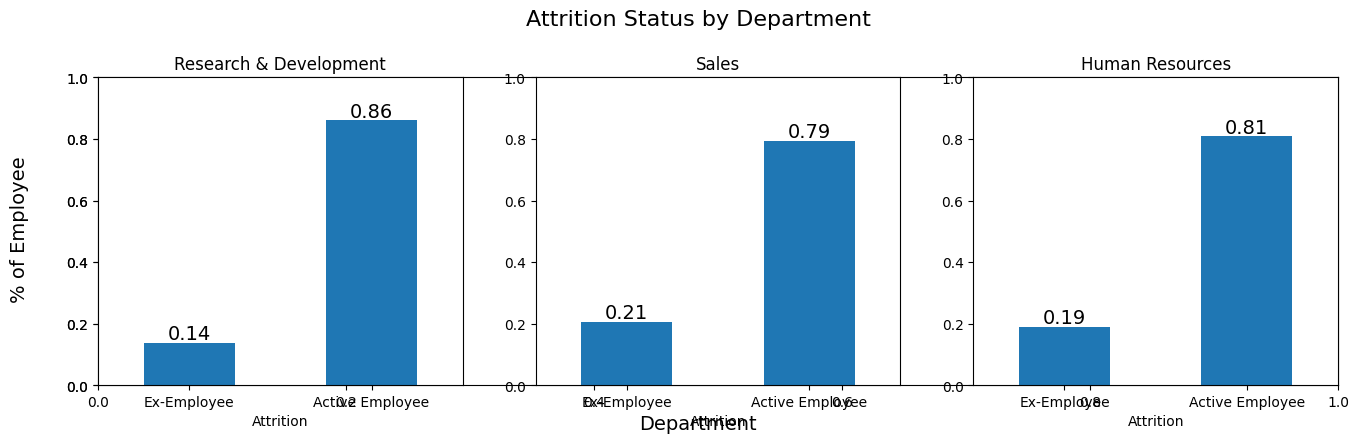

In [70]:
fig, axes = plt.subplots(figsize=(16,4))

plt.subplot(131)
g1 = df.loc[df['Department'] == 'Research & Development', 'Attrition'].value_counts(normalize=True).sort_values(ascending=True).plot.bar(title= 'Research & Development', color="#1f77b4")
g1.set_xticklabels(["Ex-Employee", "Active Employee"])
plt.xticks(rotation=0)
plt.ylim(0,1)
for p in g1.patches:
    height = p.get_height()
    g1.text(p.get_x()+p.get_width()/2., height+0.01, "{:1.2f}".format(height), ha="center", fontsize=14) 
    
plt.subplot(132)
g2 = df.loc[df['Department'] == 'Sales', 'Attrition'].value_counts(normalize=True).sort_values(ascending=True).plot.bar(title= 'Sales', color="#1f77b4")
g2.set_xticklabels(["Ex-Employee", "Active Employee"])
plt.xticks(rotation=0)
plt.ylim(0,1)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+0.01, "{:1.2f}".format(height), ha="center", fontsize=14) 
    
plt.subplot(133)
g3 = df.loc[df['Department'] == 'Human Resources', 'Attrition'].value_counts(normalize=True).sort_values(ascending=True).plot.bar(title= 'Human Resources', color="#1f77b4")
g3.set_xticklabels(["Ex-Employee", "Active Employee"])
plt.xticks(rotation=0)
plt.ylim(0,1)
for p in g3.patches:
    height = p.get_height()
    g3.text(p.get_x()+p.get_width()/2., height+0.01, "{:1.2f}".format(height), ha="center", fontsize=14) 
    
# set title and axis labels
plt.suptitle("Attrition Status by Department", x=0.5, y=1.05, ha="center", fontsize=16)
fig.text(0.5, 0.001, "Department", ha="center", fontsize=14)
fig.text(0.07, 0.5, "% of Employee", va="center", rotation="vertical", fontsize=14)

# plt.savefig("dept_hist_4.png", bbox_inches="tight")
plt.show()

C:\Users\VivekG\AppData\Local\Temp\ipykernel_27296\2945446783.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_1.index, y=value_1.values,palette = ["#FFA07A", "#D4A1E7", "#FFC0CB"])
C:\Users\VivekG\AppData\Local\Temp\ipykernel_27296\2945446783.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_2.index, y=value_2.values,palette=["#11264e","#6faea4","#FEE08B"])


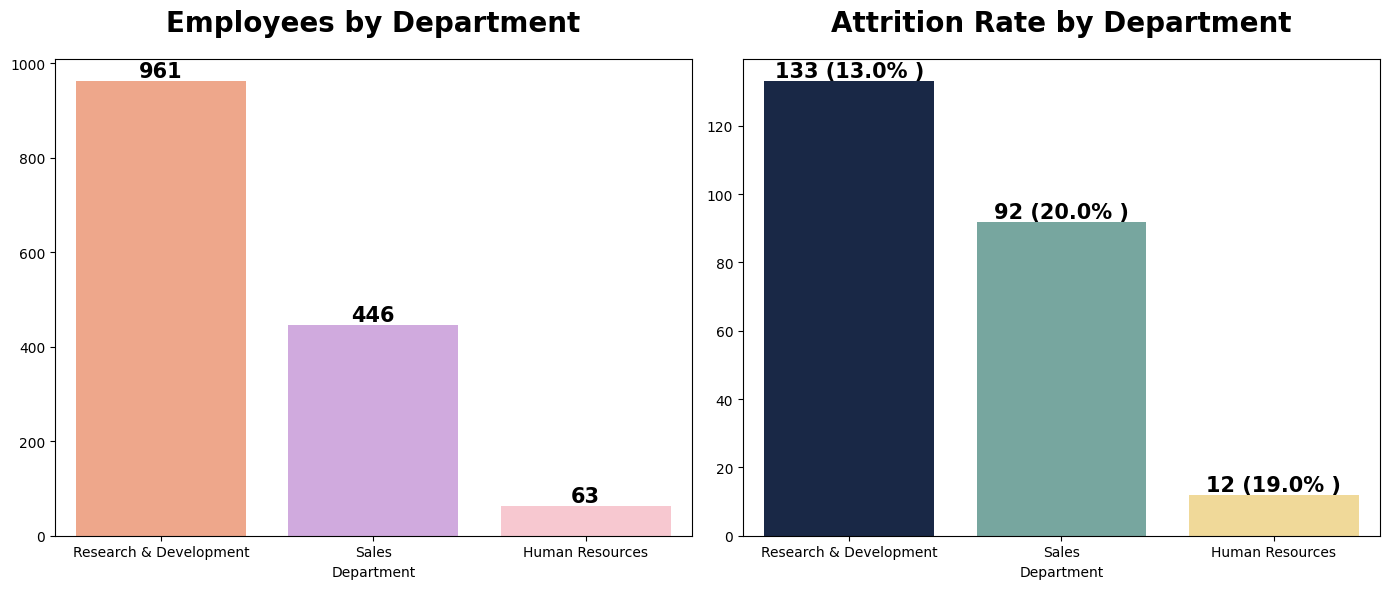

In [71]:
#Visualization to show Total Employees by Department.
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
value_1 = df["Department"].value_counts()
sns.barplot(x=value_1.index, y=value_1.values,palette = ["#FFA07A", "#D4A1E7", "#FFC0CB"])
plt.title("Employees by Department",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_1.values):
    plt.text(index,value,value,ha="center",va="bottom",fontweight="black",size=15,)

#Visualization to show Employee Attrition Rate by Department.
plt.subplot(1,2,2)
new_df = df[df["Attrition"]=="Yes"]
value_2 = new_df["Department"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index, y=value_2.values,palette=["#11264e","#6faea4","#FEE08B"])
plt.title("Attrition Rate by Department",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(attrition_rate[index])+"% )",ha="center",va="bottom",
             size=15,fontweight="black")
plt.tight_layout()
plt.show()


   ## Inference:
    1.The dataset featureinh into three departments: Research & Development, Sales, and Human Resources. 
      Most of the employees are from Research & Development Department.
    2.Highest Attrition is in the Sales Department.
    3.Human Resources Department Attrition rate is also very high.
    4.Though of highest employees in Research & Development department there is least attrition compared to 
      other departments.

## Daily Rate

In [72]:
df["DailyRate"].describe().to_frame().T

count        mean       std    min    25%    50%     75%     max
DailyRate  1470.0  802.485714  403.5091  102.0  465.0  802.0  1157.0  1499.0

In [73]:
# Define the bin edges for the groups
bin_edges = [0, 500, 1000, 1500]

# Define the labels for the groups
bin_labels = ['Low DailyRate', 'Average DailyRate', 'High DailyRate']

# Cut the DailyRate column into groups
df['DailyRateGroup'] = pd.cut(df['DailyRate'], bins=bin_edges, labels=bin_labels)

C:\Users\VivekG\AppData\Local\Temp\ipykernel_27296\1997291236.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_2.index.tolist(),y= value_2.values,palette=["#11264e","#6faea4","#FEE08B"])


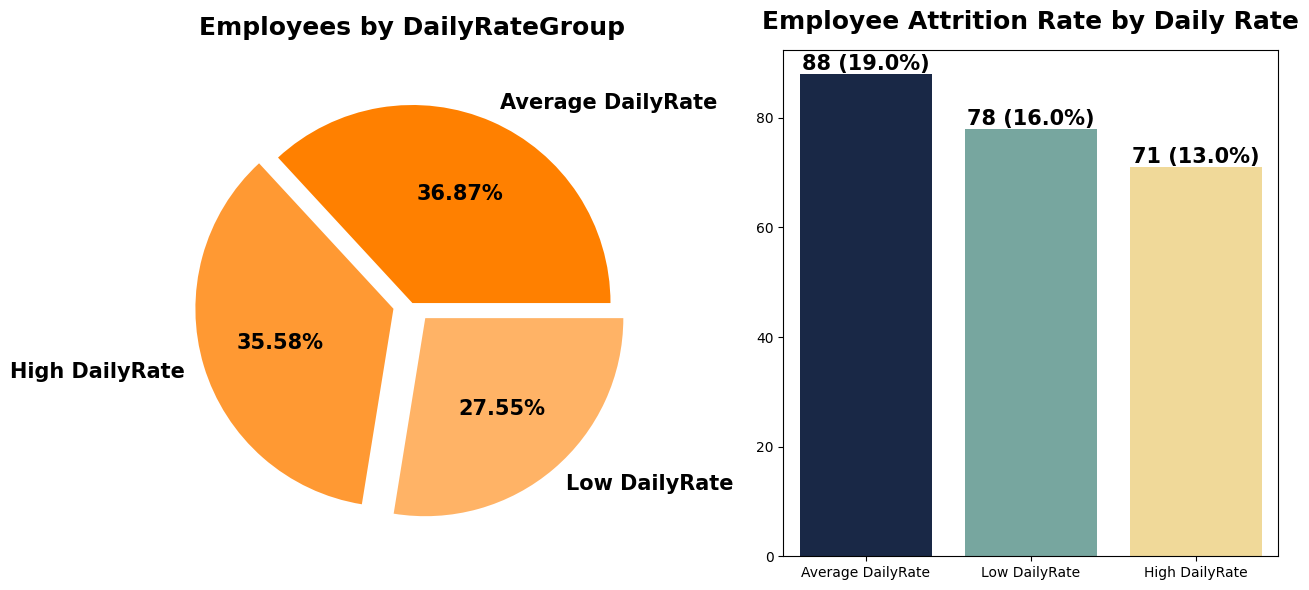

In [74]:
##Visualization to show Total Employees by DailyRateGroup.
plt.figure(figsize=(13,6))
plt.subplot(1,2,1)
value_1 = df["DailyRateGroup"].value_counts()
plt.pie(value_1.values, labels=value_1.index,autopct="%.2f%%",textprops={"fontweight":"black","size":15},
        explode=[0,0.1,0.1],colors= ['#FF8000', '#FF9933', '#FFB366', '#FFCC99'])
plt.title("Employees by DailyRateGroup",fontweight="black",pad=15,size=18)

#Visualization to show Attrition Rate by DailyRateGroup.
plt.subplot(1,2,2)
new_df = df[df["Attrition"]=="Yes"]
value_2 = new_df["DailyRateGroup"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index.tolist(),y= value_2.values,palette=["#11264e","#6faea4","#FEE08B"])
plt.title("Employee Attrition Rate by Daily Rate",fontweight="black",pad=15,size=18)
for index,value in enumerate(value_2.values):
    plt.text(index,value, str(value)+" ("+str(attrition_rate[index])+"%)",ha="center",va="bottom",fontweight="black",size=15)

plt.tight_layout()
plt.show()

## Inference:
    1.Employees with Average DailyRate & High Daily Rate are approxiamately equal.
    2.But the attrition rate is very high of employees with average Daily Rate compared to the employees with High 
      DailyRate.
    3.The attrition rate is also high of employees with low DailyRate.
    4.Employees which are not getting High Daily Rate are mostly leaving the organization.

### Job Role


In [75]:
# Employees in the database have several roles on-file
df['JobRole'].value_counts()

JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64

In [76]:
# Employees in the database have several roles on-file
df['JobRole'].value_counts(normalize=True)

JobRole
Sales Executive              0.221769
Research Scientist           0.198639
Laboratory Technician        0.176190
Manufacturing Director       0.098639
Healthcare Representative    0.089116
Manager                      0.069388
Sales Representative         0.056463
Research Director            0.054422
Human Resources              0.035374
Name: proportion, dtype: float64

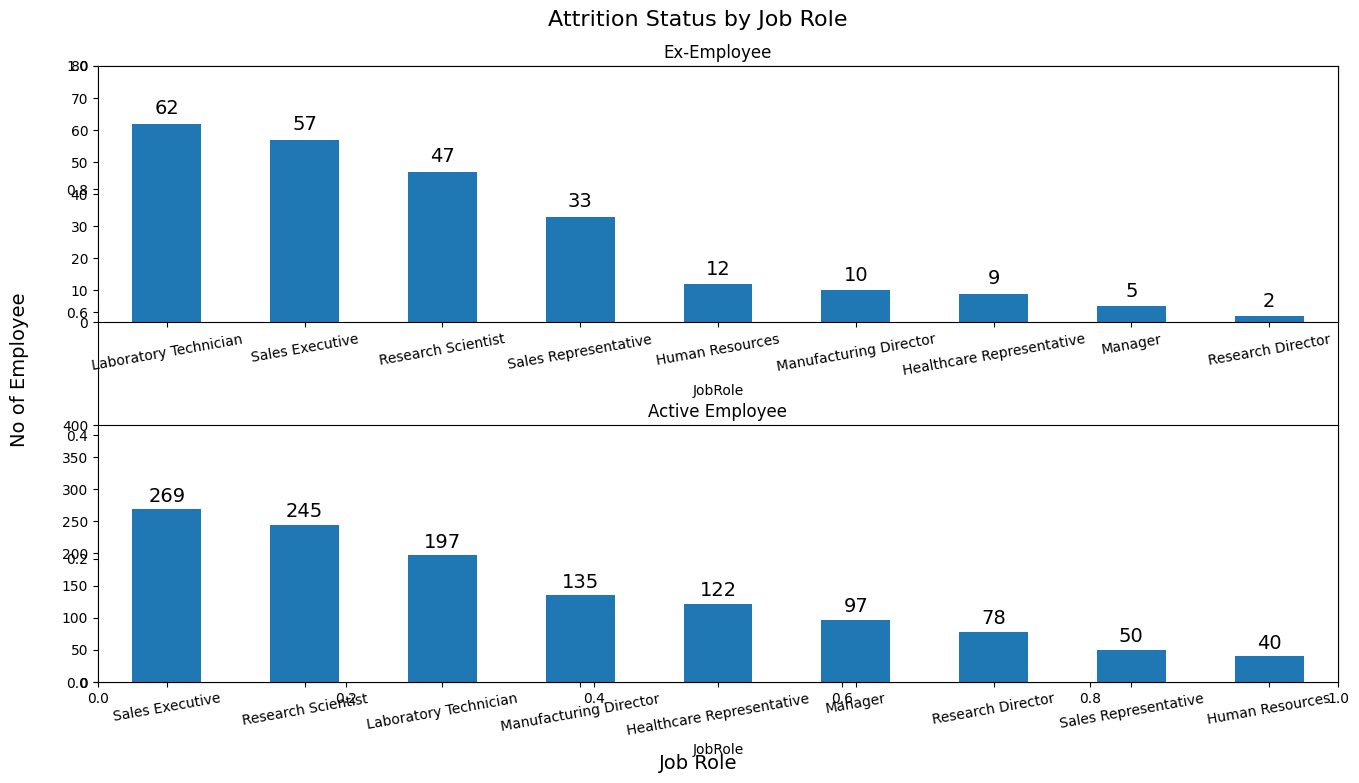

In [77]:
fig, axes = plt.subplots(figsize=(16,8))

plt.subplot(211)
g2 = df.loc[df['Attrition'] == 'Yes', 'JobRole'].value_counts().plot.bar(title= 'Ex-Employee', color="#1f77b4")
plt.xticks(rotation=10)
plt.ylim(0,80)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+3, "{:1.0f}".format(height), ha="center", fontsize=14) 

fig.subplots_adjust(hspace=0.4)

plt.subplot(212)
g2 = df.loc[df['Attrition'] == 'No', 'JobRole'].value_counts().plot.bar(title= 'Active Employee', color="#1f77b4")
plt.xticks(rotation=10)
plt.ylim(0,400)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+12, "{:1.0f}".format(height), ha="center", fontsize=14) 

# set title and axis labels
plt.suptitle('Attrition Status by Job Role', x=0.5, y=0.95, ha="center", fontsize=16)
fig.text(0.5, 0.001, 'Job Role', ha='center', fontsize=14)
fig.text(0.07, 0.5, 'No of Employee', va='center', rotation='vertical', fontsize=14)

# plt.savefig("role_hist_1.png", bbox_inches="tight")
plt.show()

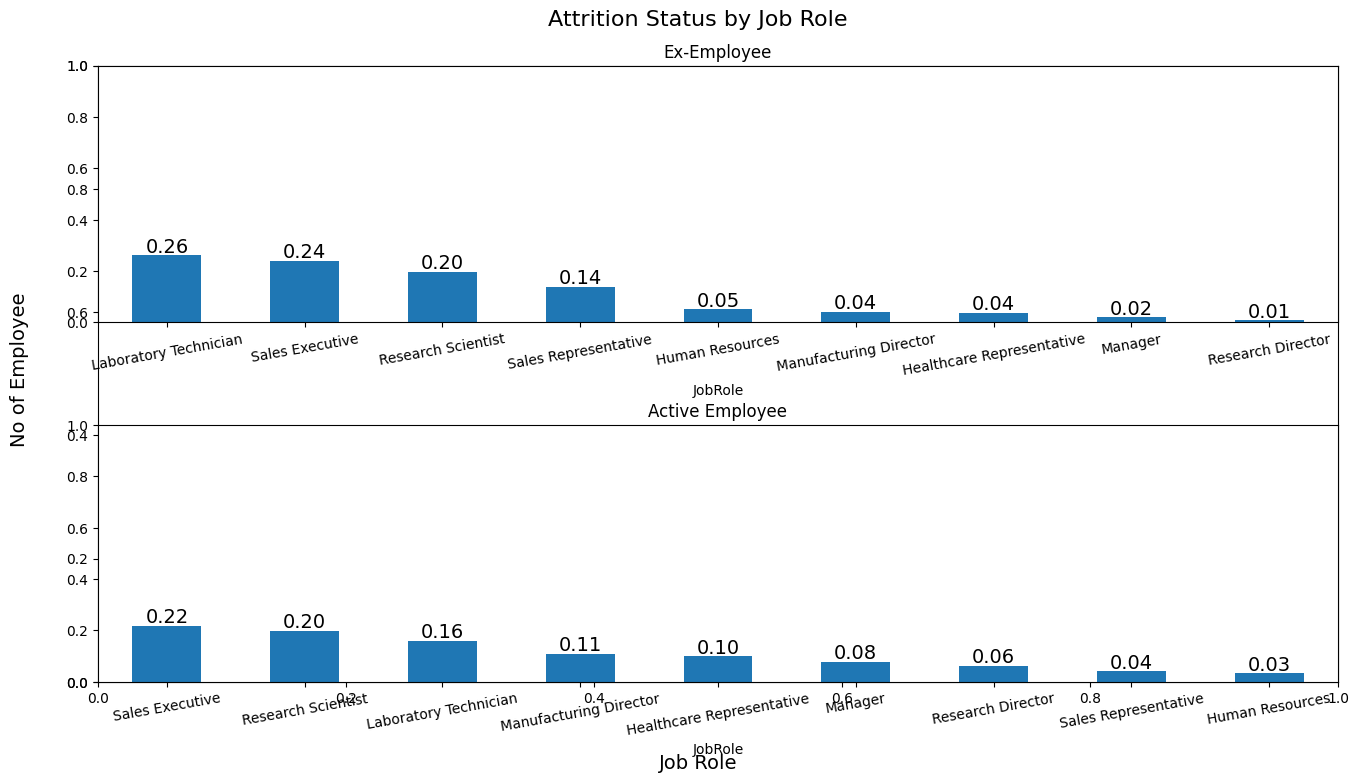

In [78]:
fig, axes = plt.subplots(figsize=(16,8))

plt.subplot(211)
g2 = df.loc[df['Attrition'] == 'Yes', 'JobRole'].value_counts(normalize=True).plot.bar(title= 'Ex-Employee', color="#1f77b4")
plt.xticks(rotation=10)
plt.ylim(0,1)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+0.01, "{:1.2f}".format(height), ha="center", fontsize=14) 
    
plt.subplot(212)
g2 = df.loc[df['Attrition'] == 'No', 'JobRole'].value_counts(normalize=True).plot.bar(title= 'Active Employee', color="#1f77b4")
plt.xticks(rotation=10)
plt.ylim(0,1)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+0.01, "{:1.2f}".format(height), ha="center", fontsize=14) 

fig.subplots_adjust(hspace=0.4)

# set title and axis labels
plt.suptitle('Attrition Status by Job Role', x=0.5, y=0.95, ha="center", fontsize=16)
fig.text(0.5, 0.001, 'Job Role', ha='center', fontsize=14)
fig.text(0.07, 0.5, 'No of Employee', va='center', rotation='vertical', fontsize=14)

# plt.savefig("role_hist_2.png", bbox_inches="tight")
plt.show()

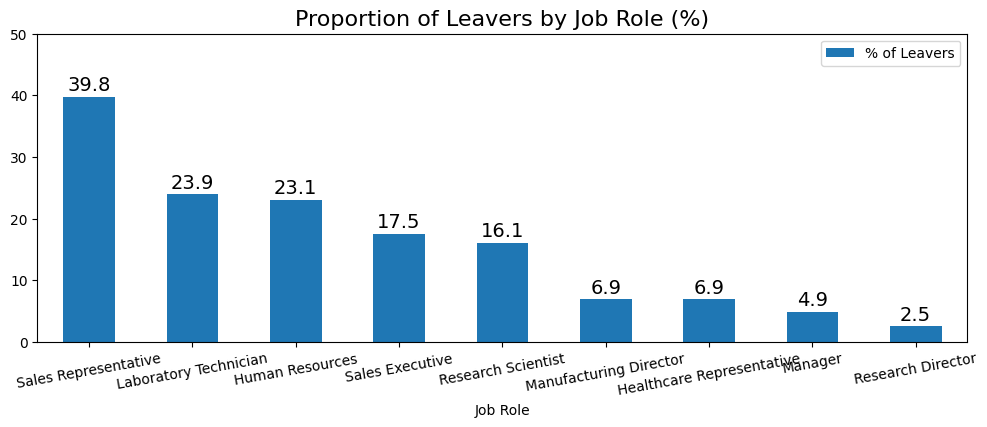

In [79]:
df_JobRole = pd.DataFrame(columns=["Job Role", "% of Leavers"])
i=0
for field in list(df['JobRole'].unique()):
    ratio = df[(df['JobRole']==field)&(df['Attrition']=="Yes")].shape[0] / df[df['JobRole']==field].shape[0]
    df_JobRole.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_JR = df_JobRole.groupby(by="Job Role").sum()
g = df_JR.sort_values(by=['% of Leavers'], ascending=False).plot(kind='bar', figsize=(12,4))
plt.ylim(0,50)
plt.title("Proportion of Leavers by Job Role (%)",  fontsize=16)
plt.xticks(rotation=10)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2., height+1, "{:1.1f}".format(height), ha="center", fontsize=14) 

# plt.savefig("role_hist_3.png", bbox_inches="tight")
plt.show()

C:\Users\VivekG\AppData\Local\Temp\ipykernel_27296\192347582.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_1.index.tolist(), y=value_1.values,palette = ["#FFA07A", "#D4A1E7", "#FFC0CB","#87CEFA"])
C:\Users\VivekG\AppData\Local\Temp\ipykernel_27296\192347582.py:5: UserWarning: 
The palette list has fewer values (4) than needed (9) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=value_1.index.tolist(), y=value_1.values,palette = ["#FFA07A", "#D4A1E7", "#FFC0CB","#87CEFA"])
C:\Users\VivekG\AppData\Local\Temp\ipykernel_27296\192347582.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_2.index.tolist(), y=value_2.values,palette=["#11264e","#6fa

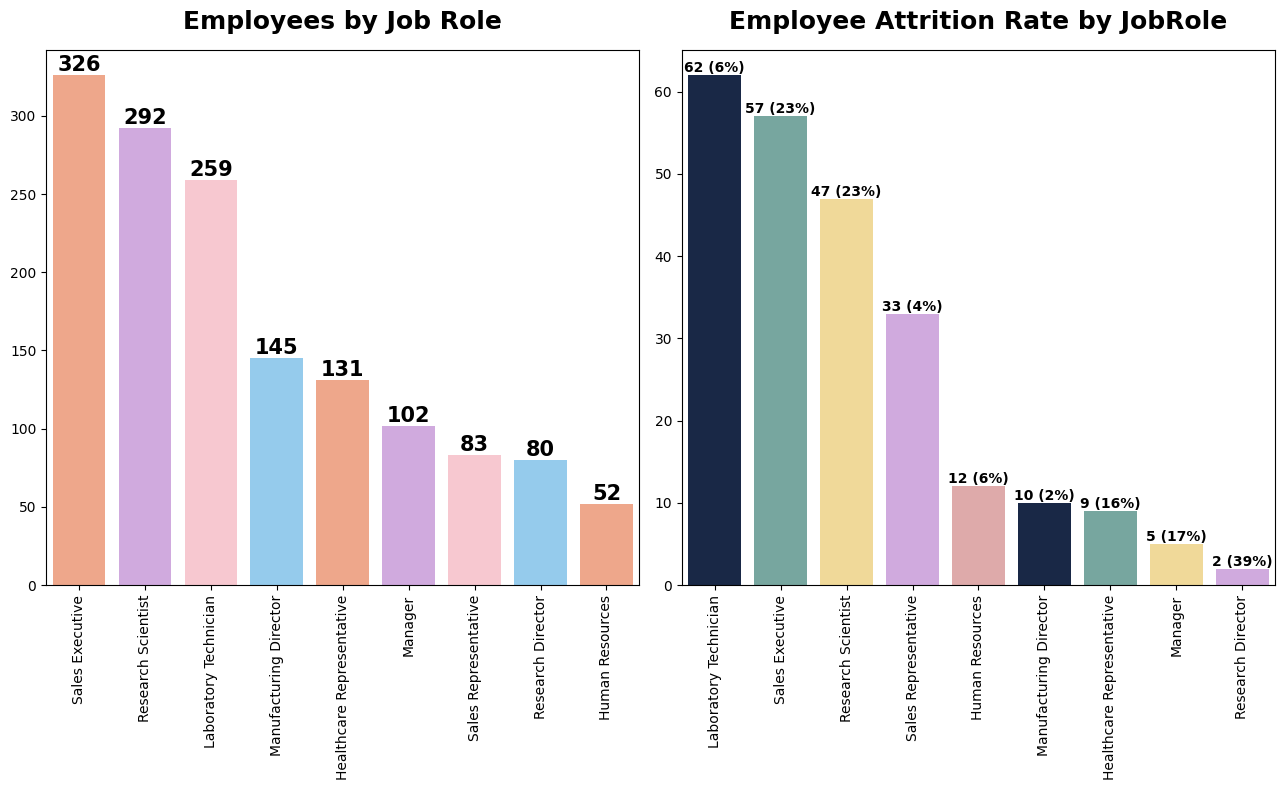

In [80]:
##Visualization to show Total Employees by JobRole.
plt.figure(figsize=(13,8))
plt.subplot(1,2,1)
value_1 = df["JobRole"].value_counts()
sns.barplot(x=value_1.index.tolist(), y=value_1.values,palette = ["#FFA07A", "#D4A1E7", "#FFC0CB","#87CEFA"])
plt.title("Employees by Job Role",fontweight="black",pad=15,size=18)
plt.xticks(rotation=90)
for index, value in enumerate(value_1.values):
    plt.text(index,value,value,ha="center",va="bottom",fontweight="black",size=15)
    
#Visualization to show Attrition Rate by JobRole.
plt.subplot(1,2,2)
new_df = df[df["Attrition"]=="Yes"]
value_2 = new_df["JobRole"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index.tolist(), y=value_2.values,palette=["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])
plt.title("Employee Attrition Rate by JobRole",fontweight="black",pad=15,size=18)
plt.xticks(rotation=90)
for index,value in enumerate(value_2.values):
    plt.text(index,value, str(value)+" ("+str(int(attrition_rate[index]))+"%)",ha="center",va="bottom",
             fontweight="black",size=10)
plt.tight_layout()
plt.show()

## Inference:
    1.Most employees is working as Sales executive following Research Scientist or Laboratory Technician & Human Resource  
      employees are less in numbers in this organization.
    2.Sale Representative has the highest proportion of leavers, followed by Laboratory Technician and Human Resources.
    3.Highest attrition rates are in sector of Research Director, Sales Executive, Research Scientist.

### Job Level


In [81]:
# breakdown by job level
df['JobLevel'].value_counts()

JobLevel
1    543
2    534
3    218
4    106
5     69
Name: count, dtype: int64

In [82]:
# breakdown by job level
df['JobLevel'].value_counts(normalize=True)

JobLevel
1    0.369388
2    0.363265
3    0.148299
4    0.072109
5    0.046939
Name: proportion, dtype: float64

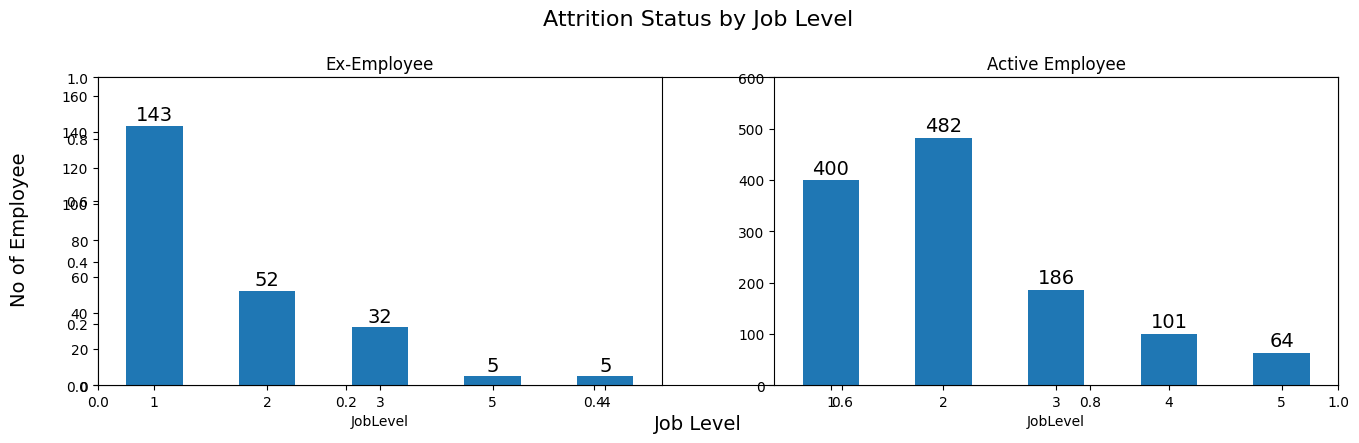

In [83]:
fig, axes = plt.subplots(figsize=(16,4))

plt.subplot(121)
g2 = df.loc[df['Attrition'] == 'Yes', 'JobLevel'].value_counts().plot.bar(title= 'Ex-Employee', color="#1f77b4")
plt.xticks(rotation=0)
plt.ylim(0,170)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+3, "{:1.0f}".format(height), ha="center", fontsize=14) 

plt.subplot(122)
g2 = df.loc[df['Attrition'] == 'No', 'JobLevel'].value_counts().reindex([1,2,3,4,5]).plot.bar(title= 'Active Employee', color="#1f77b4")
plt.xticks(rotation=0)
plt.ylim(0,600)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+12, "{:1.0f}".format(height), ha="center", fontsize=14) 

# set title and axis labels
plt.suptitle('Attrition Status by Job Level', x=0.5, y=1.05, ha="center", fontsize=16)
fig.text(0.5, 0.001, 'Job Level', ha='center', fontsize=14)
fig.text(0.07, 0.5, 'No of Employee', va='center', rotation='vertical', fontsize=14)

# plt.savefig("level_hist_1.png", bbox_inches="tight")
plt.show()

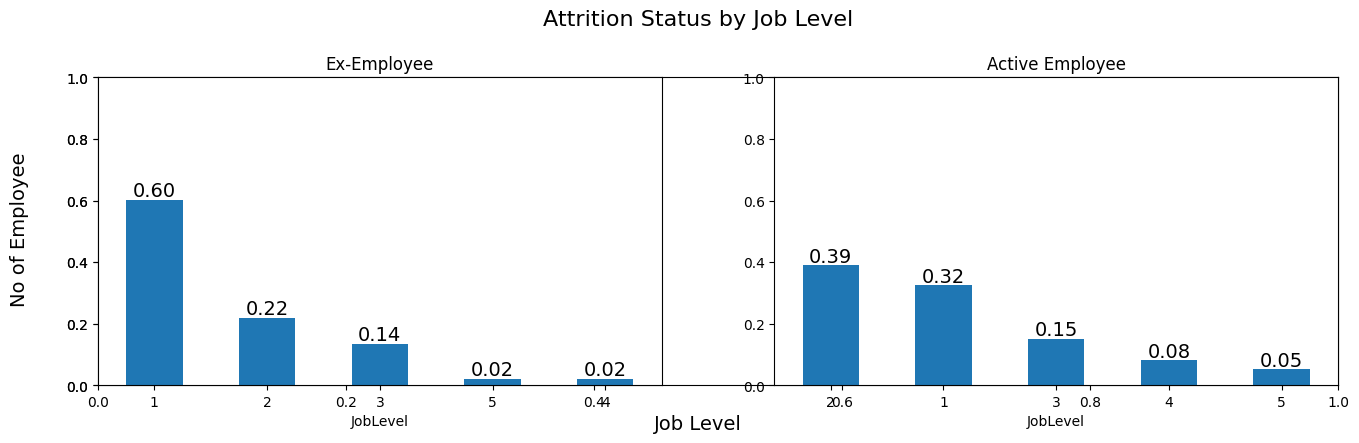

In [84]:
fig, axes = plt.subplots(figsize=(16,4))

plt.subplot(121)
g2 = df.loc[df['Attrition'] == 'Yes', 'JobLevel'].value_counts(normalize=True).plot.bar(title= 'Ex-Employee', color="#1f77b4")
plt.xticks(rotation=0)
plt.ylim(0,1)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+0.01, "{:1.2f}".format(height), ha="center", fontsize=14) 
    
plt.subplot(122)
g2 = df.loc[df['Attrition'] == 'No', 'JobLevel'].value_counts(normalize=True).plot.bar(title= 'Active Employee', color="#1f77b4")
plt.xticks(rotation=0)
plt.ylim(0,1)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+0.01, "{:1.2f}".format(height), ha="center", fontsize=14) 

# set title and axis labels
plt.suptitle('Attrition Status by Job Level', x=0.5, y=1.05, ha="center", fontsize=16)
fig.text(0.5, 0.001, 'Job Level', ha='center', fontsize=14)
fig.text(0.07, 0.5, 'No of Employee', va='center', rotation='vertical', fontsize=14)

# plt.savefig("level_hist_2.png", bbox_inches="tight")
plt.show()

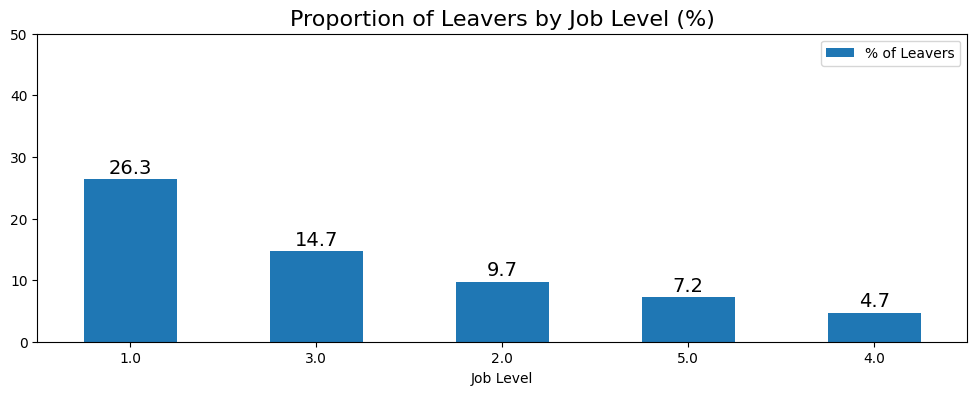

In [85]:
df_JobLevel = pd.DataFrame(columns=["Job Level", "% of Leavers"])
i=0
for field in list(df['JobLevel'].unique()):
    ratio = df[(df['JobLevel']==field)&(df['Attrition']=="Yes")].shape[0] / df[df['JobLevel']==field].shape[0]
    df_JobLevel.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_JL = df_JobLevel.groupby(by="Job Level").sum()
g = df_JL.sort_values(by=['% of Leavers'], ascending=False).plot(kind='bar', figsize=(12,4))
plt.ylim(0,50)
plt.title("Proportion of Leavers by Job Level (%)",  fontsize=16)
plt.xticks(rotation=0)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2., height+1, "{:1.1f}".format(height), ha="center", fontsize=14) 

# plt.savefig("level_hist_3.png", bbox_inches="tight")
plt.show()

C:\Users\VivekG\AppData\Local\Temp\ipykernel_27296\2871517442.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_2.index,y=value_2.values,order=value_2.index,palette=["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])


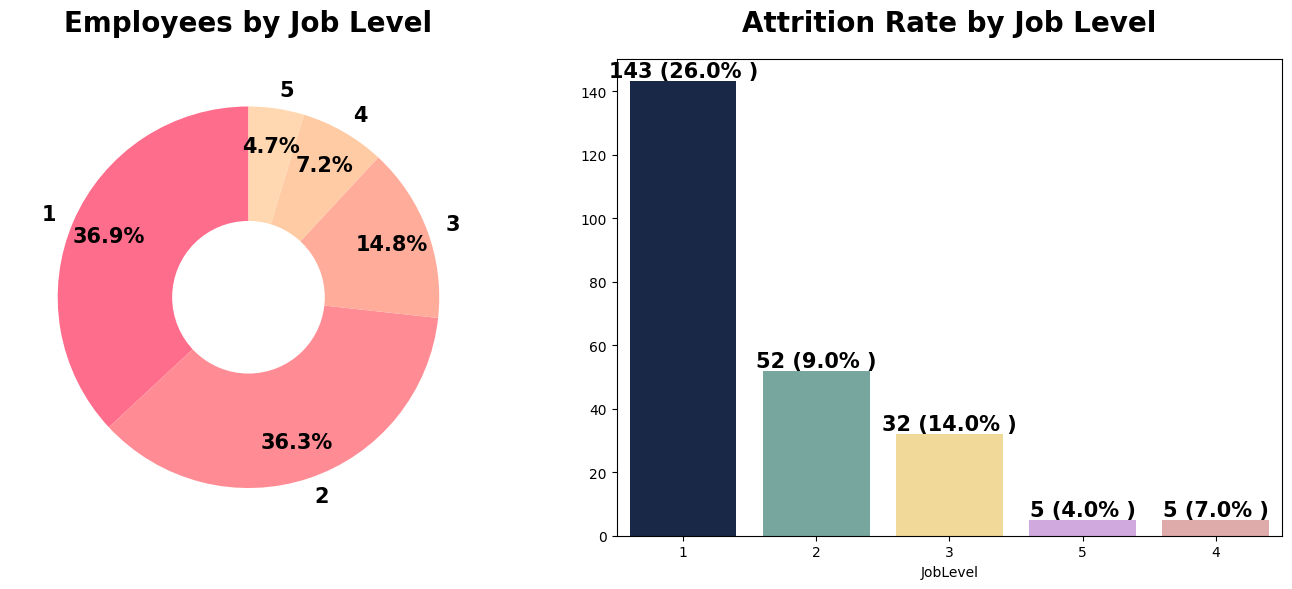

In [86]:
#Visualization to show Total Employees by Job Level.
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
value_1 = df["JobLevel"].value_counts()
plt.title("Employees by Job Level", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%",pctdistance=0.8,startangle=90,
        colors=['#FF6D8C', '#FF8C94', '#FFAC9B', '#FFCBA4',"#FFD8B1"],textprops={"fontweight":"black","size":15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
  
#Visualization to show Attrition Rate by JobLevel.
plt.subplot(1,2,2)
new_df = df[df["Attrition"]=="Yes"]
value_2 = new_df["JobLevel"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index,y=value_2.values,order=value_2.index,palette=["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])
plt.title("Attrition Rate by Job Level",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(attrition_rate[index])+"% )",ha="center",va="bottom",
             size=15,fontweight="black")
plt.tight_layout()
plt.show()

## Inference:
    Employees have an assigned level within the organisation which varies from 1 (staff) to 5 (managerial/director).
    Employees with an assigned Job Level of "1" show the largest normalized proportion of Leavers.
    
    1.Most of the employees in the organization are at Entry Level or Junior Level.
    2.Highest Attrition is at the Entry Level.
    3.As the level increases the attrition rate decreases.

## JOB SATISFACTION

In [87]:
# breakdown by job Satisfaction
df['JobSatisfaction'].value_counts()

JobSatisfaction
4    459
3    442
1    289
2    280
Name: count, dtype: int64

In [88]:
# breakdown by job level
df['JobSatisfaction'].value_counts(normalize=True)

JobSatisfaction
4    0.312245
3    0.300680
1    0.196599
2    0.190476
Name: proportion, dtype: float64

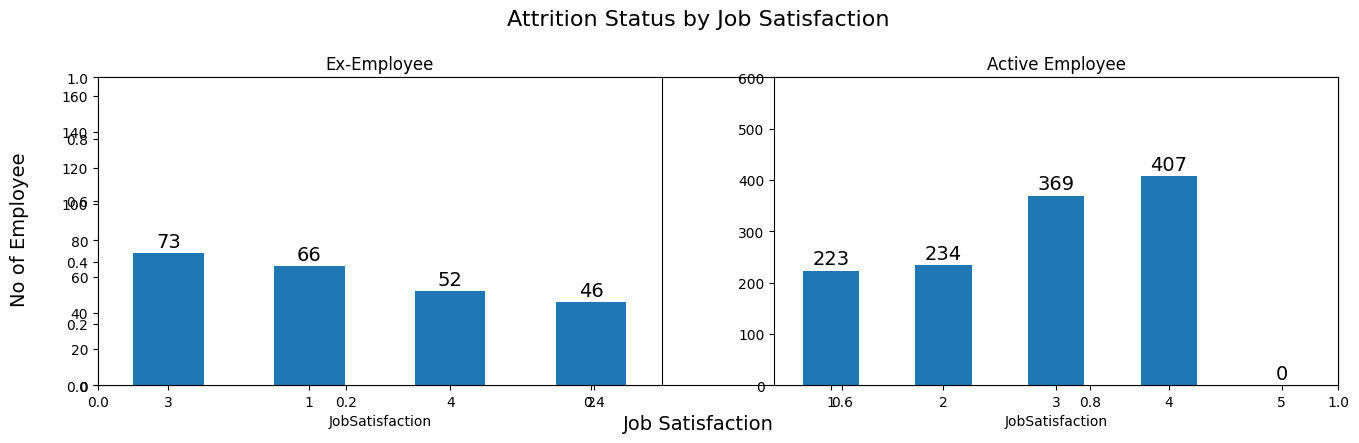

In [89]:
fig, axes = plt.subplots(figsize=(16,4))

plt.subplot(121)
g2 = df.loc[df['Attrition'] == 'Yes', 'JobSatisfaction'].value_counts().plot.bar(title= 'Ex-Employee', color="#1f77b4")
plt.xticks(rotation=0)
plt.ylim(0,170)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+3, "{:1.0f}".format(height), ha="center", fontsize=14) 

plt.subplot(122)
g2 = df.loc[df['Attrition'] == 'No', 'JobSatisfaction'].value_counts().reindex([1,2,3,4,5]).plot.bar(title= 'Active Employee', color="#1f77b4")
plt.xticks(rotation=0)
plt.ylim(0,600)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+12, "{:1.0f}".format(height), ha="center", fontsize=14) 

# set title and axis labels
plt.suptitle('Attrition Status by Job Satisfaction', x=0.5, y=1.05, ha="center", fontsize=16)
fig.text(0.5, 0.001, 'Job Satisfaction', ha='center', fontsize=14)
fig.text(0.07, 0.5, 'No of Employee', va='center', rotation='vertical', fontsize=14)

# plt.savefig("Satisfaction_hist_1.png", bbox_inches="tight")
plt.show()

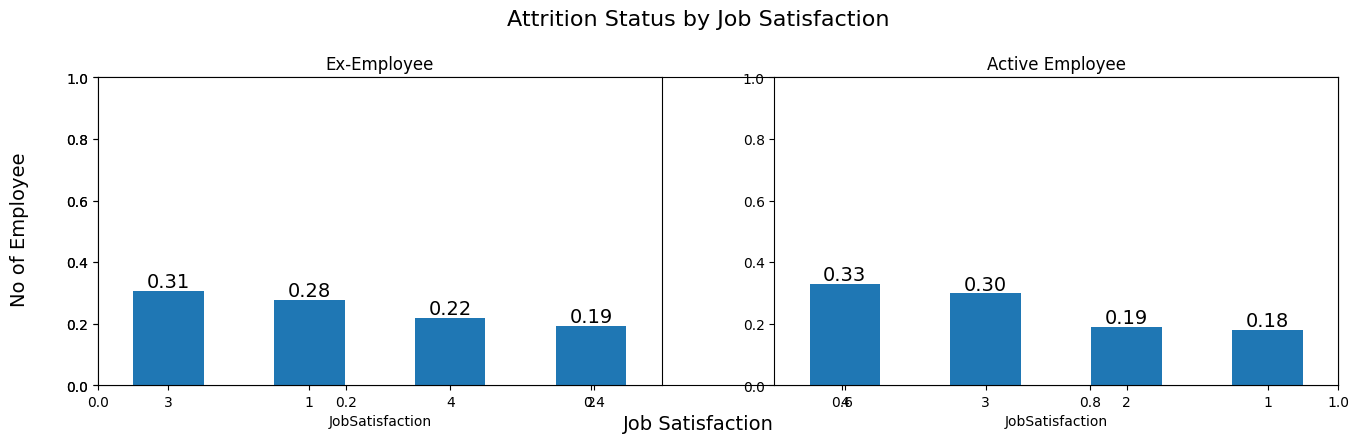

In [90]:
fig, axes = plt.subplots(figsize=(16,4))

plt.subplot(121)
g2 = df.loc[df['Attrition'] == 'Yes', 'JobSatisfaction'].value_counts(normalize=True).plot.bar(title= 'Ex-Employee', color="#1f77b4")
plt.xticks(rotation=0)
plt.ylim(0,1)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+0.01, "{:1.2f}".format(height), ha="center", fontsize=14) 
    
plt.subplot(122)
g2 = df.loc[df['Attrition'] == 'No', 'JobSatisfaction'].value_counts(normalize=True).plot.bar(title= 'Active Employee', color="#1f77b4")
plt.xticks(rotation=0)
plt.ylim(0,1)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+0.01, "{:1.2f}".format(height), ha="center", fontsize=14) 

# set title and axis labels
plt.suptitle('Attrition Status by Job Satisfaction', x=0.5, y=1.05, ha="center", fontsize=16)
fig.text(0.5, 0.001, 'Job Satisfaction', ha='center', fontsize=14)
fig.text(0.07, 0.5, 'No of Employee', va='center', rotation='vertical', fontsize=14)

# plt.savefig("level_hist_2.png", bbox_inches="tight")
plt.show()

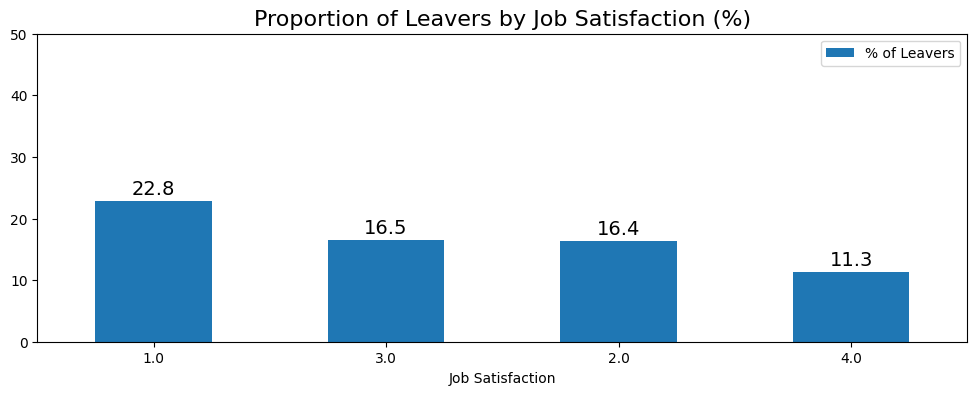

In [91]:
df_JobSatisfaction = pd.DataFrame(columns=["Job Satisfaction", "% of Leavers"])
i=0
for field in list(df['JobSatisfaction'].unique()):
    ratio = df[(df['JobSatisfaction']==field)&(df['Attrition']=="Yes")].shape[0] / df[df['JobSatisfaction']==field].shape[0]
    df_JobSatisfaction.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_JS = df_JobSatisfaction.groupby(by="Job Satisfaction").sum()
g = df_JS.sort_values(by=['% of Leavers'], ascending=False).plot(kind='bar', figsize=(12,4))
plt.ylim(0,50)
plt.title("Proportion of Leavers by Job Satisfaction (%)",  fontsize=16)
plt.xticks(rotation=0)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2., height+1, "{:1.1f}".format(height), ha="center", fontsize=14) 

# plt.savefig("JS_hist_3.png", bbox_inches="tight")
plt.show()

C:\Users\VivekG\AppData\Local\Temp\ipykernel_27296\624048096.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_2.index,y=value_2.values,order=value_2.index,palette=["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])
C:\Users\VivekG\AppData\Local\Temp\ipykernel_27296\624048096.py:17: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(x=value_2.index,y=value_2.values,order=value_2.index,palette=["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])


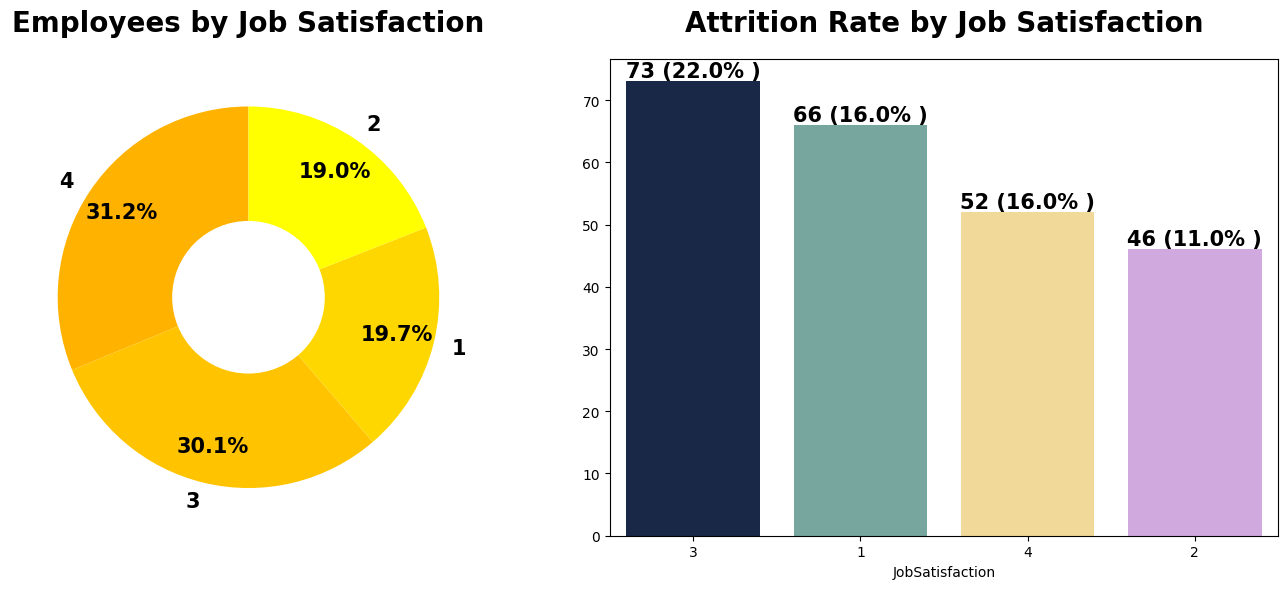

In [92]:
#Visualization to show Total Employees by Job Satisfaction.
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
value_1 = df["JobSatisfaction"].value_counts()
plt.title("Employees by Job Satisfaction", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%",pctdistance=0.8,startangle=90,
        colors=['#FFB300', '#FFC300', '#FFD700', '#FFFF00'],textprops={"fontweight":"black","size":15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
   
#Visualization to show Attrition Rate by Job Satisfaction.
plt.subplot(1,2,2)
new_df = df[df["Attrition"]=="Yes"]
value_2 = new_df["JobSatisfaction"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index,y=value_2.values,order=value_2.index,palette=["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])
plt.title("Attrition Rate by Job Satisfaction",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(attrition_rate[index])+"% )",ha="center",va="bottom",
             size=15,fontweight="black")
plt.tight_layout()
plt.show()

## Inference:
    1.Most of the employees have rated their job satisfaction as high or very high.
    2.Employees who rated their job satisfaction low are mostly leaving the organization.
    3.All the categories in job satisfaction is having high attrition rate.

# TOTAL WORKING EXPERIENCE

In [93]:
# Years At Company
print("Total Working years for employees is from {} to {} years.".format(df['TotalWorkingYears'].min(), df['TotalWorkingYears'].max()))

Total Working years for employees is from 0 to 40 years.


In [94]:
# Ex-Employees
print("Ex-Employees:")
print("Average Total Years Exp of Ex-Employees = {:1.2f} years".format(np.mean(df.loc[df['Attrition'] == 'Yes', 'TotalWorkingYears'])))
print("Standard Deviation = {:1.2f}".format(np.std(df.loc[df['Attrition'] == 'Yes', 'TotalWorkingYears'])))

Ex-Employees:
Average Total Years Exp of Ex-Employees = 8.24 years
Standard Deviation = 7.15


In [95]:
# Active Employees
print("Active Employees:")
print("Average Total Years Exp of Active Employees = {:1.2f} years".format(np.mean(df.loc[df['Attrition'] == 'No', 'TotalWorkingYears'])))
print("Standard Deviation = {:1.2f}".format(np.std(df.loc[df['Attrition'] == 'No', 'TotalWorkingYears'])))

Active Employees:
Average Total Years Exp of Active Employees = 11.86 years
Standard Deviation = 7.76


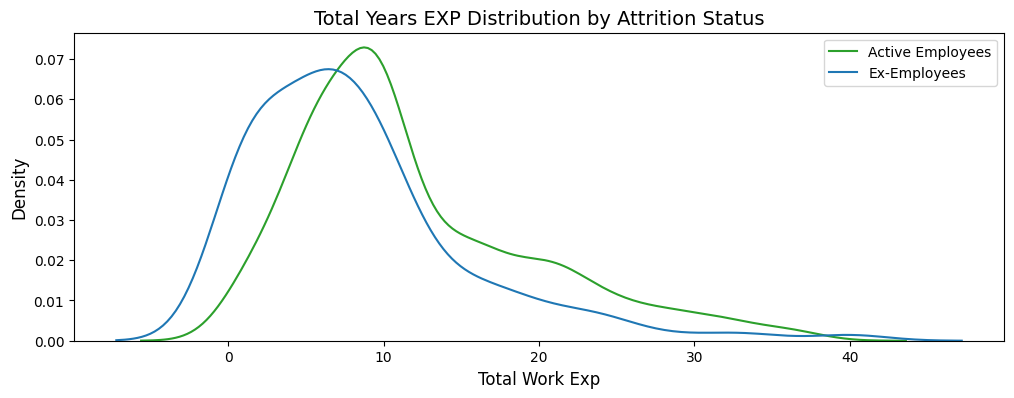

In [96]:
# kernel density estimation (KDE) plot 

plt.subplots(figsize=(12,4))

target_0 = df.loc[df["Attrition"] == "No"]
target_1 = df.loc[df["Attrition"] == "Yes"]

sns.kdeplot(data=target_0, x="TotalWorkingYears", fill=False, label="Active Employees", color="#2ca02c")
sns.kdeplot(data=target_1, x="TotalWorkingYears", fill=False, label="Ex-Employees", color="#1f77b4")

plt.legend()
plt.xlabel("Total Work Exp", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.title("Total Years EXP Distribution by Attrition Status", fontsize=14)

# plt.savefig("year_kde_1.png", bbox_inches="tight")
plt.show()

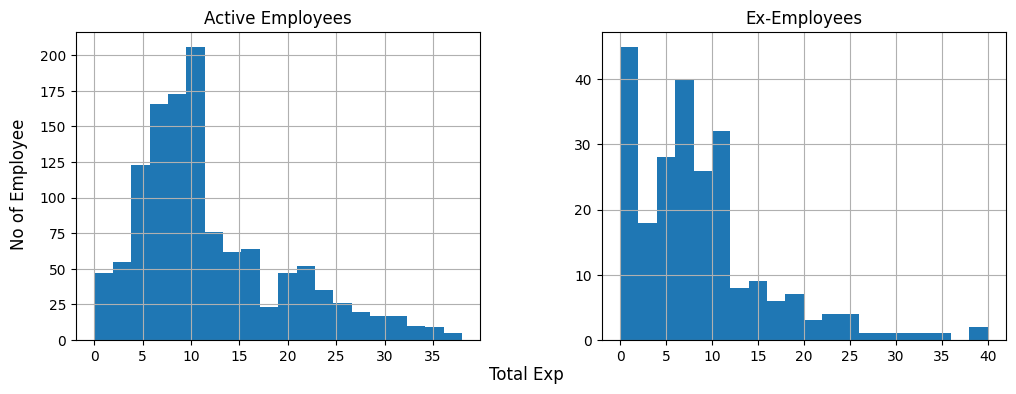

In [97]:
# plot histogram
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(12,4)

target_0[['TotalWorkingYears']].hist(bins=20, ax=axes[0])
axes[0].set_title('Active Employees')

target_1[['TotalWorkingYears']].hist(bins=20, ax=axes[1])
axes[1].set_title('Ex-Employees')

fig.text(0.5, 0.01, 'Total Exp', ha='center', fontsize=12)
fig.text(0.07, 0.5, 'No of Employee', va='center', rotation='vertical', fontsize=12)

# plt.savefig("year_hist.png"", bbox_inches="tight")
plt.show()

In [98]:
# Define the bin edges for the groups
bin_edges = [0, 5, 10, 20, 50]

# Define the labels for the groups
bin_labels = ['0-5 years', '5-10 years', '10-20 years', "20+ years"]

# Cut the DailyRate column into groups
df["TotalWorkingYearsGroup"] = pd.cut(df['TotalWorkingYears'], bins=bin_edges, labels=bin_labels)

C:\Users\VivekG\AppData\Local\Temp\ipykernel_27296\1677291107.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_2.index.tolist(), y=value_2.values,palette=["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])
C:\Users\VivekG\AppData\Local\Temp\ipykernel_27296\1677291107.py:17: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(x=value_2.index.tolist(), y=value_2.values,palette=["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])


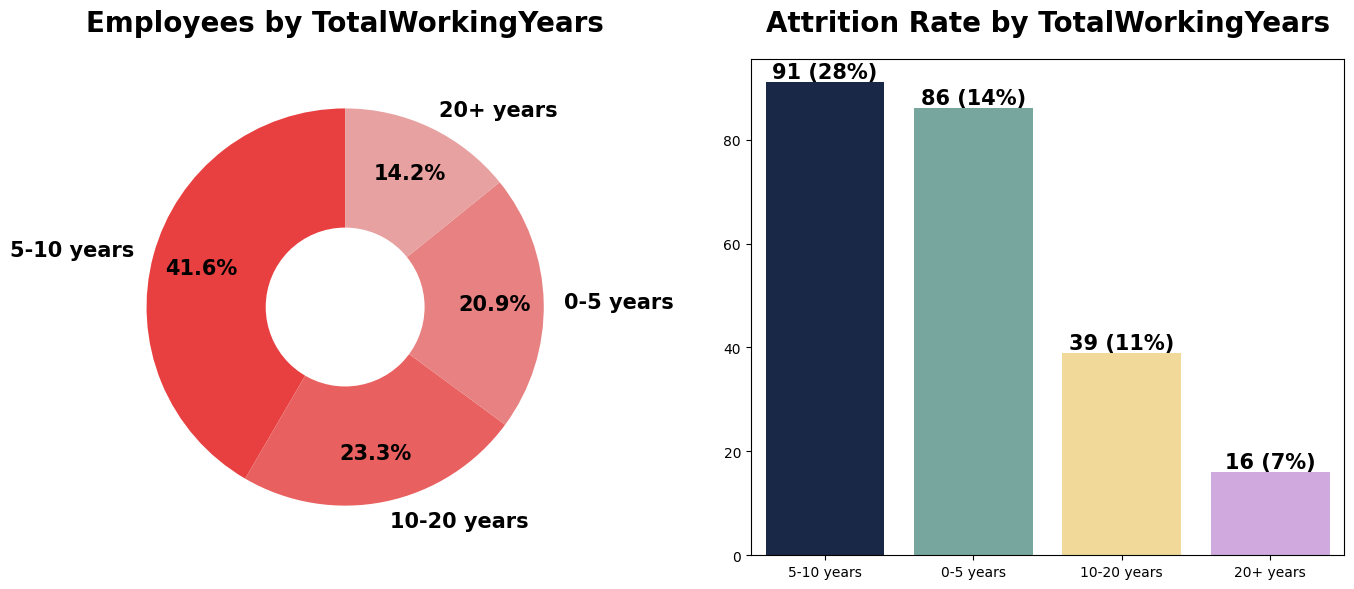

In [99]:
#Visualization to show Total Employees by TotalWorkingYearsGroup.
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
value_1 = df["TotalWorkingYearsGroup"].value_counts()
plt.title("Employees by TotalWorkingYears", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%",pctdistance=0.75,startangle=90,
        colors=['#E84040', '#E96060', '#E88181', '#E7A1A1'],textprops={"fontweight":"black","size":15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
    
#Visualization to show Attrition Rate by TotalWorkingYearsGroup.
plt.subplot(1,2,2)
new_df = df[df["Attrition"]=="Yes"]
value_2 = new_df["TotalWorkingYearsGroup"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index.tolist(), y=value_2.values,palette=["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])
plt.title("Attrition Rate by TotalWorkingYears",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(int(attrition_rate[index]))+"%)",ha="center",va="bottom",
             size=15,fontweight="black")
plt.tight_layout()
plt.show()

## Inference:
    1.Most of the employees are having a total of 5 to 10 years of working experience. But their Attrition Rate 
    is also very high.
    2.Employee with working experience of less than 10 years are having High Attrition Rate.
    3.Employee with working experience of more than 10 years are having Less Attrition Rate.

### Years at the Company



In [100]:
# Years At Company
print("Years At Company for employees is from {} to {} years.".format(df['YearsAtCompany'].min(), df['YearsAtCompany'].max()))

Years At Company for employees is from 0 to 40 years.


In [101]:
# Ex-Employees
print("Ex-Employees:")
print("Average Years At Company of Ex-Employees = {:1.2f} years".format(np.mean(df.loc[df['Attrition'] == 'Yes', 'YearsAtCompany'])))
print("Standard Deviation = {:1.2f}".format(np.std(df.loc[df['Attrition'] == 'Yes', 'YearsAtCompany'])))

Ex-Employees:
Average Years At Company of Ex-Employees = 5.13 years
Standard Deviation = 5.94


In [102]:
# Active Employees
print("Active Employees:")
print("Average Years At Company of Active Employees = {:1.2f} years".format(np.mean(df.loc[df['Attrition'] == 'No', 'YearsAtCompany'])))
print("Standard Deviation = {:1.2f}".format(np.std(df.loc[df['Attrition'] == 'No', 'YearsAtCompany'])))

Active Employees:
Average Years At Company of Active Employees = 7.37 years
Standard Deviation = 6.09


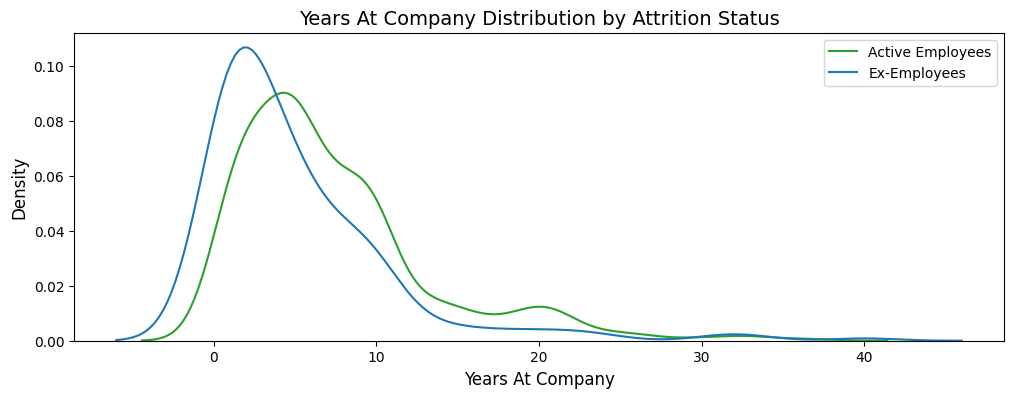

In [103]:
# kernel density estimation (KDE) plot 

plt.subplots(figsize=(12,4))

target_0 = df.loc[df["Attrition"] == "No"]
target_1 = df.loc[df["Attrition"] == "Yes"]

sns.kdeplot(data=target_0, x="YearsAtCompany", fill=False, label="Active Employees", color="#2ca02c")
sns.kdeplot(data=target_1, x="YearsAtCompany", fill=False, label="Ex-Employees", color="#1f77b4")

plt.legend()
plt.xlabel("Years At Company", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.title("Years At Company Distribution by Attrition Status", fontsize=14)

# plt.savefig("year__1.png", bbox_inches="tight")
plt.show()

You can get negative x-values ending up with some positive density from a kernel density estimate, simply because of the way KDEs work. Refer https://stats.stackexchange.com/questions/109549/negative-density-for-non-negative-variables and https://www.youtube.com/watch?v=R6_LR-f6Tt4

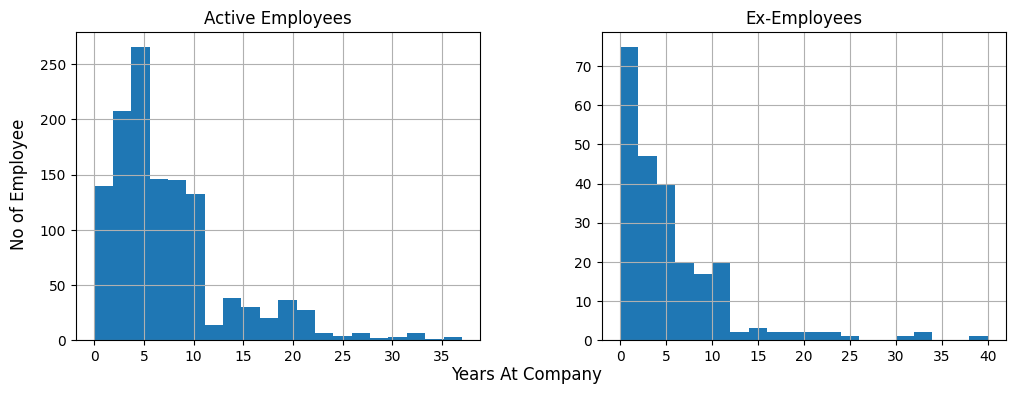

In [104]:
# plot histogram
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(12,4)

target_0[['YearsAtCompany']].hist(bins=20, ax=axes[0])
axes[0].set_title('Active Employees')

target_1[['YearsAtCompany']].hist(bins=20, ax=axes[1])
axes[1].set_title('Ex-Employees')

fig.text(0.5, 0.01, 'Years At Company', ha='center', fontsize=12)
fig.text(0.07, 0.5, 'No of Employee', va='center', rotation='vertical', fontsize=12)

# plt.savefig("year_hist.png"", bbox_inches="tight")
plt.show()

In [105]:
# Define the bin edges for the groups
bin_edges = [0, 1, 5, 10, 20]

# Define the labels for the groups
bin_labels = ['0-1 years', '2-5 years', '5-10 years', "10+ years"]

# Cut the DailyRate column into groups
df["YearsAtCompanyGroup"] = pd.cut(df['YearsAtCompany'], bins=bin_edges, labels=bin_labels)

C:\Users\VivekG\AppData\Local\Temp\ipykernel_27296\3573683344.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_2.index.tolist(), y=value_2.values,palette=["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])
C:\Users\VivekG\AppData\Local\Temp\ipykernel_27296\3573683344.py:17: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(x=value_2.index.tolist(), y=value_2.values,palette=["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])


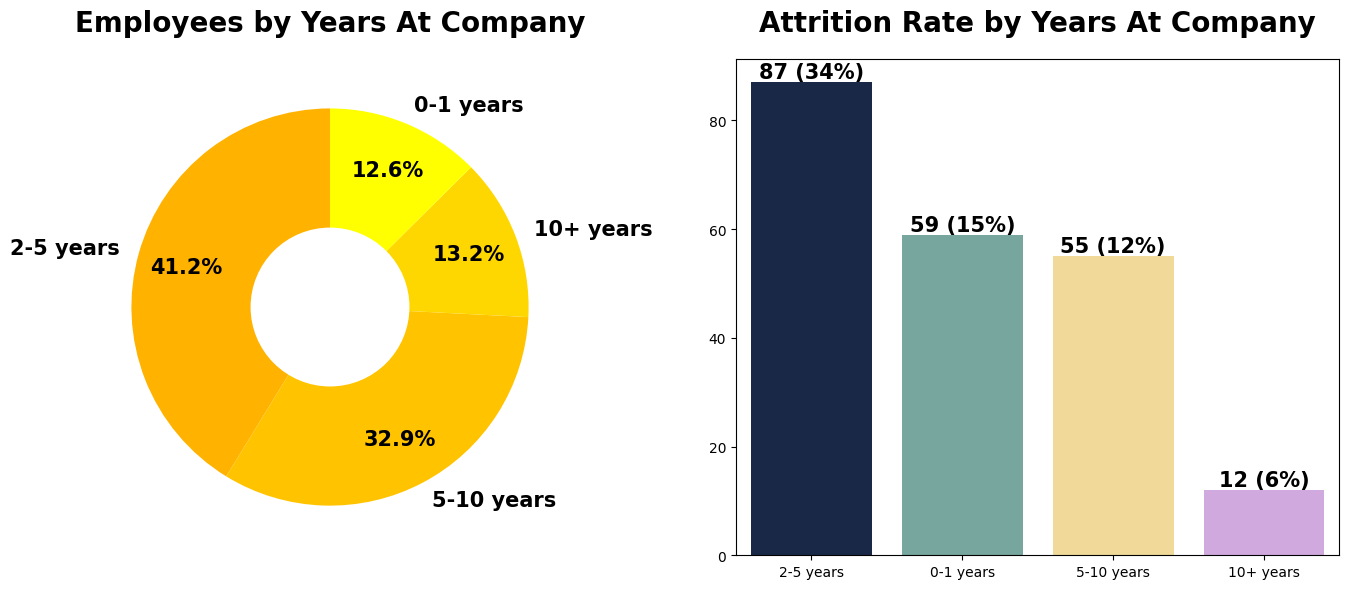

In [106]:
#Visualization to show Total Employees by YearsAtCompany.
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
value_1 = df["YearsAtCompanyGroup"].value_counts()
plt.title("Employees by Years At Company", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%",pctdistance=0.75,startangle=90,
        colors=['#FFB300', '#FFC300', '#FFD700', '#FFFF00'],textprops={"fontweight":"black","size":15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

#Visualization to show Attrition Rate by YearsAtCompanyGroup.
plt.subplot(1,2,2)
new_df = df[df["Attrition"]=="Yes"]
value_2 = new_df["YearsAtCompanyGroup"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index.tolist(), y=value_2.values,palette=["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])
plt.title("Attrition Rate by Years At Company",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(int(attrition_rate[index]))+"%)",ha="center",va="bottom",
             size=15,fontweight="black")
plt.tight_layout()
plt.show()

##  Inference:
    The average number of years at the company for active employees is 7.37 years and ex-employees is 5.13 years.
    1.Most employees has worked for 2 to 10 years in the organization.
    2.Very few employees has working for less than 1 year or more than 10 years.
    3.Employee who have worked for 2-5 years are having very high attrition rate.
    4.Employee who have worked for 10+ years are having low attrition rate.

## YEARS IN CURRENT ROLE

In [107]:
# Years At Company
print("YearsIn Current Role for employees is from {} to {} years.".format(df['YearsInCurrentRole'].min(), df['YearsInCurrentRole'].max()))

YearsIn Current Role for employees is from 0 to 18 years.


In [108]:
# breakdown by Current Role
df['YearsInCurrentRole'].value_counts()

YearsInCurrentRole
2     372
0     244
7     222
3     135
4     104
8      89
9      67
1      57
6      37
5      36
10     29
11     22
13     14
14     11
12     10
15      8
16      7
17      4
18      2
Name: count, dtype: int64

In [109]:
# Ex-Employees
print("Ex-Employees:")
print("Average Years In CurrentRole of Ex-Employees = {:1.2f} years".format(np.mean(df.loc[df['Attrition'] == 'Yes', 'YearsInCurrentRole'])))
print("Standard Deviation = {:1.2f}".format(np.std(df.loc[df['Attrition'] == 'Yes', 'YearsInCurrentRole'])))

Ex-Employees:
Average Years In CurrentRole of Ex-Employees = 2.90 years
Standard Deviation = 3.17


In [110]:
# Active Employees
print("Active Employees:")
print("Average Years In CurrentRole of Active Employees = {:1.2f} years".format(np.mean(df.loc[df['Attrition'] == 'No', 'YearsInCurrentRole'])))
print("Standard Deviation = {:1.2f}".format(np.std(df.loc[df['Attrition'] == 'No', 'YearsInCurrentRole'])))

Active Employees:
Average Years In CurrentRole of Active Employees = 4.48 years
Standard Deviation = 3.65


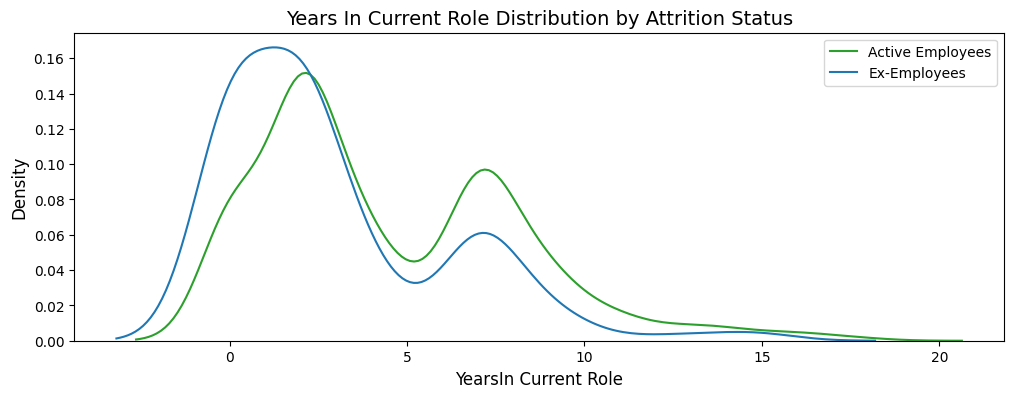

In [111]:
# kernel density estimation (KDE) plot 

plt.subplots(figsize=(12,4))

target_0 = df.loc[df["Attrition"] == "No"]
target_1 = df.loc[df["Attrition"] == "Yes"]

sns.kdeplot(data=target_0, x="YearsInCurrentRole", fill=False, label="Active Employees", color="#2ca02c")
sns.kdeplot(data=target_1, x="YearsInCurrentRole", fill=False, label="Ex-Employees", color="#1f77b4")

plt.legend()
plt.xlabel("YearsIn Current Role", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.title("Years In Current Role Distribution by Attrition Status", fontsize=14)

# plt.savefig("year__CR.png", bbox_inches="tight")
plt.show()

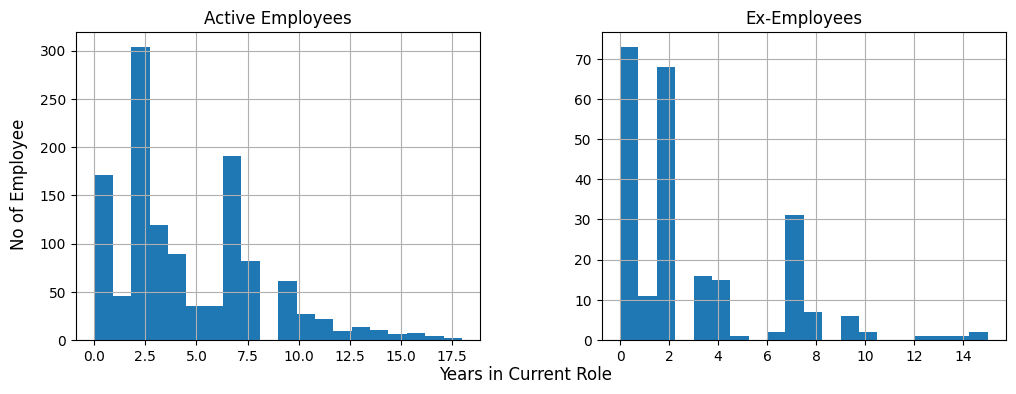

In [112]:
# plot histogram
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(12,4)

target_0[['YearsInCurrentRole']].hist(bins=20, ax=axes[0])
axes[0].set_title('Active Employees')

target_1[['YearsInCurrentRole']].hist(bins=20, ax=axes[1])
axes[1].set_title('Ex-Employees')

fig.text(0.5, 0.01, 'Years in Current Role', ha='center', fontsize=12)
fig.text(0.07, 0.5, 'No of Employee', va='center', rotation='vertical', fontsize=12)

# plt.savefig("year_CR.png"", bbox_inches="tight")
plt.show()

In [113]:
# Define the bin edges for the groups
bin_edges = [0, 1, 5, 10, 20]

# Define the labels for the groups
bin_labels = ['0-1 years', '2-5 years', '5-10 years', "10+ years"]

# Cut the DailyRate column into groups
df["YearsInCurrentRoleGroup"] = pd.cut(df['YearsInCurrentRole'], bins=bin_edges, labels=bin_labels)

C:\Users\VivekG\AppData\Local\Temp\ipykernel_27296\2435548289.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_2.index.tolist(), y=value_2.values,palette= ["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])
C:\Users\VivekG\AppData\Local\Temp\ipykernel_27296\2435548289.py:17: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(x=value_2.index.tolist(), y=value_2.values,palette= ["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])


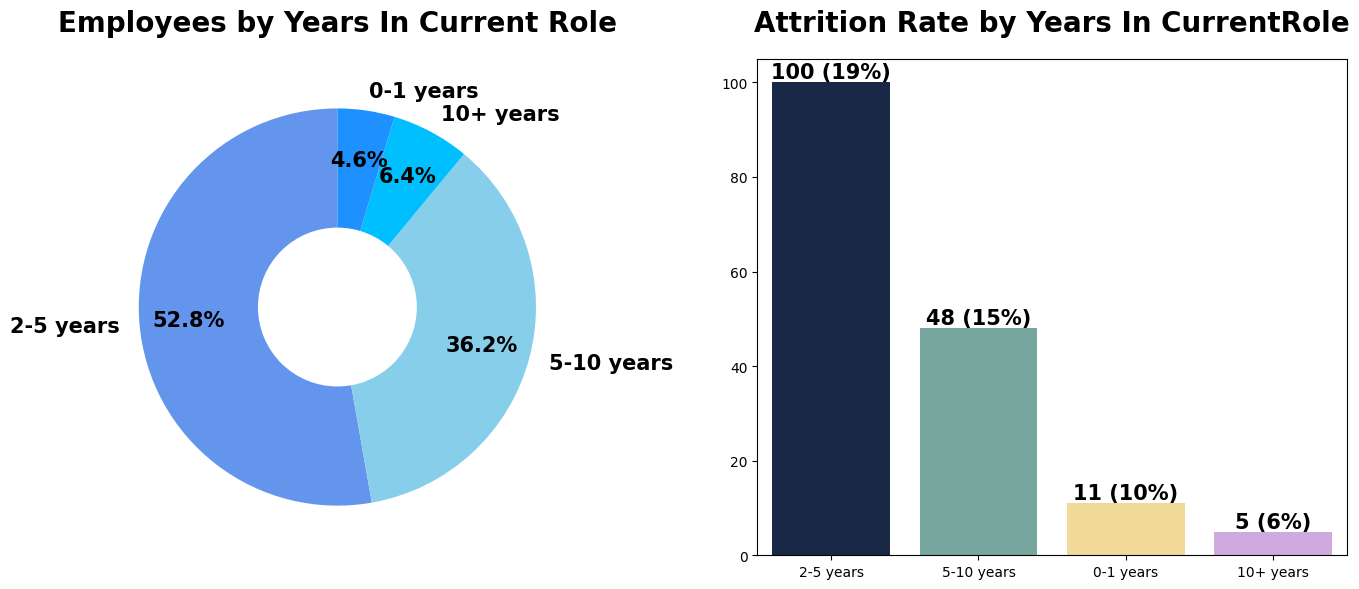

In [114]:
#Visualization to show Total Employees by YearsInCurrentRoleGroup.
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
value_1 = df["YearsInCurrentRoleGroup"].value_counts()
plt.title("Employees by Years In Current Role", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%",pctdistance=0.75,startangle=90,
        colors=['#6495ED', '#87CEEB', '#00BFFF', '#1E90FF'],textprops={"fontweight":"black","size":15,"color":"black"})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
   
#Visualization to show Attrition Rate by YearsInCurrentRoleGroup.
plt.subplot(1,2,2)
new_df = df[df["Attrition"]=="Yes"]
value_2 = new_df["YearsInCurrentRoleGroup"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index.tolist(), y=value_2.values,palette= ["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])
plt.title("Attrition Rate by Years In CurrentRole",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(int(attrition_rate[index]))+"%)",ha="center",va="bottom",
             size=15,fontweight="black")
plt.tight_layout()
plt.show()

## Inference:
    1.Most employees has worked for 2 to 10 years for the same role in the organization.
    2.Very few employees has worked for less than 1 year or more than 10 years in the same role.
    3.Employee who has worked for 2 to 0 years in the same role are having very high attrition rate.
    4.Employee who has worked for 10+ years in the same role are having low attrition rate.

## YEARS SINCE LAST PROMOTION

In [115]:
# Years Since Last Promotion
print("Years Since last Promotion for employees is from {} to {} years.".format(df['YearsSinceLastPromotion'].min(), df['YearsSinceLastPromotion'].max()))

Years Since last Promotion for employees is from 0 to 15 years.


In [116]:
# breakdown by Last Promotion
df['YearsSinceLastPromotion'].value_counts()

YearsSinceLastPromotion
0     581
1     357
2     159
7      76
4      61
3      52
5      45
6      32
11     24
8      18
9      17
15     13
13     10
12     10
14      9
10      6
Name: count, dtype: int64

In [117]:
# Ex-Employees
print("Ex-Employees:")
print("Average Years Since Last Promotion of Ex-Employees = {:1.2f} years".format(np.mean(df.loc[df['Attrition'] == 'Yes', 'YearsSinceLastPromotion'])))
print("Standard Deviation = {:1.2f}".format(np.std(df.loc[df['Attrition'] == 'Yes', 'YearsSinceLastPromotion'])))

Ex-Employees:
Average Years Since Last Promotion of Ex-Employees = 1.95 years
Standard Deviation = 3.15


In [118]:
# Active Employees
print("Active Employees:")
print("Average Years Since Last Promotion of Active Employees = {:1.2f} years".format(np.mean(df.loc[df['Attrition'] == 'No', 'YearsSinceLastPromotion'])))
print("Standard Deviation = {:1.2f}".format(np.std(df.loc[df['Attrition'] == 'No', 'YearsSinceLastPromotion'])))

Active Employees:
Average Years Since Last Promotion of Active Employees = 2.23 years
Standard Deviation = 3.23


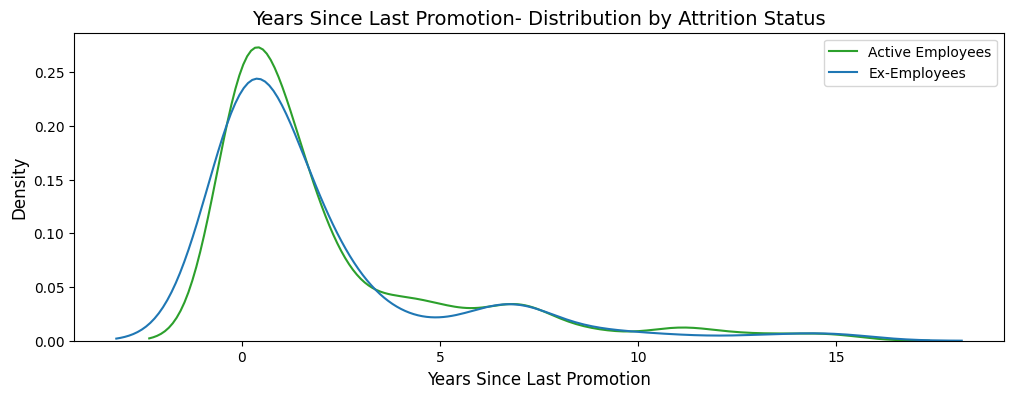

In [119]:
# kernel density estimation (KDE) plot 

plt.subplots(figsize=(12,4))

target_0 = df.loc[df["Attrition"] == "No"]
target_1 = df.loc[df["Attrition"] == "Yes"]

sns.kdeplot(data=target_0, x="YearsSinceLastPromotion", fill=False, label="Active Employees", color="#2ca02c")
sns.kdeplot(data=target_1, x="YearsSinceLastPromotion", fill=False, label="Ex-Employees", color="#1f77b4")

plt.legend()
plt.xlabel("Years Since Last Promotion", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.title("Years Since Last Promotion- Distribution by Attrition Status", fontsize=14)

# plt.savefig("year__LP.png", bbox_inches="tight")
plt.show()

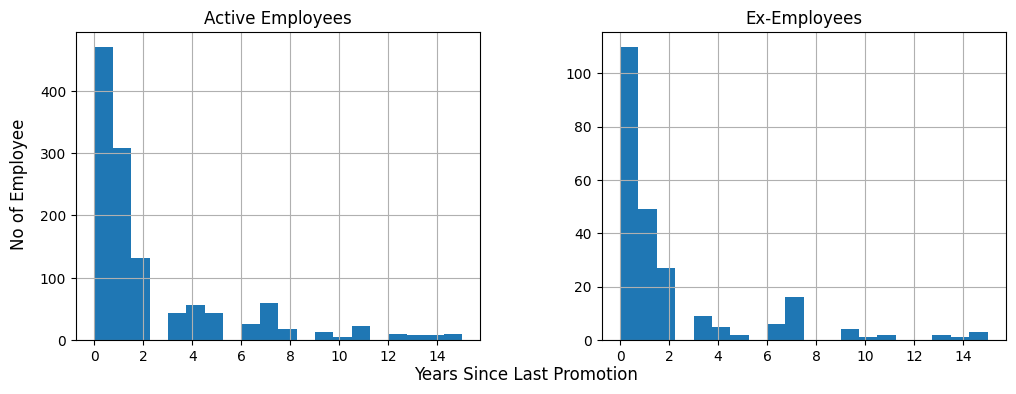

In [120]:
# plot histogram
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(12,4)

target_0[['YearsSinceLastPromotion']].hist(bins=20, ax=axes[0])
axes[0].set_title('Active Employees')

target_1[['YearsSinceLastPromotion']].hist(bins=20, ax=axes[1])
axes[1].set_title('Ex-Employees')

fig.text(0.5, 0.01, 'Years Since Last Promotion', ha='center', fontsize=12)
fig.text(0.07, 0.5, 'No of Employee', va='center', rotation='vertical', fontsize=12)

# plt.savefig("year_LP.png"", bbox_inches="tight")
plt.show()

In [121]:
# Define the bin edges for the groups
bin_edges = [0, 1, 5, 10, 20]

# Define the labels for the groups
bin_labels = ['0-1 years', '2-5 years', '5-10 years', "10+ years"]

# Cut the DailyRate column into groups
df["YearsSinceLastPromotionGroup"] = pd.cut(df['YearsSinceLastPromotion'], bins=bin_edges, labels=bin_labels)

C:\Users\VivekG\AppData\Local\Temp\ipykernel_27296\1571228995.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_2.index.tolist(), y=value_2.values,palette=["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])
C:\Users\VivekG\AppData\Local\Temp\ipykernel_27296\1571228995.py:17: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(x=value_2.index.tolist(), y=value_2.values,palette=["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])


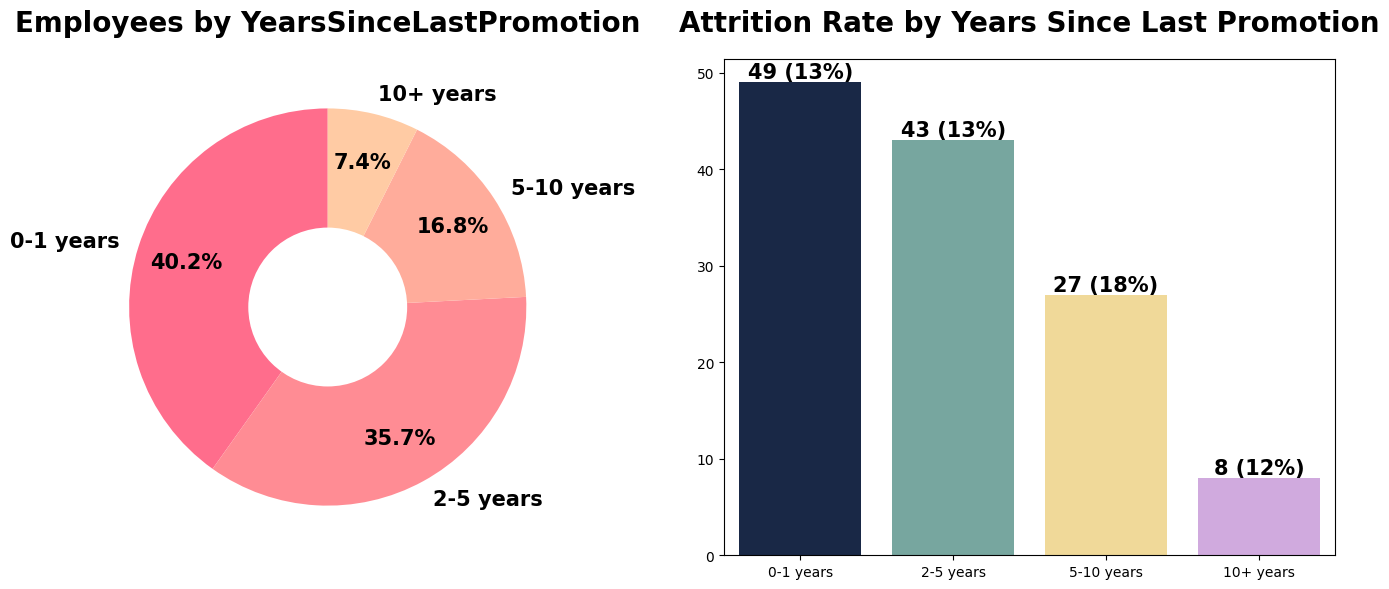

In [122]:
#Visualization to show Total Employees by YearsSinceLastPromotionGroup.
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
value_1 = df["YearsSinceLastPromotionGroup"].value_counts()
plt.title("Employees by YearsSinceLastPromotion", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%",pctdistance=0.75,startangle=90,
        colors=['#FF6D8C', '#FF8C94', '#FFAC9B', '#FFCBA4'],textprops={"fontweight":"black","size":15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
    
#Visualization to show Attrition Rate by YearsSinceLastPromotionGroup.
plt.subplot(1,2,2)
new_df = df[df["Attrition"]=="Yes"]
value_2 = new_df["YearsSinceLastPromotionGroup"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index.tolist(), y=value_2.values,palette=["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])

plt.title("Attrition Rate by Years Since Last Promotion",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(int(attrition_rate[index]))+"%)",ha="center",va="bottom",
             size=15,fontweight="black")
plt.tight_layout()
plt.show()

## Inference:
    1.Almost 36% of employee has not been promoted since 2 to 5 years.
    2.Almost 8% of employees has not been promoted since 10+ years.
    3.All the categories in this feature is having high attrition rate specially employee who has not been promoted since
     5+ years.

## YEARS WITH CURRENT MANAGER

In [123]:
# Years With Current Mgr
print("Years With Current Manager for employees is from {} to {} years.".format(df['YearsWithCurrManager'].min(), df['YearsWithCurrManager'].max()))

Years With Current Manager for employees is from 0 to 17 years.


In [124]:
# breakdown by Years With Current Mgr
df['YearsWithCurrManager'].value_counts()

YearsWithCurrManager
2     344
0     263
7     216
3     142
8     107
4      98
1      76
9      64
5      31
6      29
10     27
11     22
12     18
13     14
17      7
15      5
14      5
16      2
Name: count, dtype: int64

In [125]:
# Ex-Employees
print("Ex-Employees:")
print("Average Years With Current Manager of Ex-Employees = {:1.2f} years".format(np.mean(df.loc[df['Attrition'] == 'Yes', 'YearsWithCurrManager'])))
print("Standard Deviation = {:1.2f}".format(np.std(df.loc[df['Attrition'] == 'Yes', 'YearsWithCurrManager'])))

Ex-Employees:
Average Years With Current Manager of Ex-Employees = 2.85 years
Standard Deviation = 3.14


In [126]:
# Active Employees
print("Active Employees:")
print("Average Years With Current Manager of Active Employees = {:1.2f} years".format(np.mean(df.loc[df['Attrition'] == 'No', 'YearsWithCurrManager'])))
print("Standard Deviation = {:1.2f}".format(np.std(df.loc[df['Attrition'] == 'No', 'YearsWithCurrManager'])))

Active Employees:
Average Years With Current Manager of Active Employees = 4.37 years
Standard Deviation = 3.59


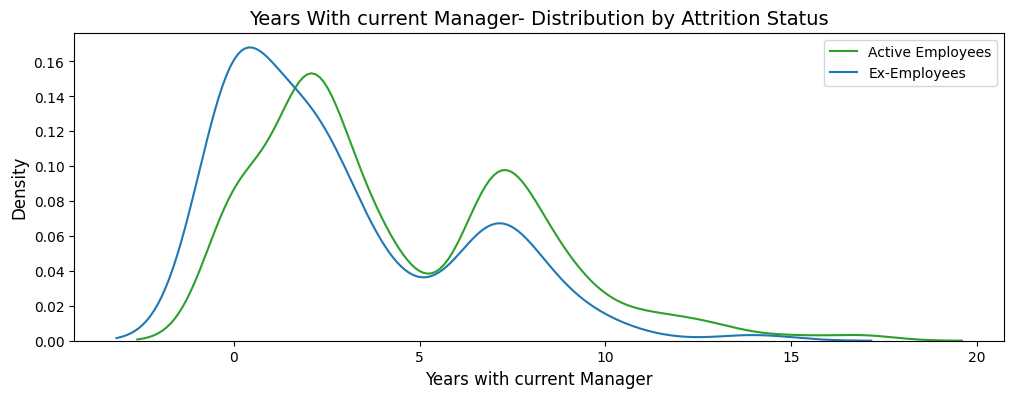

In [127]:
# kernel density estimation (KDE) plot 

plt.subplots(figsize=(12,4))

target_0 = df.loc[df["Attrition"] == "No"]
target_1 = df.loc[df["Attrition"] == "Yes"]

sns.kdeplot(data=target_0, x="YearsWithCurrManager", fill=False, label="Active Employees", color="#2ca02c")
sns.kdeplot(data=target_1, x="YearsWithCurrManager", fill=False, label="Ex-Employees", color="#1f77b4")

plt.legend()
plt.xlabel("Years with current Manager", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.title("Years With current Manager- Distribution by Attrition Status", fontsize=14)

# plt.savefig("year__CM.png", bbox_inches="tight")
plt.show()

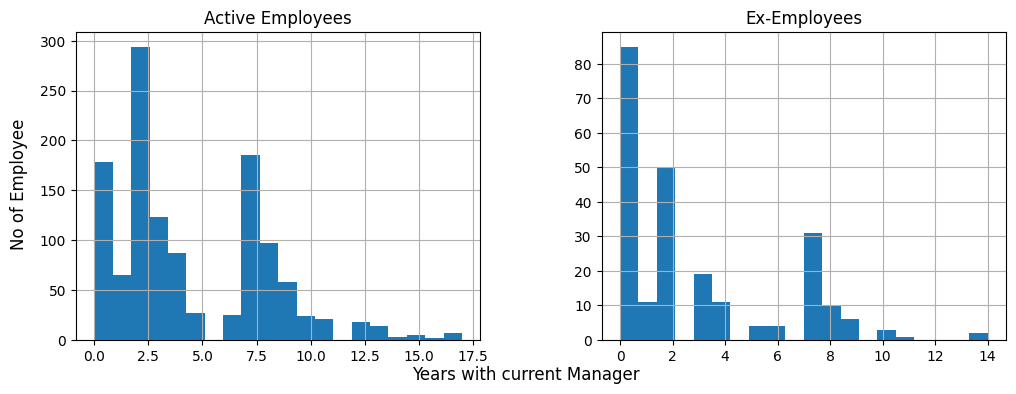

In [128]:
# plot histogram
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(12,4)

target_0[['YearsWithCurrManager']].hist(bins=20, ax=axes[0])
axes[0].set_title('Active Employees')

target_1[['YearsWithCurrManager']].hist(bins=20, ax=axes[1])
axes[1].set_title('Ex-Employees')

fig.text(0.5, 0.01, 'Years with current Manager', ha='center', fontsize=12)
fig.text(0.07, 0.5, 'No of Employee', va='center', rotation='vertical', fontsize=12)

# plt.savefig("year_CM.png"", bbox_inches="tight")
plt.show()

In [129]:
# Define the bin edges for the groups
bin_edges = [0, 1, 5, 10, 20]

# Define the labels for the groups
bin_labels = ['0-1 years', '2-5 years', '5-10 years', "10+ years"]

# Cut the DailyRate column into groups
df["YearsWithCurrManagerGroup"] = pd.cut(df['YearsWithCurrManager'], bins=bin_edges, labels=bin_labels)

C:\Users\VivekG\AppData\Local\Temp\ipykernel_27296\455322085.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_2.index.tolist(), y=value_2.values,palette=["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])
C:\Users\VivekG\AppData\Local\Temp\ipykernel_27296\455322085.py:17: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(x=value_2.index.tolist(), y=value_2.values,palette=["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])


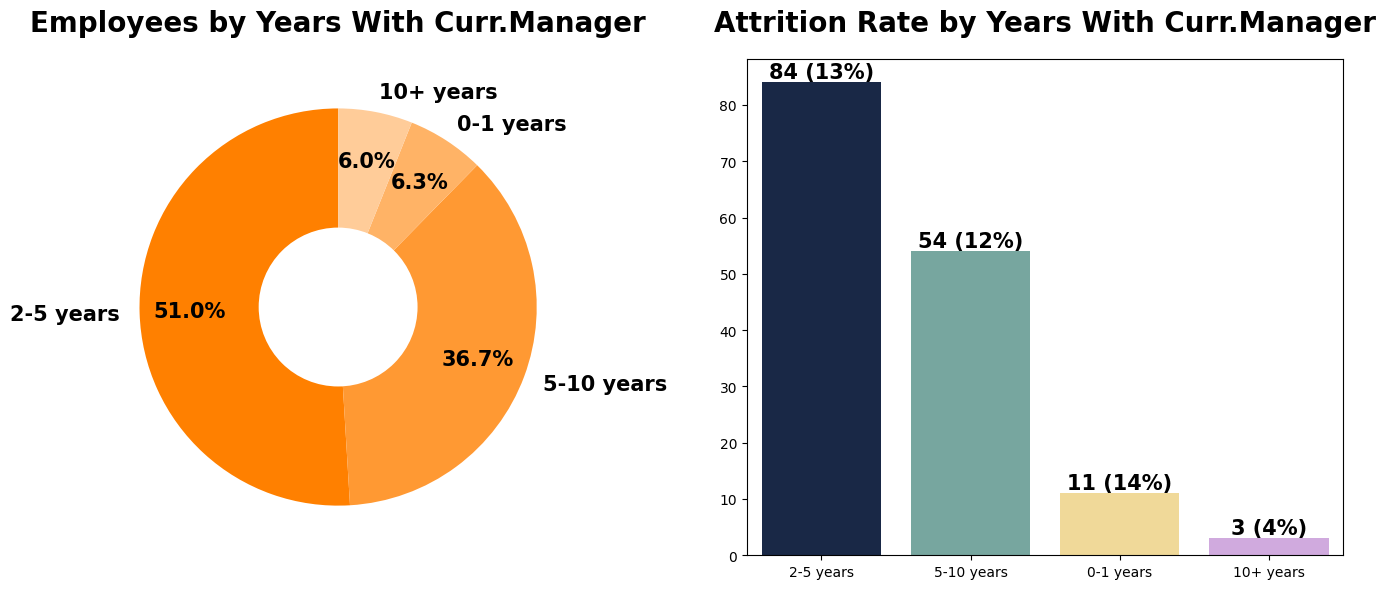

In [130]:
#Visualization to show Total Employees by YearsWithCurrManagerGroup.
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
value_1 = df["YearsWithCurrManagerGroup"].value_counts()
plt.title("Employees by Years With Curr.Manager", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%",pctdistance=0.75,startangle=90,
        colors= ['#FF8000', '#FF9933', '#FFB366', '#FFCC99'],textprops={"fontweight":"black","size":15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

#Visualization to show Attrition Rate by YearsWithCurrManagerGroup.
plt.subplot(1,2,2)
new_df = df[df["Attrition"]=="Yes"]
value_2 = new_df["YearsWithCurrManagerGroup"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index.tolist(), y=value_2.values,palette=["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])
plt.title("Attrition Rate by Years With Curr.Manager",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(int(attrition_rate[index]))+"%)",ha="center",va="bottom",
             size=15,fontweight="black")
plt.tight_layout()
plt.show()


## Inference:
    1.Almost 51% of employees has worked for 2-5 years with the same manager.
    2.Almost 38% of employees has worked for 5-10 years with the same manager.
    3.Employee who has worked for 10+ year with the same manager are having very low attrition rate.
 

### Overtime



In [131]:
# breakdown by overtime
df['OverTime'].value_counts()

OverTime
No     1054
Yes     416
Name: count, dtype: int64

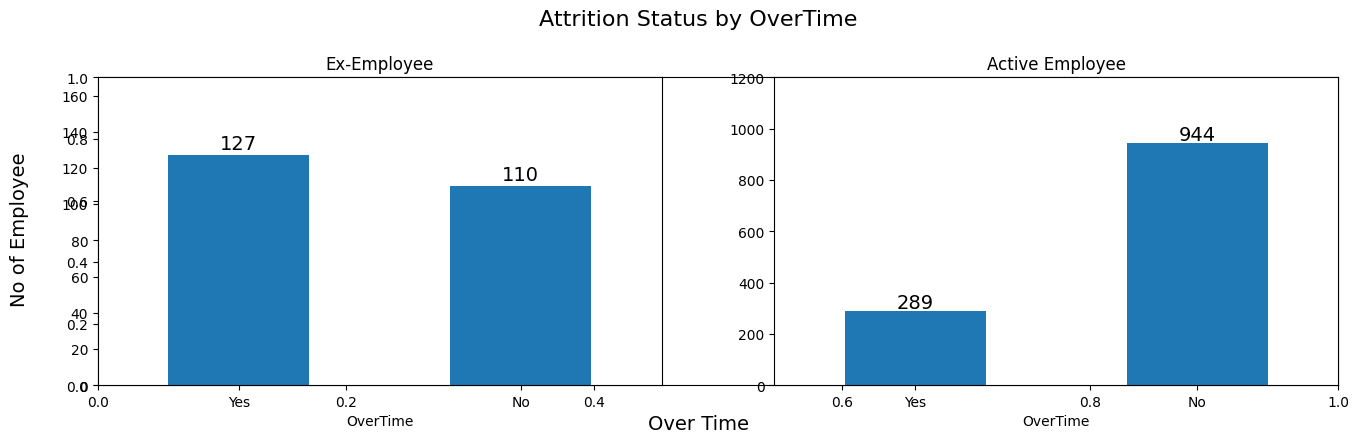

In [132]:
fig, axes = plt.subplots(figsize=(16,4))

plt.subplot(121)
g2 = df.loc[df['Attrition'] == 'Yes', 'OverTime'].value_counts().plot.bar(title= 'Ex-Employee', color="#1f77b4")
plt.xticks(rotation=0)
plt.ylim(0,170)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+3, "{:1.0f}".format(height), ha="center", fontsize=14) 

plt.subplot(122)
g2 = df.loc[df['Attrition'] == 'No', 'OverTime'].value_counts().reindex(["Yes", "No"]).plot.bar(title= 'Active Employee', color="#1f77b4")
plt.xticks(rotation=0)
plt.ylim(0,1200)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+12, "{:1.0f}".format(height), ha="center", fontsize=14) 

# set title and axis labels
plt.suptitle('Attrition Status by OverTime', x=0.5, y=1.05, ha="center", fontsize=16)
fig.text(0.5, 0.001, 'Over Time', ha='center', fontsize=14)
fig.text(0.07, 0.5, 'No of Employee', va='center', rotation='vertical', fontsize=14)

# plt.savefig("ot_hist_1.png", bbox_inches="tight")
plt.show()

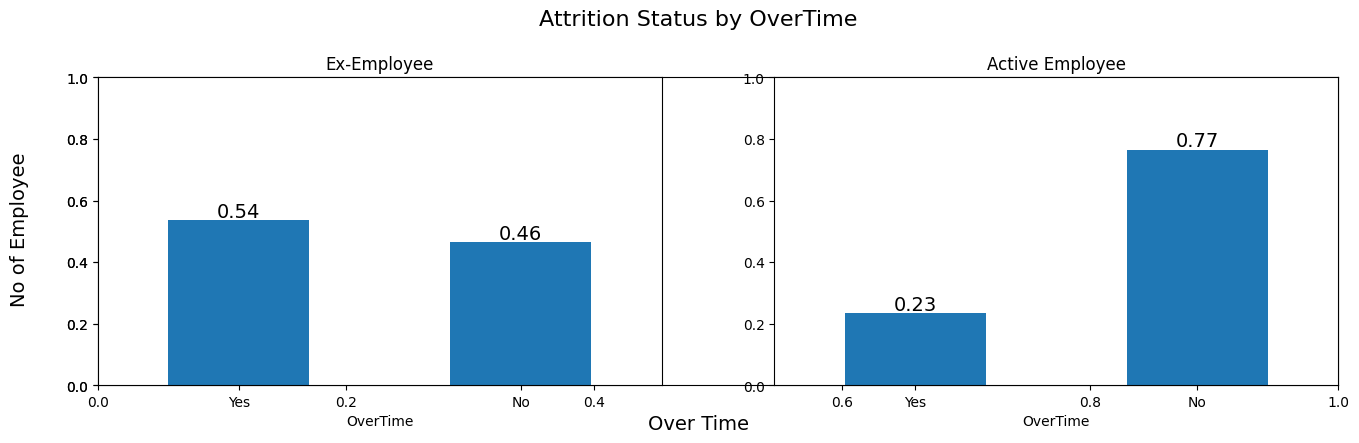

In [133]:
fig, axes = plt.subplots(figsize=(16,4))

plt.subplot(121)
g2 = df.loc[df['Attrition'] == 'Yes', 'OverTime'].value_counts(normalize=True).plot.bar(title= 'Ex-Employee', color="#1f77b4")
plt.xticks(rotation=0)
plt.ylim(0,1)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+0.01, "{:1.2f}".format(height), ha="center", fontsize=14) 
    
plt.subplot(122)
g2 = df.loc[df['Attrition'] == 'No', 'OverTime'].value_counts(normalize=True).reindex(["Yes", "No"]).plot.bar(title= 'Active Employee', color="#1f77b4")
plt.xticks(rotation=0)
plt.ylim(0,1)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+0.01, "{:1.2f}".format(height), ha="center", fontsize=14) 

# set title and axis labels
plt.suptitle('Attrition Status by OverTime', x=0.5, y=1.05, ha="center", fontsize=16)
fig.text(0.5, 0.001, 'Over Time', ha='center', fontsize=14)
fig.text(0.07, 0.5, 'No of Employee', va='center', rotation='vertical', fontsize=14)

# plt.savefig("ot_hist_2.png", bbox_inches="tight")
plt.show()

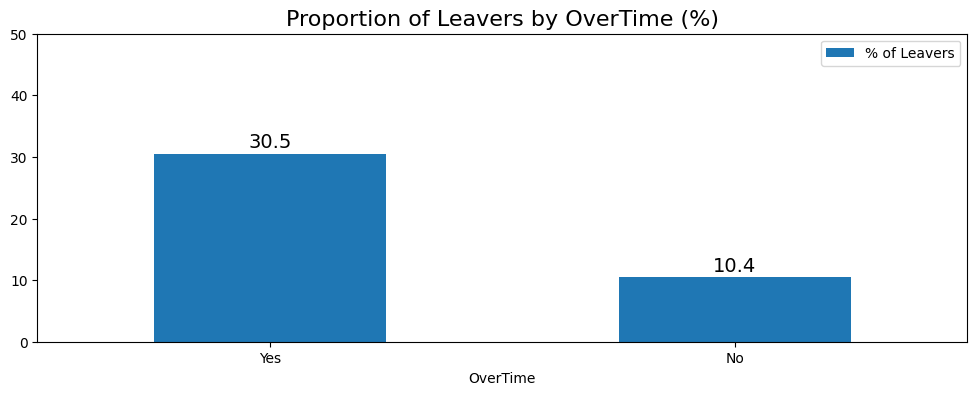

In [134]:
df_OverTime = pd.DataFrame(columns=["OverTime", "% of Leavers"])
i=0
for field in list(df['OverTime'].unique()):
    ratio = df[(df['OverTime']==field)&(df['Attrition']=="Yes")].shape[0] / df[df['OverTime']==field].shape[0]
    df_OverTime.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_OT = df_OverTime.groupby(by="OverTime").sum()
g = df_OT.sort_values(by=['% of Leavers'], ascending=False).plot(kind='bar', figsize=(12,4))
plt.ylim(0,50)
plt.title("Proportion of Leavers by OverTime (%)",  fontsize=16)
plt.xticks(rotation=0)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2., height+1, "{:1.1f}".format(height), ha="center", fontsize=14) 

# plt.savefig("ot_hist_3.png", bbox_inches="tight")
plt.show()

C:\Users\VivekG\AppData\Local\Temp\ipykernel_27296\2606926319.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_2.index.tolist(), y=value_2.values,palette=["#D4A1E7","#E7A1A1"])


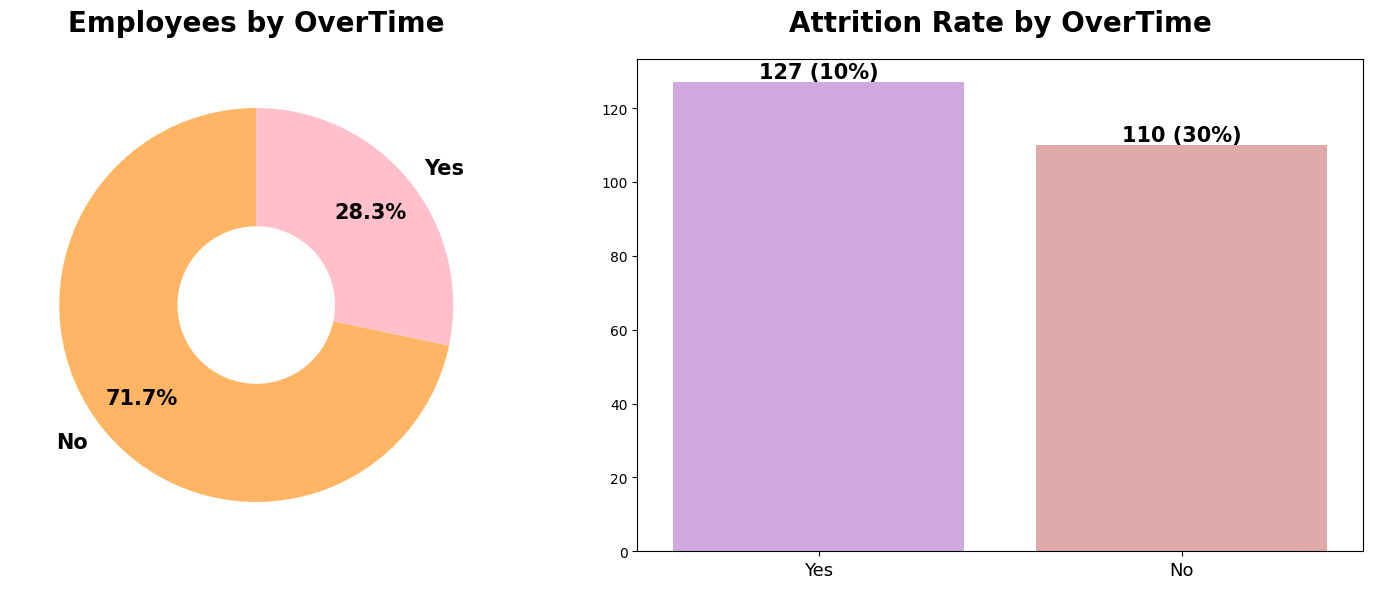

In [135]:
#Visualization to show Total Employees by OverTime.
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
value_1 = df["OverTime"].value_counts()
plt.title("Employees by OverTime", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%",pctdistance=0.75,startangle=90,
        colors=["#ffb563","#FFC0CB"],textprops={"fontweight":"black","size":15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

    
#Visualization to show Attrition Rate by OverTime.
plt.subplot(1,2,2)
new_df = df[df["Attrition"]=="Yes"]
value_2 = new_df["OverTime"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index.tolist(), y=value_2.values,palette=["#D4A1E7","#E7A1A1"])
plt.title("Attrition Rate by OverTime",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(int(attrition_rate[index]))+"%)",ha="center",va="bottom",
             size=15,fontweight="black")
plt.xticks(size=13)
plt.tight_layout()
plt.show()

## Inference:

    1.Most of the employees doesn't work for OverTime.
    2.The feature OverTime is having a very high class imbalance due to which,can't make any meaningful insights.
    3.Some employees have overtime commitments. The data clearly show that there is significant larger portion of 
      employees with OT that have left the company.  
   

## Salary Hike

In [136]:
# breakdown by Percent Salary Hike
df['PercentSalaryHike'].value_counts()

PercentSalaryHike
11    210
13    209
14    201
12    198
15    101
18     89
17     82
16     78
19     76
22     56
20     55
21     48
23     28
24     21
25     18
Name: count, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, '24.0'),
  Text(1, 0, '22.0'),
  Text(2, 0, '23.0'),
  Text(3, 0, '11.0'),
  Text(4, 0, '16.0'),
  Text(5, 0, '15.0'),
  Text(6, 0, '17.0'),
  Text(7, 0, '12.0'),
  Text(8, 0, '13.0'),
  Text(9, 0, '18.0'),
  Text(10, 0, '20.0'),
  Text(11, 0, '14.0'),
  Text(12, 0, '19.0'),
  Text(13, 0, '21.0'),
  Text(14, 0, '25.0')])

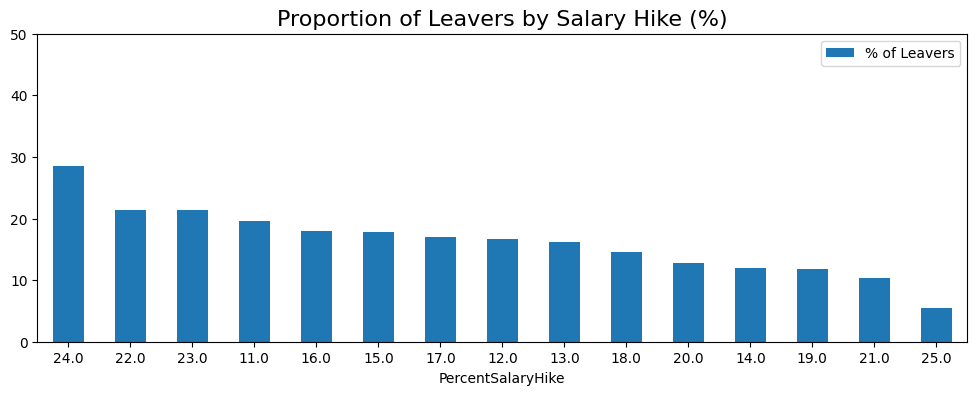

In [137]:
df_PercentSalaryHike = pd.DataFrame(columns=["PercentSalaryHike", "% of Leavers"])
i = 0

for field in sorted(df['PercentSalaryHike'].unique()):
    total = df[df['PercentSalaryHike'] == field].shape[0]
    leavers = df[(df['PercentSalaryHike'] == field) & (df['Attrition'] == "Yes")].shape[0]
    
    ratio = (leavers / total) if total != 0 else 0

    df_PercentSalaryHike.loc[i] = (field, ratio * 100)
    i += 1

# Group and plot
df_SH = df_PercentSalaryHike.groupby(by="PercentSalaryHike").sum()
g = df_SH.sort_values(by=['% of Leavers'], ascending=False).plot(kind='bar', figsize=(12, 4))

plt.ylim(0, 50)
plt.title("Proportion of Leavers by Salary Hike (%)", fontsize=16)
plt.xticks(rotation=0)

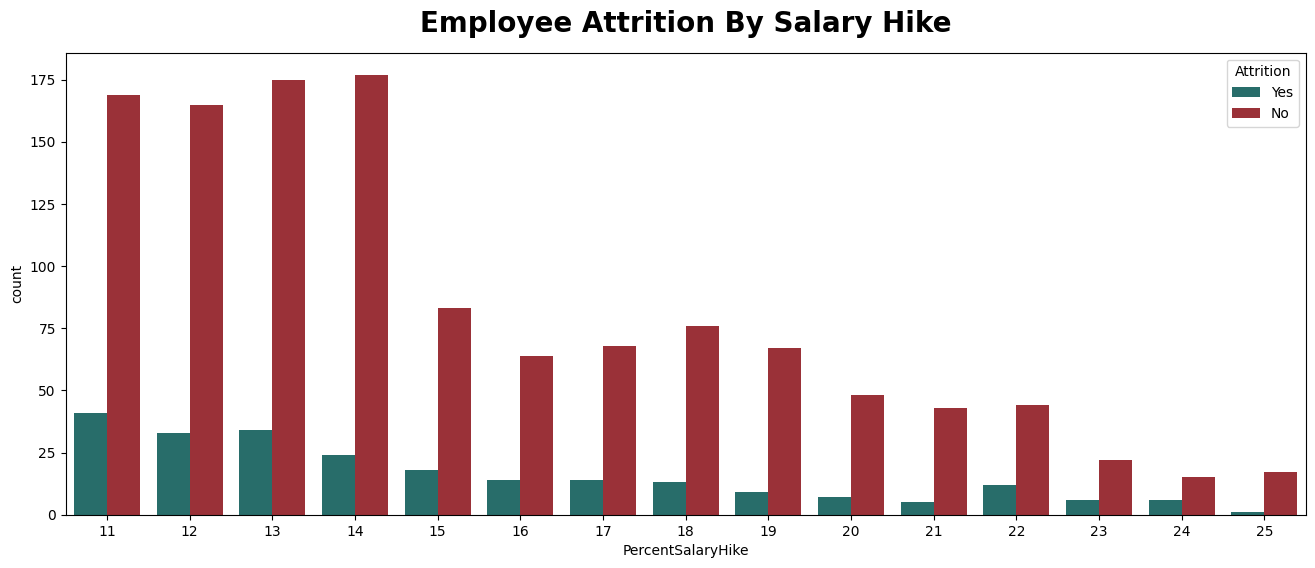

In [138]:
#Visualization to show Employee Distribution by Percentage Salary Hike.
plt.figure(figsize=(16,6))
sns.countplot(x="PercentSalaryHike", hue="Attrition", data=df, palette=["#1d7874","#AC1F29"])
plt.title("Employee Attrition By Salary Hike",fontweight="black",size=20,pad=15)
plt.show()

## Inference:
    1.Very Few employees are getting a high percent salary hike.
    2.As the amount of percent salary increases the attrition rate decreases.

## Performance Rating

In [139]:
# breakdown by Performance Rating
df['PerformanceRating'].value_counts()

PerformanceRating
3    1244
4     226
Name: count, dtype: int64

In [140]:
# Performance Rating of employees
df['PerformanceRating'].value_counts(normalize=True)

PerformanceRating
3    0.846259
4    0.153741
Name: proportion, dtype: float64

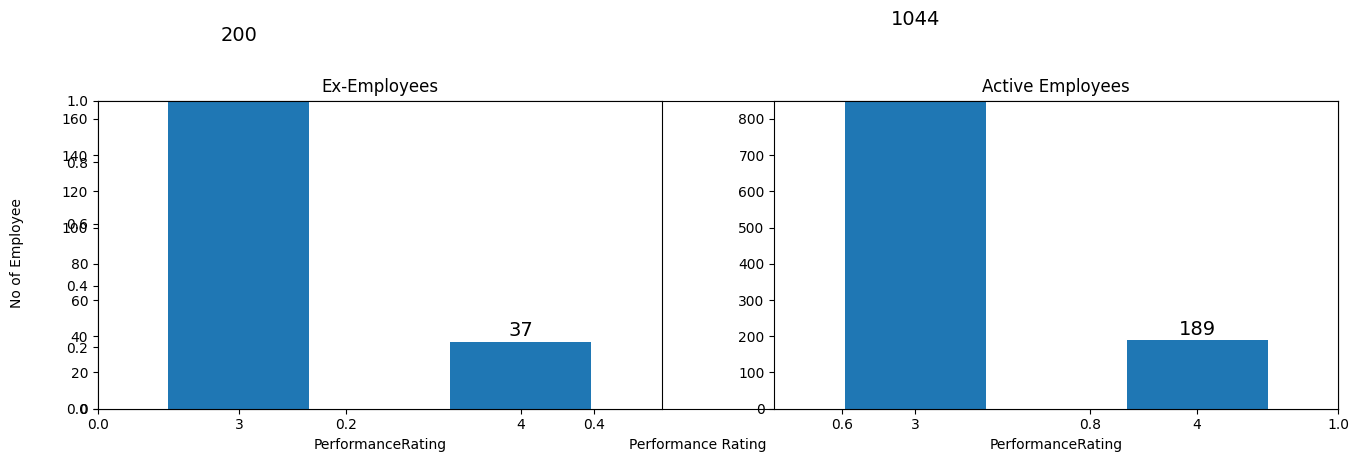

In [141]:
fig, axes = plt.subplots(figsize=(16,4))

plt.subplot(121)
g2 = df.loc[df['Attrition'] == 'Yes', 'PerformanceRating'].value_counts().plot.bar(title= 'Ex-Employees', color="#1f77b4")
plt.xticks(rotation=0)
plt.ylim(0,170)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+3, "{:1.0f}".format(height), ha="center", fontsize=14) 
    
plt.subplot(122)
g2 = df.loc[df['Attrition'] == 'No', 'PerformanceRating'].value_counts().plot.bar(title= 'Active Employees', color="#1f77b4")
plt.xticks(rotation=0)
plt.ylim(0,850)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+15, "{:1.0f}".format(height), ha="center", fontsize=14) 
    
fig.text(0.5, 0.01, 'Performance Rating', ha='center')
fig.text(0.07, 0.5, 'No of Employee', va='center', rotation='vertical')

# plt.savefig("Performance Rating.png", bbox_inches="tight")
plt.show()

C:\Users\VivekG\AppData\Local\Temp\ipykernel_27296\2466990636.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_2.index.tolist(),y= value_2.values,palette=["#D4A1E7","#E7A1A1"])


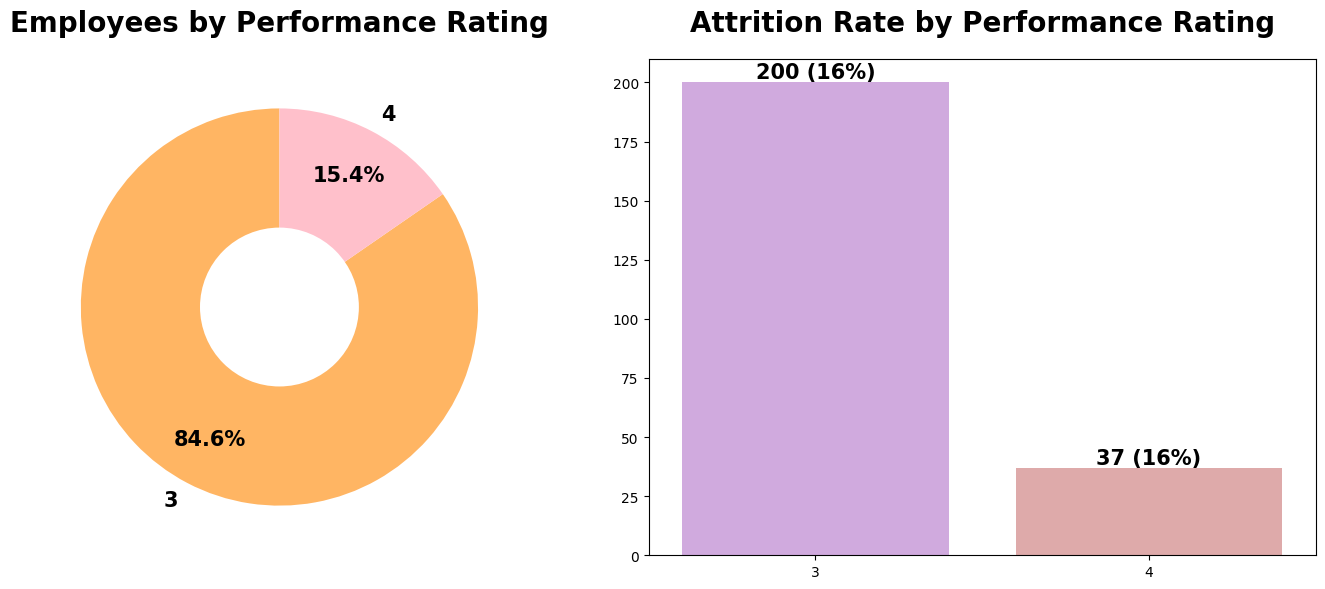

In [142]:
#Visualization to show Total Employees by PerformanceRating.
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
value_1 = df["PerformanceRating"].value_counts()
plt.title("Employees by Performance Rating", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%",pctdistance=0.75,startangle=90,
        colors=["#ffb563","#FFC0CB"],textprops={"fontweight":"black","size":15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
  
#Visualization to show Attrition Rate by PerformanceRating.
plt.subplot(1,2,2)
new_df = df[df["Attrition"]=="Yes"]
value_2 = new_df["PerformanceRating"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index.tolist(),y= value_2.values,palette=["#D4A1E7","#E7A1A1"])
plt.title("Attrition Rate by Performance Rating",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(int(attrition_rate[index]))+"%)",ha="center",va="bottom",
             size=15,fontweight="black")
plt.tight_layout()
plt.show()

## Inference:
    1.Most of the employees are having excellent performance rating.
    2.Both the categories in this field is having same attriton rate.
    3.That's why we can't generate any meaningful inisghts

### RELATIONSHIP SATISFACTION

In [143]:
# breakdown by Relationship Satisfaction
df['RelationshipSatisfaction'].value_counts()

RelationshipSatisfaction
3    459
4    432
2    303
1    276
Name: count, dtype: int64

In [144]:
# breakdown by Relationship Satisfaction
df['RelationshipSatisfaction'].value_counts(normalize=True)

RelationshipSatisfaction
3    0.312245
4    0.293878
2    0.206122
1    0.187755
Name: proportion, dtype: float64

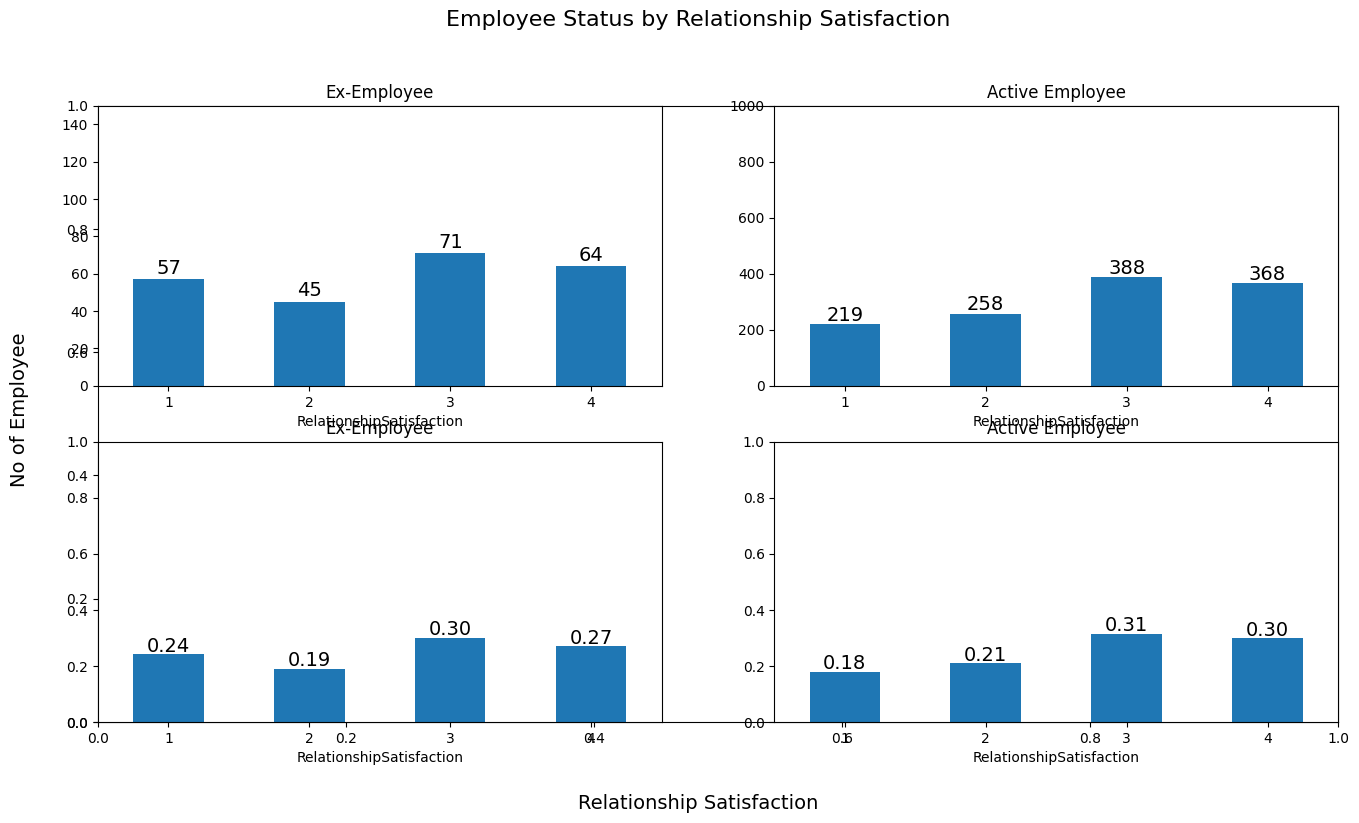

In [145]:
fig, axes = plt.subplots(figsize=(16,8))

plt.subplot(221)
g2 = df.loc[df['Attrition'] == 'Yes', 'RelationshipSatisfaction'].value_counts().reindex([1,2,3,4]).plot.bar(title= 'Ex-Employee', color="#1f77b4")
plt.xticks(rotation=0)
plt.ylim(0,150)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+3, "{:1.0f}".format(height), ha="center", fontsize=14) 

plt.subplot(222)
g2 = df.loc[df['Attrition'] == 'No', 'RelationshipSatisfaction'].value_counts().reindex([1,2,3,4]).plot.bar(title= 'Active Employee', color="#1f77b4")
plt.xticks(rotation=0)
plt.ylim(0,1000)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+12, "{:1.0f}".format(height), ha="center", fontsize=14) 


plt.subplot(223)
g2 = df.loc[df['Attrition'] == 'Yes', 'RelationshipSatisfaction'].value_counts(normalize=True).reindex([1,2,3,4]).plot.bar(title= 'Ex-Employee', color="#1f77b4")
plt.xticks(rotation=0)
plt.ylim(0,1)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+0.01, "{:1.2f}".format(height), ha="center", fontsize=14) 
    
plt.subplot(224)
g2 = df.loc[df['Attrition'] == 'No', 'RelationshipSatisfaction'].value_counts(normalize=True).reindex([1,2,3,4]).plot.bar(title= 'Active Employee', color="#1f77b4")
plt.xticks(rotation=0)
plt.ylim(0,1)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+0.01, "{:1.2f}".format(height), ha="center", fontsize=14) 

# set title and axis labels
plt.suptitle('Employee Status by Relationship Satisfaction', x=0.5, y=1, ha="center", fontsize=16)
fig.text(0.5, 0.001, 'Relationship Satisfaction', ha='center', fontsize=14)
fig.text(0.07, 0.5, 'No of Employee', va='center', rotation='vertical', fontsize=14)

# plt.savefig("RS_1.png", bbox_inches="tight")
plt.show()

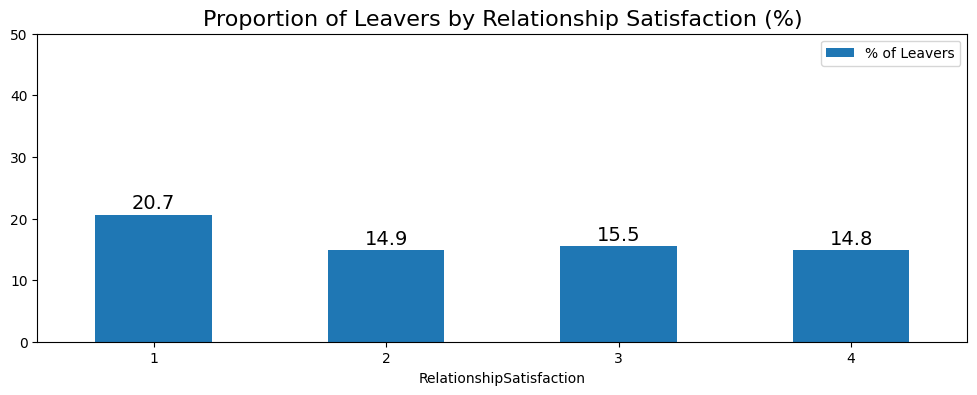

In [146]:
df_RelationshipSatisfaction = pd.DataFrame(columns=["RelationshipSatisfaction", "% of Leavers"])
i=0
for field in list(df['RelationshipSatisfaction'].unique()):
    ratio = df[(df['RelationshipSatisfaction']==field)&(df['Attrition']=="Yes")].shape[0] / df[df['RelationshipSatisfaction']==field].shape[0]
    df_RelationshipSatisfaction.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_RS = df_RelationshipSatisfaction.groupby(by="RelationshipSatisfaction").sum()
g = df_RS.sort_values(by=['% of Leavers'], ascending=False).reindex([1,2,3,4]).plot(kind='bar', figsize=(12,4))
plt.ylim(0,50)
plt.title("Proportion of Leavers by Relationship Satisfaction (%)",  fontsize=16)
plt.xticks(rotation=0)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2., height+1, "{:1.1f}".format(height), ha="center", fontsize=14) 

# plt.savefig("RLS_hist_2.png", bbox_inches="tight")
plt.show()

C:\Users\VivekG\AppData\Local\Temp\ipykernel_27296\3657866628.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_2.index, y=value_2.values,order=value_2.index,palette=["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])
C:\Users\VivekG\AppData\Local\Temp\ipykernel_27296\3657866628.py:17: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(x=value_2.index, y=value_2.values,order=value_2.index,palette=["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])


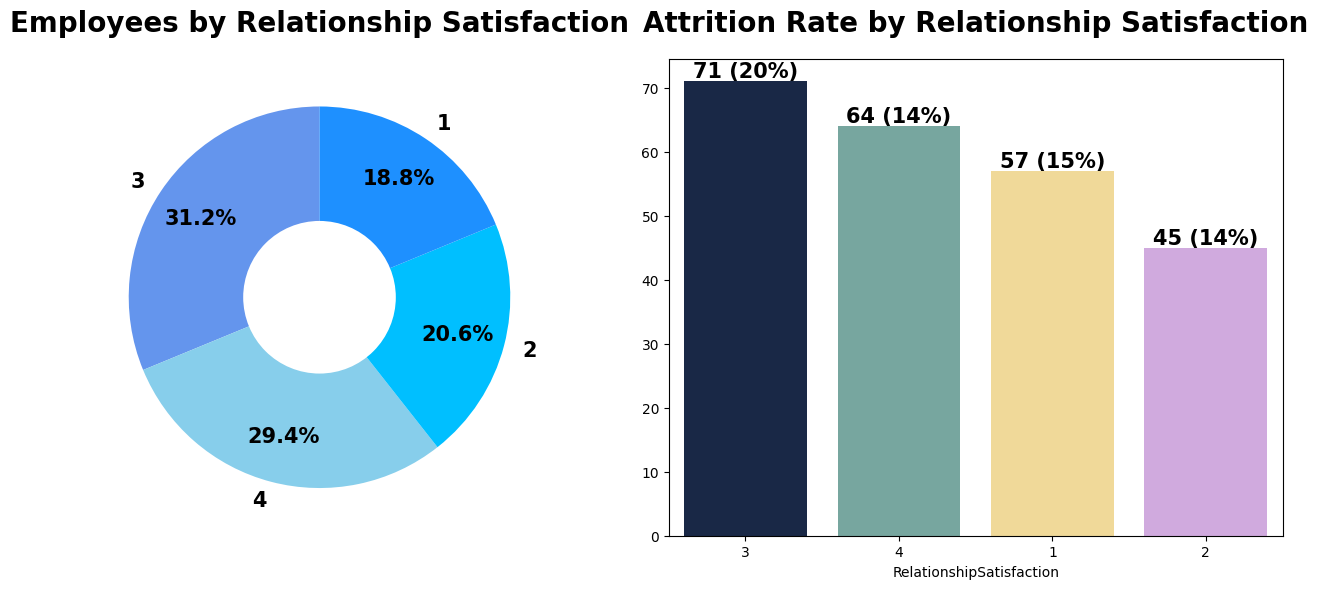

In [147]:
#Visualization to show Total Employees by RelationshipSatisfaction.
plt.figure(figsize=(13,6))
plt.subplot(1,2,1)
value_1 = df["RelationshipSatisfaction"].value_counts()
plt.title("Employees by Relationship Satisfaction", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%",pctdistance=0.75,startangle=90,
        colors=['#6495ED', '#87CEEB', '#00BFFF', '#1E90FF'],textprops={"fontweight":"black","size":15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
    
#Visualization to show Attrition Rate by RelationshipSatisfaction.
plt.subplot(1,2,2)
new_df = df[df["Attrition"]=="Yes"]
value_2 = new_df["RelationshipSatisfaction"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index, y=value_2.values,order=value_2.index,palette=["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])
plt.title("Attrition Rate by Relationship Satisfaction",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(int(attrition_rate[index]))+"%)",ha="center",va="bottom",
             size=15,fontweight="black")
plt.tight_layout()
plt.show()

## Inference:
    1.Most of the employees are having high or very high relationship satisfaction.
    2.Though the relationship satification is high there's a high attrition rate.
    3.All the categories in this feature is having a high attriton rate.

### Work-Life Balance Score


In [148]:
# breakdown by Work-Life Balance
df['WorkLifeBalance'].value_counts()

WorkLifeBalance
3    893
2    344
4    153
1     80
Name: count, dtype: int64

In [149]:
# breakdown by Work-Life Balance
df['WorkLifeBalance'].value_counts(normalize=True)

WorkLifeBalance
3    0.607483
2    0.234014
4    0.104082
1    0.054422
Name: proportion, dtype: float64

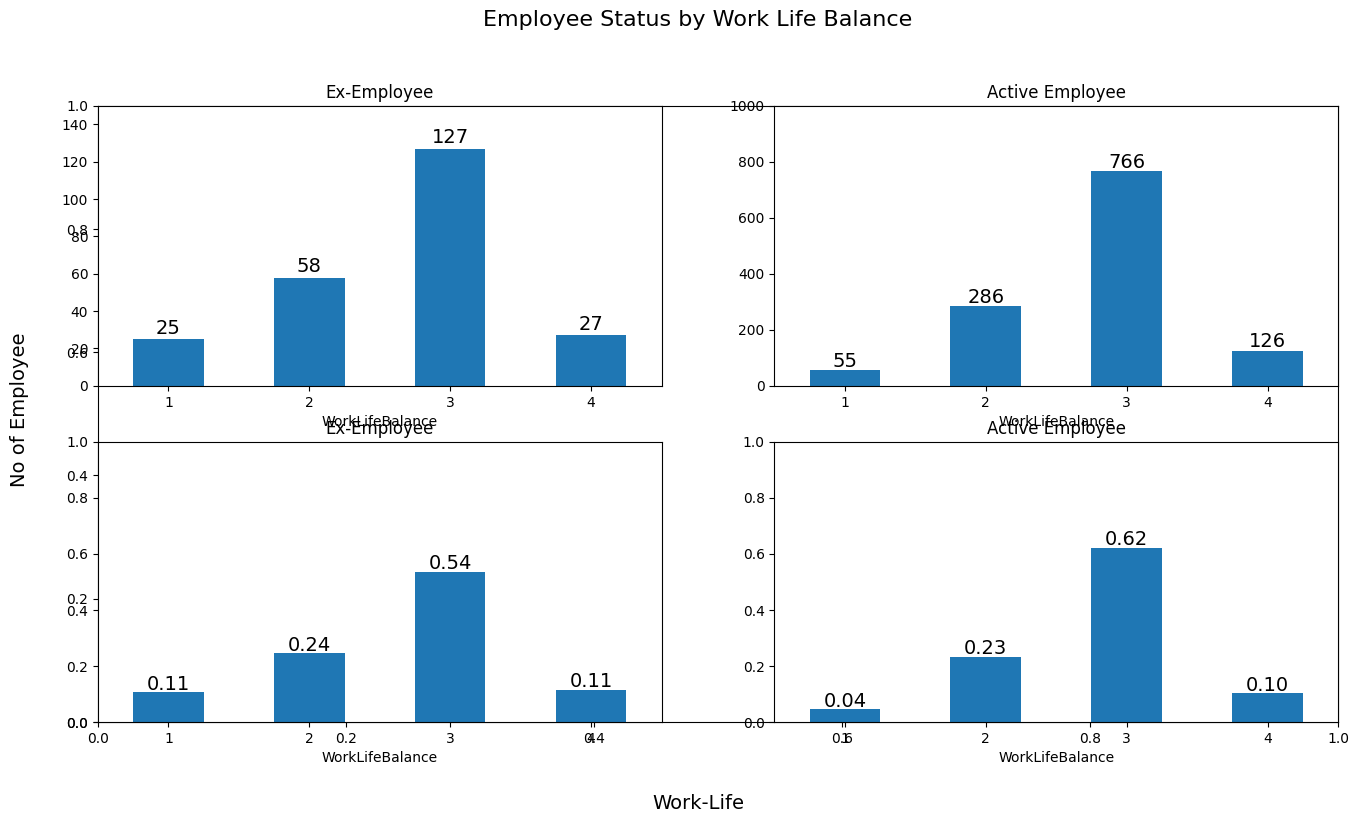

In [150]:
fig, axes = plt.subplots(figsize=(16,8))

plt.subplot(221)
g2 = df.loc[df['Attrition'] == 'Yes', 'WorkLifeBalance'].value_counts().reindex([1,2,3,4]).plot.bar(title= 'Ex-Employee', color="#1f77b4")
plt.xticks(rotation=0)
plt.ylim(0,150)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+3, "{:1.0f}".format(height), ha="center", fontsize=14) 

plt.subplot(222)
g2 = df.loc[df['Attrition'] == 'No', 'WorkLifeBalance'].value_counts().reindex([1,2,3,4]).plot.bar(title= 'Active Employee', color="#1f77b4")
plt.xticks(rotation=0)
plt.ylim(0,1000)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+12, "{:1.0f}".format(height), ha="center", fontsize=14) 


plt.subplot(223)
g2 = df.loc[df['Attrition'] == 'Yes', 'WorkLifeBalance'].value_counts(normalize=True).reindex([1,2,3,4]).plot.bar(title= 'Ex-Employee', color="#1f77b4")
plt.xticks(rotation=0)
plt.ylim(0,1)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+0.01, "{:1.2f}".format(height), ha="center", fontsize=14) 
    
plt.subplot(224)
g2 = df.loc[df['Attrition'] == 'No', 'WorkLifeBalance'].value_counts(normalize=True).reindex([1,2,3,4]).plot.bar(title= 'Active Employee', color="#1f77b4")
plt.xticks(rotation=0)
plt.ylim(0,1)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+0.01, "{:1.2f}".format(height), ha="center", fontsize=14) 

# set title and axis labels
plt.suptitle('Employee Status by Work Life Balance', x=0.5, y=1, ha="center", fontsize=16)
fig.text(0.5, 0.001, 'Work-Life', ha='center', fontsize=14)
fig.text(0.07, 0.5, 'No of Employee', va='center', rotation='vertical', fontsize=14)

# plt.savefig("wlb_hist_1.png", bbox_inches="tight")
plt.show()

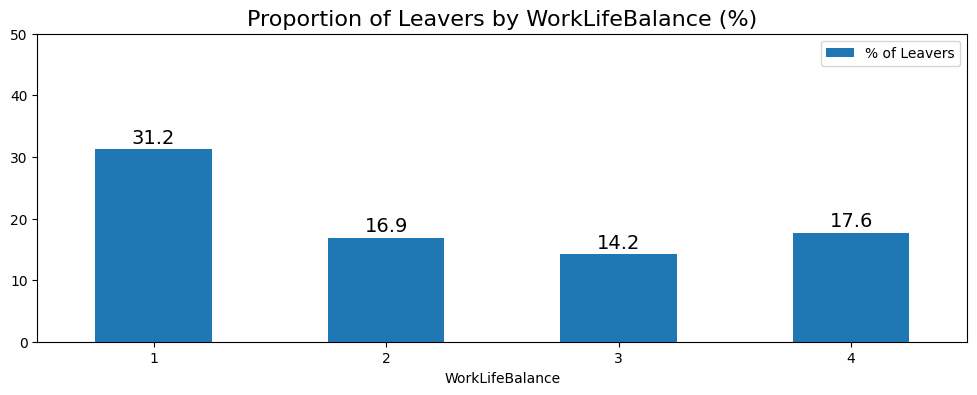

In [151]:
df_WorkLifeBalance = pd.DataFrame(columns=["WorkLifeBalance", "% of Leavers"])
i=0
for field in list(df['WorkLifeBalance'].unique()):
    ratio = df[(df['WorkLifeBalance']==field)&(df['Attrition']=="Yes")].shape[0] / df[df['WorkLifeBalance']==field].shape[0]
    df_WorkLifeBalance.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_WLB = df_WorkLifeBalance.groupby(by="WorkLifeBalance").sum()
g = df_WLB.sort_values(by=['% of Leavers'], ascending=False).reindex([1,2,3,4]).plot(kind='bar', figsize=(12,4))
plt.ylim(0,50)
plt.title("Proportion of Leavers by WorkLifeBalance (%)",  fontsize=16)
plt.xticks(rotation=0)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2., height+1, "{:1.1f}".format(height), ha="center", fontsize=14) 

# plt.savefig("wlb_hist_2.png", bbox_inches="tight")
plt.show()

C:\Users\VivekG\AppData\Local\Temp\ipykernel_27296\3965350707.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_2.index, y=value_2.values,order=value_2.index,palette=["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])
C:\Users\VivekG\AppData\Local\Temp\ipykernel_27296\3965350707.py:17: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(x=value_2.index, y=value_2.values,order=value_2.index,palette=["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])


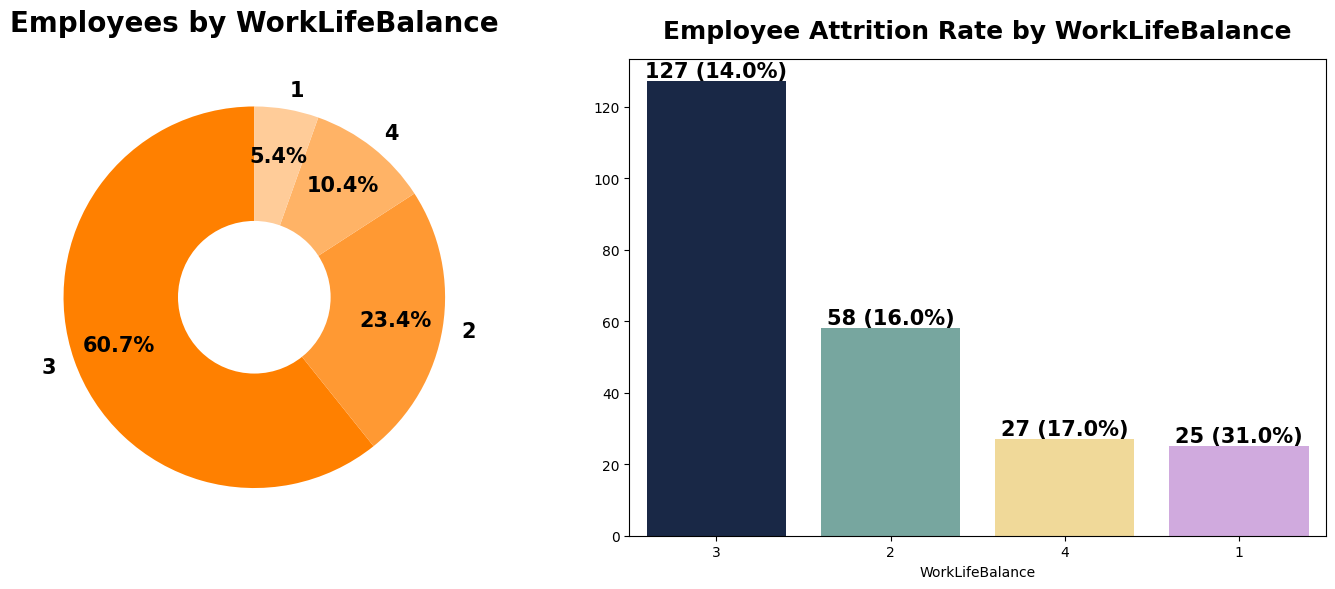

In [152]:
##Visualization to show Total Employees by WorkLifeBalance.
plt.figure(figsize=(14.5,6))
plt.subplot(1,2,1)
value_1 = df["WorkLifeBalance"].value_counts()
plt.title("Employees by WorkLifeBalance", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%",pctdistance=0.75,startangle=90,
        colors= ['#FF8000', '#FF9933', '#FFB366', '#FFCC99'],textprops={"fontweight":"black","size":15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

#Visualization to show Attrition Rate by WorkLifeBalance.
plt.subplot(1,2,2)
new_df = df[df["Attrition"]=="Yes"]
value_2 = new_df["WorkLifeBalance"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index, y=value_2.values,order=value_2.index,palette=["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])
plt.title("Employee Attrition Rate by WorkLifeBalance",fontweight="black",pad=15,size=18)
for index,value in enumerate(value_2.values):
    plt.text(index,value, str(value)+" ("+str(attrition_rate[index])+"%)",ha="center",va="bottom",
             fontweight="black",size=15)
plt.tight_layout()
plt.show()

### Inference:
    A feature related to "Work-Life Balance" was captured as: 1 'Bad' 2 'Good' 3 'Better' 4 'Best'.
    The data indicates that the largest normalised proportion of Leavers had "Bad" Work-Life Balance.
    1.More than 60% of employees are having a better work life balance.
    2.Employees with Bad Work Life Balance is having Very High Attrition Rate.
    3.Other Categories is also having High attriton Rate.

### Monthly Income



In [153]:
# Monthly Income
print("Monthly Income for employees is from ${} to ${}.".format(df['MonthlyIncome'].min(), df['MonthlyIncome'].max()))

Monthly Income for employees is from $1009 to $19999.


In [154]:
# Ex-Employees
print("Ex-Employees:")
print("Average Monthly Income of Ex-Employees = ${:1.2f}".format(np.mean(df.loc[df['Attrition'] == 'Yes', 'MonthlyIncome'])))
print("Standard Deviation = ${:1.2f}".format(np.std(df.loc[df['Attrition'] == 'Yes', 'MonthlyIncome'])))

Ex-Employees:
Average Monthly Income of Ex-Employees = $4787.09
Standard Deviation = $3632.52


In [155]:
# Active Employees
print("Active Employees:")
print("Average Monthly Income of Active Employees = ${:1.2f}".format(np.mean(df.loc[df['Attrition'] == 'No', 'MonthlyIncome'])))
print("Standard Deviation = ${:1.2f}".format(np.std(df.loc[df['Attrition'] == 'No', 'MonthlyIncome'])))

Active Employees:
Average Monthly Income of Active Employees = $6832.74
Standard Deviation = $4816.25


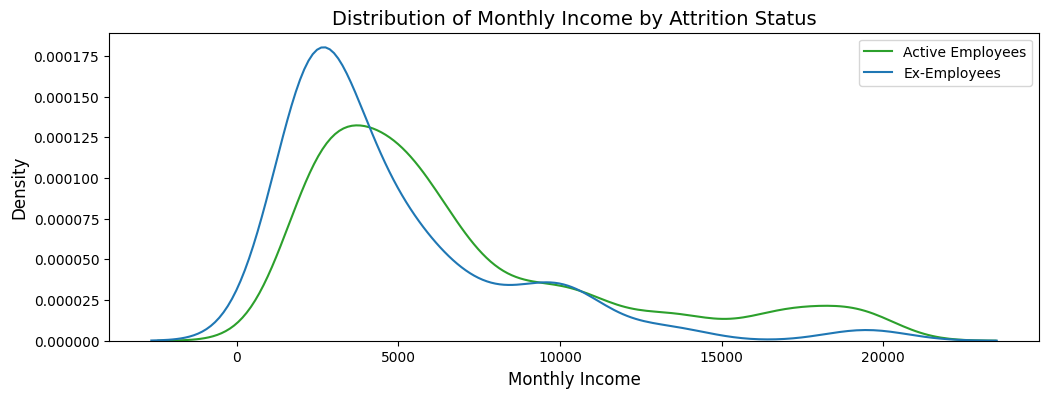

In [156]:
# kernel density estimation (KDE) plot 

plt.subplots(figsize=(12,4))

target_0 = df.loc[df["Attrition"] == "No"]
target_1 = df.loc[df["Attrition"] == "Yes"]

sns.kdeplot(data=target_0, x="MonthlyIncome", fill=False, label="Active Employees", color="#2ca02c")
sns.kdeplot(data=target_1, x="MonthlyIncome", fill=False, label="Ex-Employees", color="#1f77b4")

plt.legend()
plt.xlabel("Monthly Income", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.title("Distribution of Monthly Income by Attrition Status", fontsize=14)

# plt.savefig("income_kde_1.png", bbox_inches="tight")
plt.show()

You can get negative x-values ending up with some positive density from a kernel density estimate, simply because of the way KDEs work. Refer https://stats.stackexchange.com/questions/109549/negative-density-for-non-negative-variables and https://www.youtube.com/watch?v=R6_LR-f6Tt4

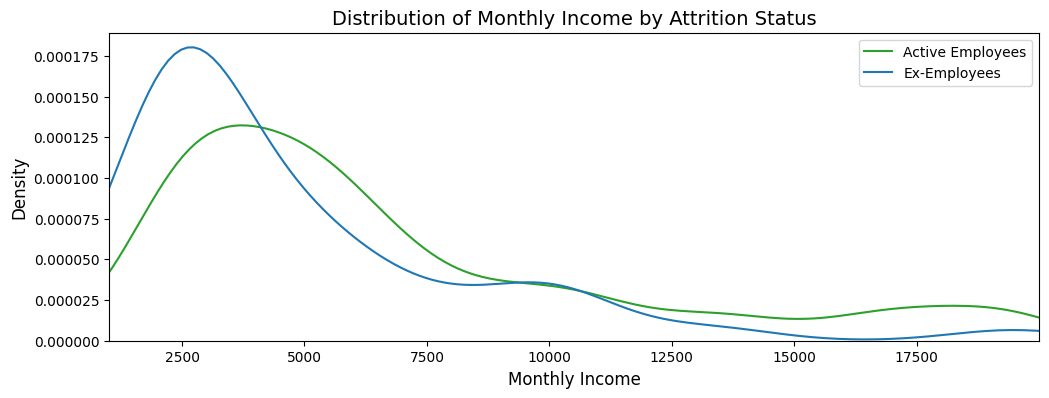

In [157]:
# kernel density estimation (KDE) plot 

plt.subplots(figsize=(12,4))

target_0 = df.loc[df["Attrition"] == "No"]
target_1 = df.loc[df["Attrition"] == "Yes"]

sns.kdeplot(data=target_0, x="MonthlyIncome", fill=False, label="Active Employees", color="#2ca02c")
sns.kdeplot(data=target_1, x="MonthlyIncome", fill=False, label="Ex-Employees", color="#1f77b4")
plt.legend()
plt.xlim(df["MonthlyIncome"].min(), df["MonthlyIncome"].max())  # By - MIN & MAX Value
plt.xlabel("Monthly Income", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.title("Distribution of Monthly Income by Attrition Status", fontsize=14)

# plt.savefig("income_kde_2.png", bbox_inches="tight")
plt.show()

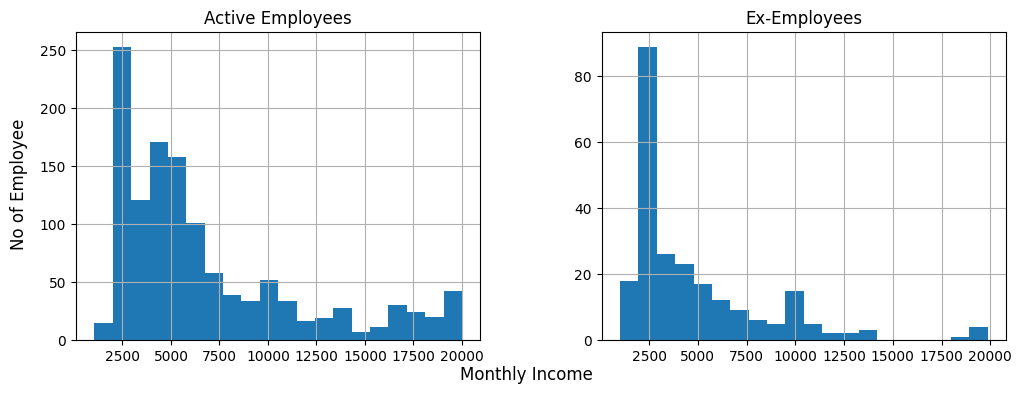

In [158]:
# plot histogram
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(12,4)

target_0[['MonthlyIncome']].hist(bins=20, ax=axes[0])
axes[0].set_title('Active Employees')

target_1[['MonthlyIncome']].hist(bins=20, ax=axes[1])
axes[1].set_title('Ex-Employees')

fig.text(0.5, 0.01, 'Monthly Income', ha='center', fontsize=12)
fig.text(0.07, 0.5, 'No of Employee', va='center', rotation='vertical', fontsize=12)

# plt.savefig("income_hist.png", bbox_inches="tight")
plt.show()

C:\Users\VivekG\AppData\Local\Temp\ipykernel_27296\3385474603.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Attrition",y="MonthlyIncome",data=df,palette=["#D4A1E7","#6faea4"])


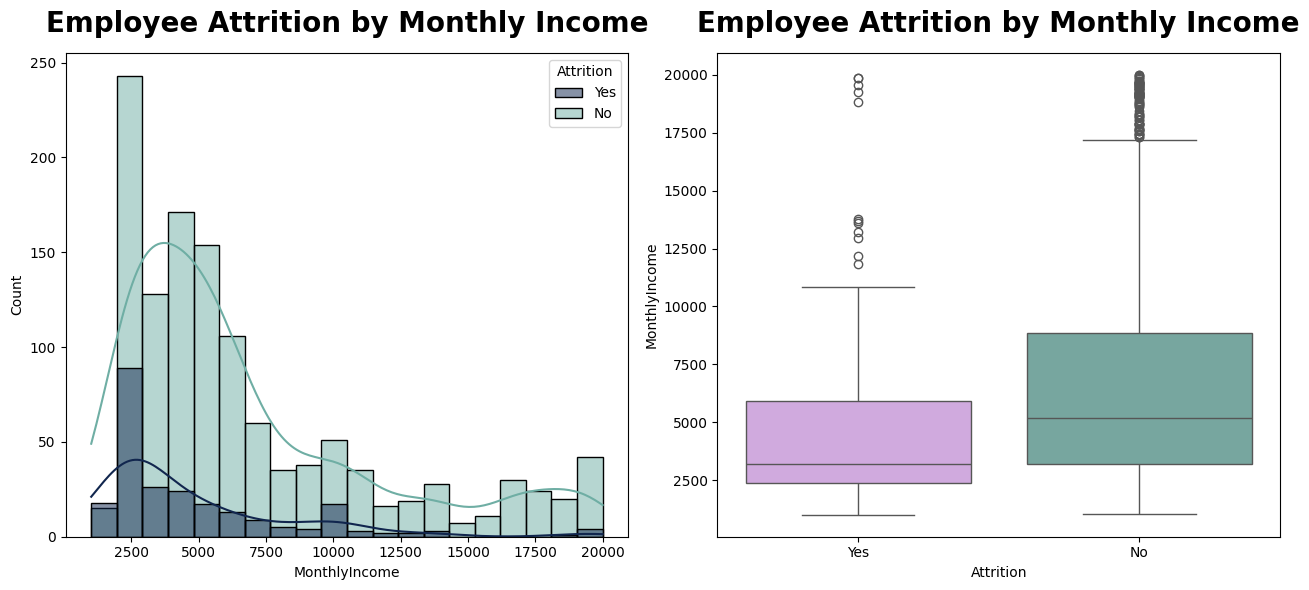

In [159]:
#Visualization to show Employee Distribution by MonthlyIncome.
plt.figure(figsize=(13,6))
plt.subplot(1,2,1)
sns.histplot(x="MonthlyIncome", hue="Attrition", kde=True ,data=df,palette=["#11264e","#6faea4"])
plt.title("Employee Attrition by Monthly Income",fontweight="black",size=20,pad=15)

#Visualization to show Employee Attrition by Monthly Income.
plt.subplot(1,2,2)
sns.boxplot(x="Attrition",y="MonthlyIncome",data=df,palette=["#D4A1E7","#6faea4"])
plt.title("Employee Attrition by Monthly Income",fontweight="black",size=20,pad=15)
plt.tight_layout()
plt.show()

### Inference:
    Employee Monthly Income varies from $1,009 to $19,999.
        1.Most of the employees are getting paid less than 10000 in the organiation.
        2.The average monthly income of employee who have left is comparatively low with employee who are still working.
        3.As the Monthly Income increases the attrition decreases.

## Number of Companies worked

In [160]:
# breakdown by NumCompaniesWorked
df['NumCompaniesWorked'].value_counts()

NumCompaniesWorked
1    521
0    197
3    159
2    146
4    139
7     74
6     70
5     63
9     52
8     49
Name: count, dtype: int64

In [161]:
df["NumCompaniesWorked"].describe().to_frame().T

count      mean       std  min  25%  50%  75%  max
NumCompaniesWorked  1470.0  2.693197  2.498009  0.0  1.0  2.0  4.0  9.0

In [162]:
# Define the bin edges for the groups
bin_edges = [0, 1, 3, 5, 10]

# Define the labels for the groups
bin_labels = ['0-1 Companies', '2-3 companies', '4-5 companies', "5+ companies"]

# Cut the DailyRate column into groups
df["NumCompaniesWorkedGroup"] = pd.cut(df['NumCompaniesWorked'], bins=bin_edges, labels=bin_labels)

C:\Users\VivekG\AppData\Local\Temp\ipykernel_27296\4269506190.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_2.index.tolist(), y=value_2.values,palette=["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])
C:\Users\VivekG\AppData\Local\Temp\ipykernel_27296\4269506190.py:17: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(x=value_2.index.tolist(), y=value_2.values,palette=["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])


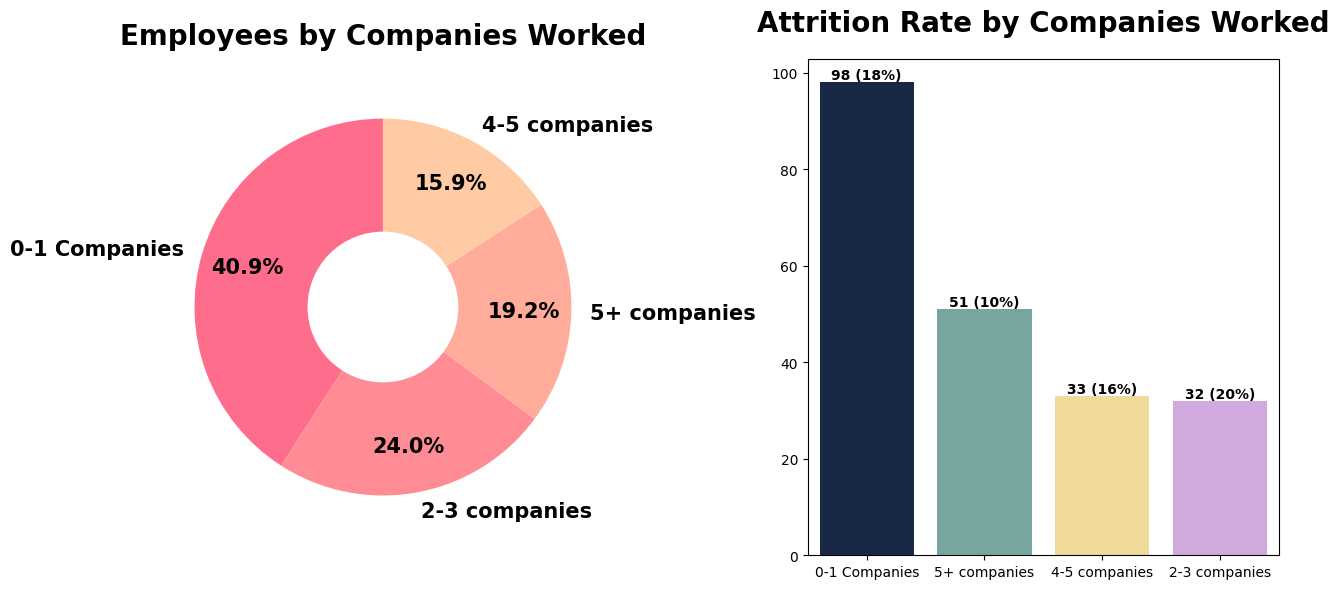

In [163]:
#Visualization to show Total Employees by NumCompaniesWorked.
plt.figure(figsize=(13,6))
plt.subplot(1,2,1)
value_1 = df["NumCompaniesWorkedGroup"].value_counts()
plt.title("Employees by Companies Worked", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%",pctdistance=0.75,startangle=90,
        colors=['#FF6D8C', '#FF8C94', '#FFAC9B', '#FFCBA4'],textprops={"fontweight":"black","size":15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
 
#Visualization to show Attrition Rate by NumCompaniesWorked.
plt.subplot(1,2,2)
new_df = df[df["Attrition"]=="Yes"]
value_2 = new_df["NumCompaniesWorkedGroup"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index.tolist(), y=value_2.values,palette=["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])
plt.title("Attrition Rate by Companies Worked",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(int(attrition_rate[index]))+"%)",ha="center",va="bottom",
             size=10,fontweight="black")
plt.xticks(size=10)
plt.tight_layout()
plt.show()

# Inference:
    1.Most of the employees have worked for less than 2 companies.
    2.There's a high attrition rate of employees who haved worked 2-5 number of companies.

### Target Variable: Attrition


In [164]:
# Attrition indicates if the employee is currently active ('No') or has left the company ('Yes')
df['Attrition'].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [165]:
# Attrition indicates if the employee is currently active ('No') or has left the company ('Yes')
df['Attrition'].value_counts(normalize=True)

Attrition
No     0.838776
Yes    0.161224
Name: proportion, dtype: float64

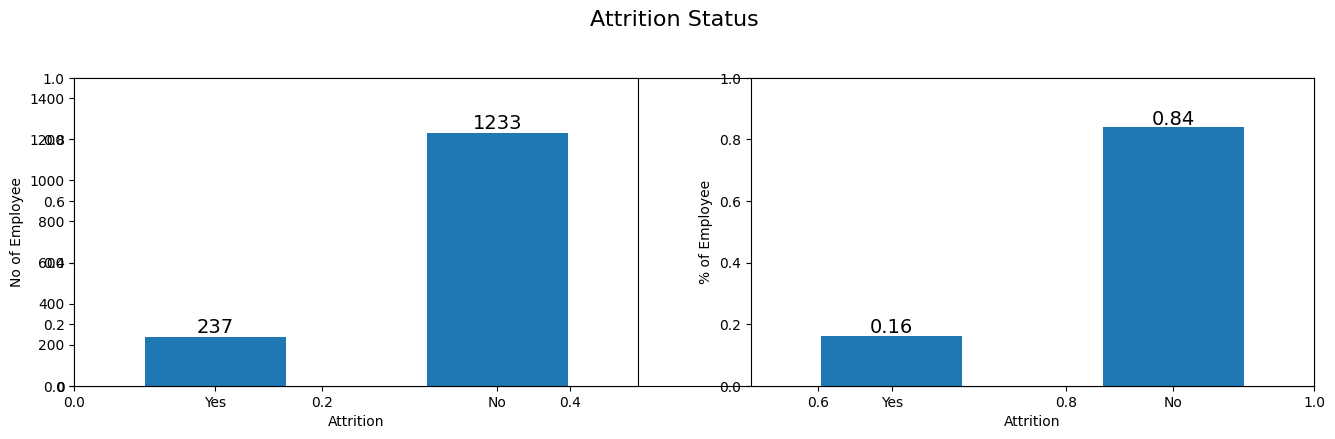

In [166]:
# df['Attrition'].value_counts().plot(kind='hist', xTitle='Attrition', yTitle='count', title='Attrition Distribution')

fig, axes = plt.subplots(figsize=(16,4))

plt.subplot(121)
g1 = df['Attrition'].value_counts().reindex(["Yes", "No"]).plot.bar(color="#1f77b4")
plt.xticks(rotation=0)
plt.ylabel("No of Employee")
plt.ylim(0,1500)
for p in g1.patches:
    height = p.get_height()
    g1.text(p.get_x()+p.get_width()/2., height+20, "{:1.0f}".format(height), ha="center", fontsize=14) 
    
plt.subplot(122)
g2 = df['Attrition'].value_counts(normalize=True).reindex(["Yes", "No"]).plot.bar( color="#1f77b4")
plt.xticks(rotation=0)
plt.ylabel("% of Employee")
plt.ylim(0,1)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+0.01, "{:1.2f}".format(height), ha="center", fontsize=14) 
    
# set title and axis labels
plt.suptitle("Attrition Status", x=0.5, y=1.05, ha="center", fontsize=16)
# fig.text(0.5, 0.001, 'Attrition Status', ha='center', fontsize=14)
# fig.text(0.07, 0.5, 'No of Employee', va='center', rotation='vertical', fontsize=14)

# plt.savefig("att_hist_1.png", bbox_inches="tight")
plt.show()

### Correlation
Let's take a look at some of most significant correlations. It is worth remembering that correlation coefficients only measure linear correlations.

In [167]:
df_corr = df.copy()
df_corr['Target'] = df_corr['Attrition'].apply(lambda x: 0 if x == 'No' else 1)
df_corr = df_corr.drop(['Attrition', 'EmployeeCount', 'EmployeeNumber', 'StandardHours', 'Over18'], axis=1)

# Convert categorical columns to dummy variables
df_corr_encoded = pd.get_dummies(df_corr, drop_first=True)

correlations = df_corr_encoded.corr()['Target'].sort_values()

print('Most Positive Correlations: \n', correlations.tail(5))
print('\nMost Negative Correlations: \n', correlations.head(5))

Most Positive Correlations: 
 BusinessTravel_Travel_Frequently    0.115143
JobRole_Sales Representative        0.157234
MaritalStatus_Single                0.175419
OverTime_Yes                        0.246118
Target                              1.000000
Name: Target, dtype: float64

Most Negative Correlations: 
 TotalWorkingYears    -0.171063
JobLevel             -0.169105
YearsInCurrentRole   -0.160545
MonthlyIncome        -0.159840
Age                  -0.159205
Name: Target, dtype: float64


In [168]:
df_corr = df.copy()
df_corr['Target'] = df_corr['Attrition'].apply(lambda x: 0 if x == 'No' else 1)
df_corr = df_corr.drop(['Attrition', 'EmployeeCount', 'EmployeeNumber', 'StandardHours', 'Over18'], axis=1)

# Convert categorical columns to dummy variables
df_corr_encoded = pd.get_dummies(df_corr, drop_first=True)

correlations = df_corr_encoded.corr()['Target'].sort_values()

print('Most Positive Correlations: \n', correlations.tail(5))
print('\nMost Negative Correlations: \n', correlations.head(5))

Most Positive Correlations: 
 BusinessTravel_Travel_Frequently    0.115143
JobRole_Sales Representative        0.157234
MaritalStatus_Single                0.175419
OverTime_Yes                        0.246118
Target                              1.000000
Name: Target, dtype: float64

Most Negative Correlations: 
 TotalWorkingYears    -0.171063
JobLevel             -0.169105
YearsInCurrentRole   -0.160545
MonthlyIncome        -0.159840
Age                  -0.159205
Name: Target, dtype: float64


In [169]:
# compute the correlation matrix
# Make a copy and add the target variable
df_corr = df.copy()
df_corr['Target'] = df_corr['Attrition'].apply(lambda x: 0 if x == 'No' else 1)

# Drop unnecessary columns
df_corr = df_corr.drop(['Attrition', 'EmployeeCount', 'EmployeeNumber', 'StandardHours', 'Over18'], axis=1)

# Select only numeric columns
df_corr_numeric = df_corr.select_dtypes(include=['number'])

# Compute the correlation matrix
corr = df_corr_numeric.corr()

# Show correlation matrix
corr

Age  DailyRate  DistanceFromHome  Education  \
Age                       1.000000   0.010661         -0.001686   0.208034   
DailyRate                 0.010661   1.000000         -0.004985  -0.016806   
DistanceFromHome         -0.001686  -0.004985          1.000000   0.021042   
Education                 0.208034  -0.016806          0.021042   1.000000   
EnvironmentSatisfaction   0.010146   0.018355         -0.016075  -0.027128   
HourlyRate                0.024287   0.023381          0.031131   0.016775   
JobInvolvement            0.029820   0.046135          0.008783   0.042438   
JobLevel                  0.509604   0.002966          0.005303   0.101589   
JobSatisfaction          -0.004892   0.030571         -0.003669  -0.011296   
MonthlyIncome             0.497855   0.007707         -0.017014   0.094961   
MonthlyRate               0.028051  -0.032182          0.027473  -0.026084   
NumCompaniesWorked        0.299635   0.038153         -0.029251   0.126317   
PercentSalaryHike         0.003634   0.022704          0.040235  -0.011111   
PerformanceRating         0.001904   0.000473          0.027110  -0.024539   
RelationshipSatisfaction  0.053535   0.007846          0.006557  -0.009118   
StockOptionLevel          0.037510   0.042143          0.044872   0.018422   
TotalWorkingYears         0.680381   0.014515          0.004628   0.148280   
TrainingTimesLastYear    -0.019621   0.002453         -0.036942  -0.025100   
WorkLifeBalance          -0.021490  -0.037848         -0.026556   0.009819   
YearsAtCompany            0.311309  -0.034055          0.009508   0.069114   
YearsInCurrentRole        0.212901   0.009932          0.018845   0.060236   
YearsSinceLastPromotion   0.216513  -0.033229          0.010029   0.054254   
YearsWithCurrManager      0.202089  -0.026363          0.014406   0.069065   
Target                   -0.159205  -0.056652          0.077924  -0.031373   

                          EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
Age                                      0.010146    0.024287        0.029820   
DailyRate                                0.018355    0.023381        0.046135   
DistanceFromHome                        -0.016075    0.031131        0.008783   
Education                               -0.027128    0.016775        0.042438   
EnvironmentSatisfaction                  1.000000   -0.049857       -0.008278   
HourlyRate                              -0.049857    1.000000        0.042861   
JobInvolvement                          -0.008278    0.042861        1.000000   
JobLevel                                 0.001212   -0.027853       -0.012630   
JobSatisfaction                         -0.006784   -0.071335       -0.021476   
MonthlyIncome                           -0.006259   -0.015794       -0.015271   
MonthlyRate                              0.037600   -0.015297       -0.016322   
NumCompaniesWorked                       0.012594    0.022157        0.015012   
PercentSalaryHike                       -0.031701   -0.009062       -0.017205   
PerformanceRating                       -0.029548   -0.002172       -0.029071   
RelationshipSatisfaction                 0.007665    0.001330        0.034297   
StockOptionLevel                         0.003432    0.050263        0.021523   
TotalWorkingYears                       -0.002693   -0.002334       -0.005533   
TrainingTimesLastYear                   -0.019359   -0.008548       -0.015338   
WorkLifeBalance                          0.027627   -0.004607       -0.014617   
YearsAtCompany                           0.001458   -0.019582       -0.021355   
YearsInCurrentRole                       0.018007   -0.024106        0.008717   
YearsSinceLastPromotion                  0.016194   -0.026716       -0.024184   
YearsWithCurrManager                    -0.004999   -0.020123        0.025976   
Target                                  -0.103369   -0.006846       -0.130016   

                          JobLevel  JobSatisfaction  M

## NOTE :
As per the Correlation Matrix & heatmap it shows that Features like Monthly income,Performance Rating, TotalWorkingYears are highly correlation with the target variable(Attrition). Which is true because usually all these factors are the key reasons for employees turnover in the organisation.

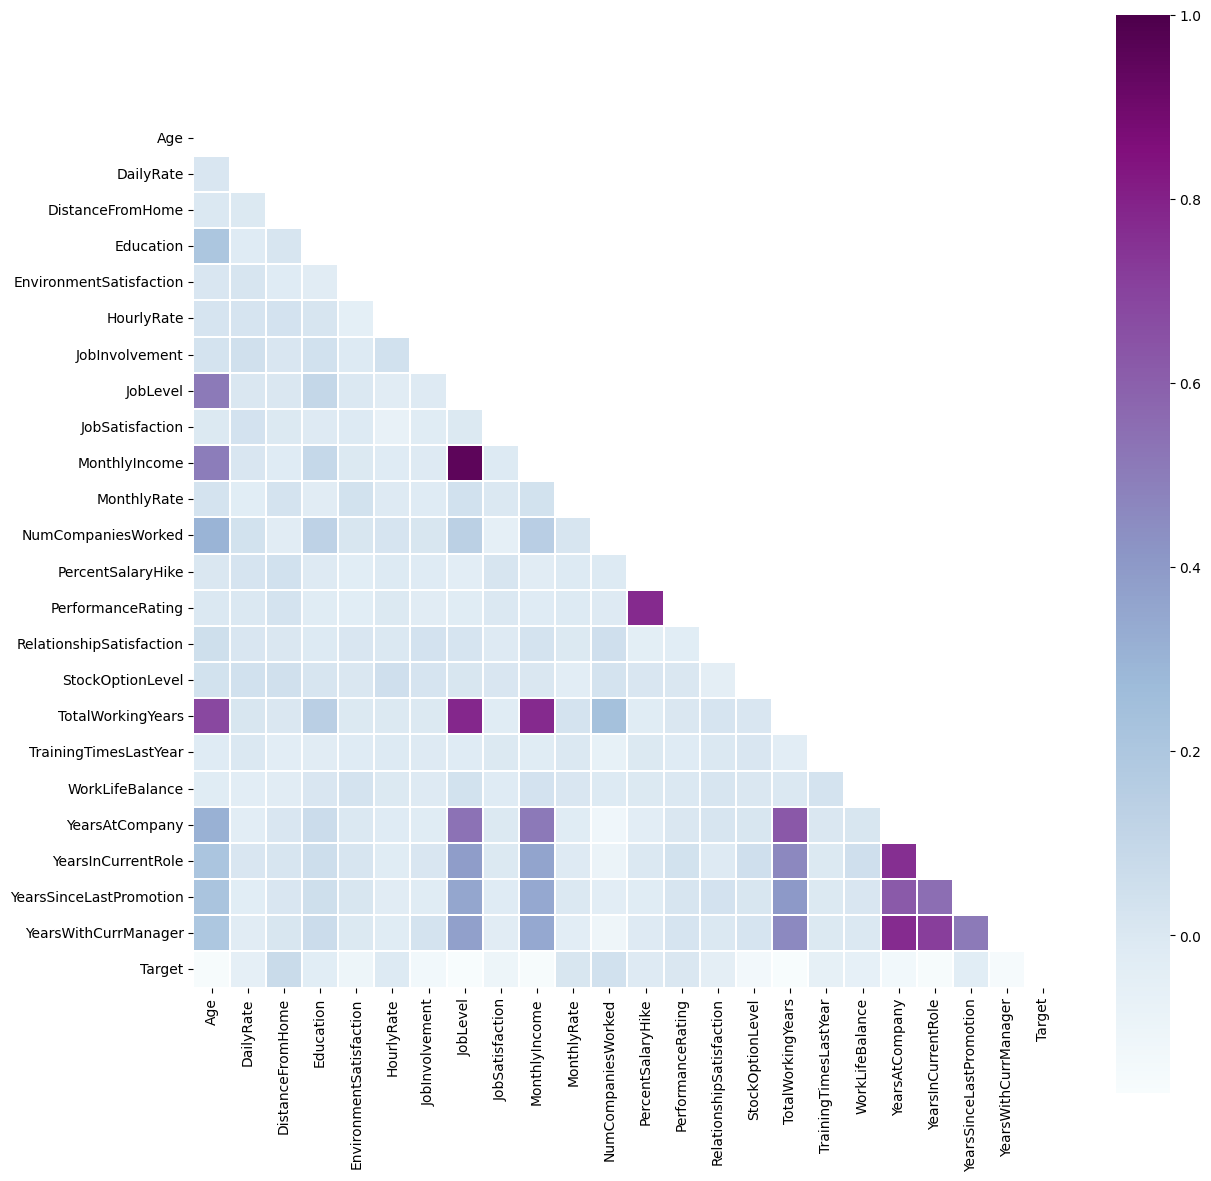

In [170]:
# set figure size
plt.figure(figsize=(14, 14))

# generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig = sns.heatmap(corr, vmax=1, square=True, cmap="BuPu", linewidths=.1, annot=False, mask=mask)

# fig.get_figure().savefig("corr_heatmap.png", bbox_inches="tight") 
plt.show()

C:\Users\VivekG\AppData\Local\Temp\ipykernel_27296\1958263048.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attrition_rate.index,y=attrition_rate.values,palette=["#1d7874","#8B0000"])


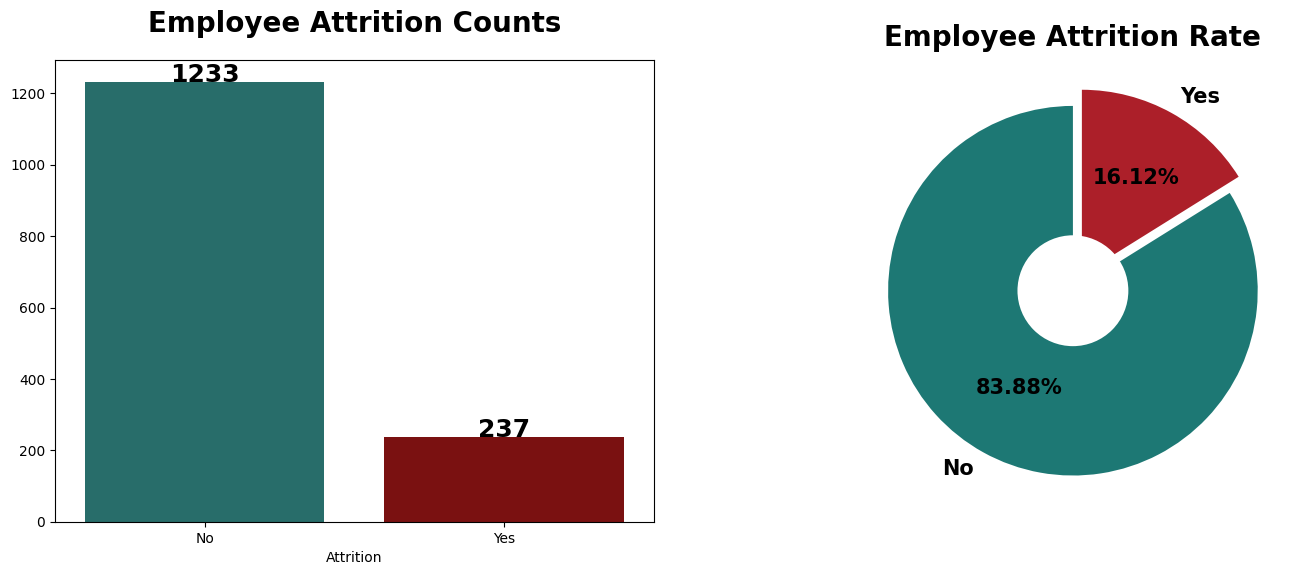

In [171]:
#Visualization to show Employee Attrition in Counts.
plt.figure(figsize=(17,6))
plt.subplot(1,2,1)
attrition_rate = df["Attrition"].value_counts()
sns.barplot(x=attrition_rate.index,y=attrition_rate.values,palette=["#1d7874","#8B0000"])
plt.title("Employee Attrition Counts",fontweight="black",size=20,pad=20)
for i, v in enumerate(attrition_rate.values):
    plt.text(i, v, v,ha="center", fontweight='black', fontsize=18)

#Visualization to show Employee Attrition in Percentage.
plt.subplot(1,2,2)
plt.pie(attrition_rate, labels=["No","Yes"], autopct="%.2f%%", textprops={"fontweight":"black","size":15},
        colors = ["#1d7874","#AC1F29"],explode=[0,0.1],startangle=90)
center_circle = plt.Circle((0, 0), 0.3, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
plt.title("Employee Attrition Rate",fontweight="black",size=20,pad=10)
plt.show()

## Inference:

        The feature “Attrition” is what this Machine Learning problem is about. We are trying to predict the value of  
        the feature ‘Attrition’ by using other related features associated with the employee’s personal and professional 
        history.In the supplied dataset, the percentage of Current Employees is 83.9% and of Ex-employees is 16.1%. Hence,
        this is an imbalanced class problem.Machine learning algorithms typically work best when the number of instances
        of each classes are roughly equal,will have to address this target feature imbalance prior to implementing our 
        Machine Learning algorithms.
        
 # Attrition rate: number of employee left/ number of total employees.
     (this is how the Attrition rate should be calculated.)
     
    1.The employee attrition rate of this organization is 16.12%.
    2.According to experts in the field of Human Resources, says that the attrition rate 4% to 6% is normal in organization.
    3.So we can say the attrition rate of the organization is at a dangerous level.
    4.Therefore the organization should take measures to reduce the attrition rate.

***
# <a name="pre">Pre-processing Pipeline</a>
In this section, we undertake data pre-processing steps to prepare the datasets for Machine Learning algorithm implementation.

### Encoding
Machine Learning algorithms can typically only have numerical values as their predictor variables. Hence Label Encoding becomes necessary as they encode categorical labels with numerical values. To avoid introducing feature importance for categorical features with large numbers of unique values.

In [172]:
#Improting some liabraries for Pre-Processing the dataset.
from pandas import DataFrame
from sklearn import preprocessing
import math
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

In [173]:
data = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
data = data.drop(columns=['StandardHours','EmployeeCount','Over18','EmployeeNumber','StockOptionLevel'])

le = preprocessing.LabelEncoder()
categorial_variables = ['Attrition','BusinessTravel','Department','EducationField',
                        'Gender','JobRole','MaritalStatus','OverTime']
for i in categorial_variables:
    data[i] = le.fit_transform(data[i])
data.head(5)
data.to_csv('LabelEncoded_CleanData.csv')

In [174]:
print(data.shape)
data.head()

(1470, 30)


Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0   41          1               2       1102           2                 1   
1   49          0               1        279           1                 8   
2   37          1               2       1373           1                 2   
3   33          0               1       1392           1                 3   
4   27          0               2        591           1                 2   

   Education  EducationField  EnvironmentSatisfaction  Gender  ...  \
0          2               1                        2       0  ...   
1          1               1                        3       1  ...   
2          2               4                        4       1  ...   
3          4               1                        4       0  ...   
4          1               3                        1       1  ...   

   PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  \
0                 11                  3                         1   
1                 23                  4                         4   
2                 15                  3                         2   
3                 11                  3                         3   
4                 12                  3                         4   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                  8                      0                1               6   
1                 10                      3                3              10   
2                  7                      3                3               0   
3                  8                      3                3               8   
4                  6                      3                3               2   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                   4                        0                     5  
1                   7                        1                     7  
2                   0                        0                     0  
3                   7                        3                     0  
4                   2                        2                     2  

[5 rows x 30 columns]

### Splitting data into training and testing sets
Prior to implementating or applying any Machine Learning algorithms, we must split the dataset into training and testing sets.

In [175]:
# assign the target to a new dataframe and convert it to a numerical type
y = data['Attrition']

In [176]:
print(type(y))
y[:5]

<class 'pandas.core.series.Series'>


0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64

In [177]:
# remove the target and redundant features from the dataset
X = data.drop(['Attrition'], axis=1)

In [178]:
print(X.shape)
X.head()

(1470, 29)


Age  BusinessTravel  DailyRate  Department  DistanceFromHome  Education  \
0   41               2       1102           2                 1          2   
1   49               1        279           1                 8          1   
2   37               2       1373           1                 2          2   
3   33               1       1392           1                 3          4   
4   27               2        591           1                 2          1   

   EducationField  EnvironmentSatisfaction  Gender  HourlyRate  ...  \
0               1                        2       0          94  ...   
1               1                        3       1          61  ...   
2               4                        4       1          92  ...   
3               1                        4       0          56  ...   
4               3                        1       1          40  ...   

   PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  \
0                 11                  3                         1   
1                 23                  4                         4   
2                 15                  3                         2   
3                 11                  3                         3   
4                 12                  3                         4   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                  8                      0                1               6   
1                 10                      3                3              10   
2                  7                      3                3               0   
3                  8                      3                3               8   
4                  6                      3                3               2   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                   4                        0                     5  
1                   7                        1                     7  
2                   0                        0                     0  
3                   7                        3                     0  
4                   2                        2                     2  

[5 rows x 29 columns]

In [179]:
# Since we have class imbalance (i.e. more employees with turnover=0 than turnover=1)
# let's use stratify=y to maintain the same ratio as in the training dataset when splitting the dataset

# import library
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, stratify=y)  

In [180]:
print("Shape of X_train dataset: ", X_train.shape)
print("Shape of y_train dataset: ", y_train.shape)
print("Shape of X_test dataset: ", X_test.shape)
print("Shape of y_test dataset: ", y_test.shape)

Shape of X_train dataset:  (1102, 29)
Shape of y_train dataset:  (1102,)
Shape of X_test dataset:  (368, 29)
Shape of y_test dataset:  (368,)


In [181]:
X_train.head()

Age  BusinessTravel  DailyRate  Department  DistanceFromHome  Education  \
619   33               2        586           2                 1          3   
779   51               2       1323           1                 4          4   
627   52               1        890           1                25          4   
301   18               2        812           2                10          3   
308   58               0        390           1                 1          4   

     EducationField  EnvironmentSatisfaction  Gender  HourlyRate  ...  \
619               3                        1       1          48  ...   
779               1                        1       1          34  ...   
627               3                        3       0          81  ...   
301               3                        4       0          69  ...   
308               1                        4       1          32  ...   

     PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  \
619                 22                  4                         1   
779                 12                  3                         3   
627                 22                  4                         3   
301                 12                  3                         1   
308                 13                  3                         4   

     TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
619                  9                      5                3   
779                 18                      2                4   
627                 31                      3                3   
301                  0                      2                3   
308                 12                      2                3   

     YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
619               9                   8                        0   
779              10                   0                        2   
627               9                   8                        0   
301               0                   0                        0   
308               5                   3                        1   

     YearsWithCurrManager  
619                     8  
779                     7  
627                     0  
301                     0  
308                     2  

[5 rows x 29 columns]

In [182]:
X_test.head()

Age  BusinessTravel  DailyRate  Department  DistanceFromHome  Education  \
655    33               2       1075           0                 3          2   
857    44               2       1097           1                10          4   
861    46               2       1402           2                 2          3   
1407   24               2        771           1                 1          2   
744    37               2       1141           1                11          2   

      EducationField  EnvironmentSatisfaction  Gender  HourlyRate  ...  \
655                0                        4       1          57  ...   
857                1                        3       1          96  ...   
861                2                        3       0          69  ...   
1407               1                        2       1          45  ...   
744                3                        1       0          61  ...   

      PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  \
655                  11                  3                         3   
857                  11                  3                         3   
861                  23                  4                         1   
1407                 12                  3                         2   
744                  15                  3                         1   

      TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
655                   7                      4                4   
857                   6                      4                3   
861                  28                      2                3   
1407                  4                      2                2   
744                  15                      2                1   

      YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
655                4                   3                        0   
857                6                   4                        0   
861               26                  15                       15   
1407               4                   3                        1   
744                1                   0                        0   

      YearsWithCurrManager  
655                      3  
857                      2  
861                      9  
1407                     2  
744                      0  

[5 rows x 29 columns]

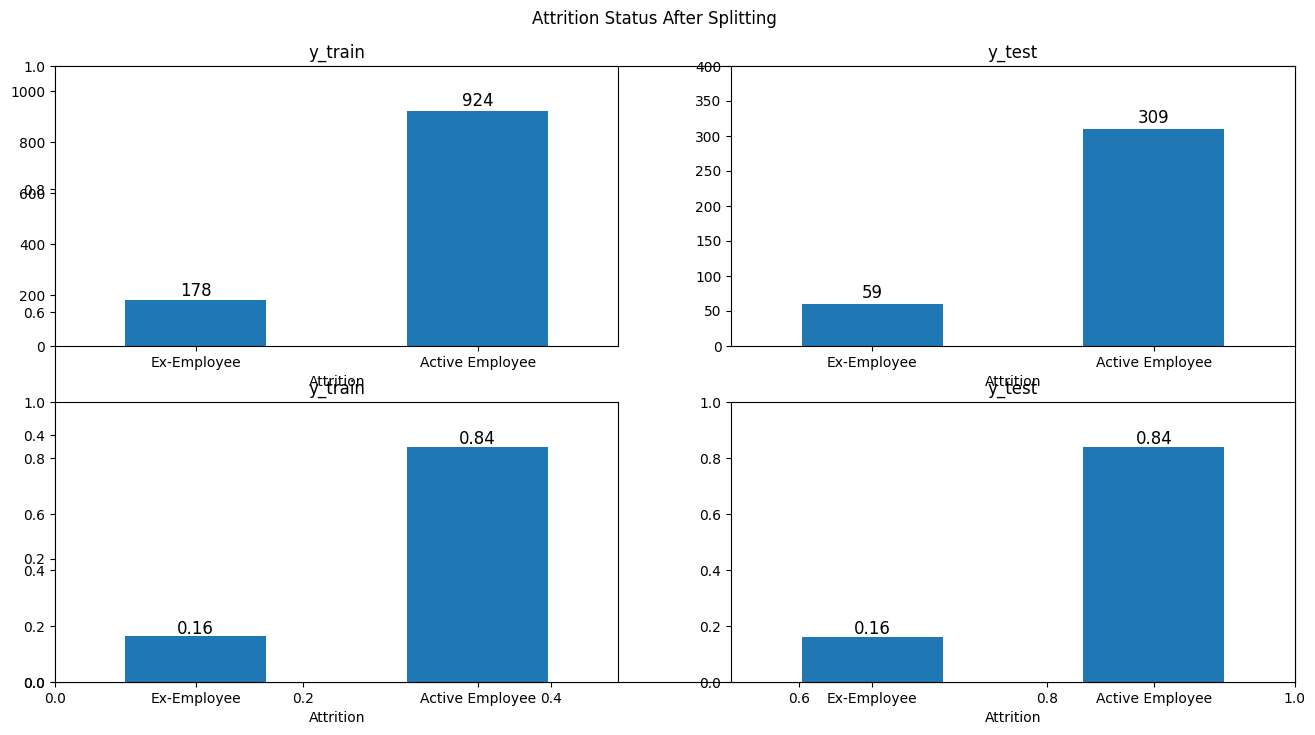

In [183]:
fig, axes = plt.subplots(figsize=(16,8))

plt.subplot(221)
g1 = y_train.value_counts().sort_values(ascending=True).plot.bar(title= 'y_train', color="#1f77b4")
g1.set_xticklabels(["Ex-Employee", "Active Employee"])
plt.xticks(rotation=0)
plt.ylim(0,1100)
for p in g1.patches:
    height = p.get_height()
    g1.text(p.get_x()+p.get_width()/2., height+20, "{:1.0f}".format(height), ha="center", fontsize=12) 
    
plt.subplot(222)
g2 = y_test.value_counts().sort_values(ascending=True).plot.bar(title= 'y_test', color="#1f77b4")
g2.set_xticklabels(["Ex-Employee", "Active Employee"])
plt.xticks(rotation=0)
plt.ylim(0,400)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+10, "{:1.0f}".format(height), ha="center", fontsize=12) 
    
plt.subplot(223)
g1 = y_train.value_counts(normalize=True).sort_values(ascending=True).plot.bar(title= 'y_train', color="#1f77b4")
g1.set_xticklabels(["Ex-Employee", "Active Employee"])
plt.xticks(rotation=0)
plt.ylim(0,1)
for p in g1.patches:
    height = p.get_height()
    g1.text(p.get_x()+p.get_width()/2., height+0.01, "{:1.2f}".format(height), ha="center", fontsize=12) 
    
plt.subplot(224)
g2 = y_test.value_counts(normalize=True).sort_values(ascending=True).plot.bar(title= 'y_test', color="#1f77b4")
g2.set_xticklabels(["Ex-Employee", "Active Employee"])
plt.xticks(rotation=0)
plt.ylim(0,1)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+0.01, "{:1.2f}".format(height), ha="center", fontsize=12) 

    
# set title and axis labels
plt.suptitle("Attrition Status After Splitting", x=0.5, y=0.95, ha="center", fontsize=12)
# fig.text(0.5, 0.001, "Attrition", ha="center", fontsize=14)
# fig.text(0.07, 0.5, "No of Employee", va="center", rotation="vertical", fontsize=14)

# plt.savefig("split_hist.png", bbox_inches="tight")
plt.show()

### Feature Scaling
Feature Scaling using MinMaxScaler essentially shrinks the range such that the range is now between 0 and n. Machine Learning algorithms perform better when input numerical variables fall within a similar scale. In this case, we are scaling between 0 and 1. Refer https://stackoverflow.com/questions/50565937/how-to-normalize-the-train-and-test-data-using-minmaxscaler-sklearn.

In [184]:
# import MinMaxScaler from sklearn.preprocessing
from sklearn.preprocessing import MinMaxScaler

# define the scaler 
scaler = MinMaxScaler(feature_range=(0, 1))

In [185]:
# fit the scaler on the TRAINING data and use the scaler to transform the training data
X_train_scaled = scaler.fit_transform(X_train)

In [186]:
# use the scaler to transform the TEST data
X_test_scaled = scaler.transform(X_test)

In [187]:
print(X_train_scaled.shape)
X_train_scaled

(1102, 29)


array([[0.35714286, 1.        , 0.34645669, ..., 0.44444444, 0.        ,
        0.47058824],
       [0.78571429, 1.        , 0.87401575, ..., 0.        , 0.13333333,
        0.41176471],
       [0.80952381, 0.5       , 0.56406586, ..., 0.44444444, 0.        ,
        0.        ],
       ...,
       [0.52380952, 0.5       , 0.49319971, ..., 0.38888889, 0.2       ,
        0.41176471],
       [0.45238095, 1.        , 0.27201145, ..., 0.38888889, 0.46666667,
        0.47058824],
       [0.4047619 , 0.5       , 0.40085898, ..., 0.11111111, 0.2       ,
        0.11764706]], shape=(1102, 29))

In [188]:
print(X_test_scaled.shape)
X_test_scaled

(368, 29)


array([[0.35714286, 1.        , 0.69649248, ..., 0.16666667, 0.        ,
        0.17647059],
       [0.61904762, 1.        , 0.71224052, ..., 0.22222222, 0.        ,
        0.11764706],
       [0.66666667, 1.        , 0.9305655 , ..., 0.83333333, 1.        ,
        0.52941176],
       ...,
       [0.11904762, 1.        , 0.31424481, ..., 0.        , 0.        ,
        0.        ],
       [0.30952381, 1.        , 0.84037223, ..., 0.        , 0.        ,
        0.        ],
       [0.9047619 , 0.5       , 0.57551897, ..., 0.38888889, 0.46666667,
        0.41176471]], shape=(368, 29))

***
# <a name="ml">Building Machine Learning Models</a>
## Baseline Algorithms
First, we will use a range of baseline algorithms (using default or out-of-the-box hyper-parameters) before we move on to more sophisticated solutions. Total of 9 algorithms considered in this section: Logistic Regression, Random Forest, SVM, KNN, Decision Tree Classifier, Gaussian NB, XGBoost, Gradient Boosting, AdaBoost. Then, we will pick the top 2-3 algorithms and further fine-tune their parameter values using GridSearchCV to achieve the best AUC score.

We will evaluate the algorithms based on two metrics:
1. Classification Accuracy is the number of correct predictions made as a ratio of all predictions made. 
 - It is the most common evaluation metric for classification problems. However, it is often misused as it is only really suitable when there are an equal number of observations in each class and all predictions and prediction errors are equally important. It is not the case in this project, so a different scoring metric may be more suitable.
<br><br>
2. Area under ROC Curve (or AUC for short) is a performance metric for binary classification problems. 
 - The AUC represents a model’s ability to discriminate between positive and negative classes. An area of 1.0 represents a model that made all predictions perfectly. An area of 0.5 represents a model as good as random.

In [189]:
# Loading liabraries for Data Modeling & Model Building

# sklearn modules for ML model selection
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
import sklearn
print(sklearn.__version__)

# sklearn modules for Model Evaluation,performance metrics
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.model_selection import KFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve, recall_score, log_loss
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, make_scorer
from sklearn.metrics import average_precision_score
from sklearn.exceptions import NotFittedError
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.exceptions import NotFittedError
from sklearn.metrics import roc_auc_score
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator
from sklearn.model_selection import GridSearchCV


1.6.1


In [190]:
# selection of algorithms to consider and set performance measure
models = []
models.append(("Logistic Regression", LogisticRegression(solver="liblinear", random_state=0)))
models.append(("Random Forest", RandomForestClassifier(n_estimators=100, random_state=0)))
models.append(("SVM", SVC(gamma="auto", random_state=0)))
models.append(("KNN", KNeighborsClassifier()))
models.append(("Decision Tree Classifier", DecisionTreeClassifier(random_state=0)))
models.append(("Gaussian NB", GaussianNB()))
models.append(("XGBoost", XGBClassifier(random_state=0)))
models.append(("Gradient Boosting", GradientBoostingClassifier(random_state=0)))
models.append(("AdaBoost", AdaBoostClassifier(random_state=0)))

In [191]:
%%time
# evaluate each model in turn and provide accuracy and standard deviation scores

acc_results = []
auc_results = []
names = []

# set table to table to populate with performance results
col = ["Algorithm", "ROC AUC Mean", "ROC AUC STD", "Accuracy Mean", "Accuracy STD"]
df_results = pd.DataFrame(columns=col)
i = 0

# evaluate each model using cross-validation
for name, model in models:
    # 10-fold cross-validation
    kfold = KFold(n_splits=10, random_state=None)  

    # accuracy scoring
    cv_acc_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring="accuracy")

    # roc_auc scoring
    cv_auc_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring="roc_auc")

    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    df_results.loc[i] = [name,
                         round(cv_auc_results.mean()*100, 2),
                         round(cv_auc_results.std()*100, 2),
                         round(cv_acc_results.mean()*100, 2),
                         round(cv_acc_results.std()*100, 2)
                         ]
    i += 1

CPU times: total: 34.6 s
Wall time: 17.2 s


In [192]:
# sort the results by Accuracy
df_results.sort_values(by=["Accuracy Mean"], ascending=False)

Algorithm  ROC AUC Mean  ROC AUC STD  Accuracy Mean  \
8                  AdaBoost         77.63         7.44          86.30   
6                   XGBoost         77.90         6.06          86.30   
7         Gradient Boosting         77.66         7.80          85.94   
1             Random Forest         77.39         5.88          85.85   
0       Logistic Regression         78.83         8.40          85.30   
2                       SVM         50.00         0.00          83.85   
3                       KNN         55.58         9.66          81.41   
5               Gaussian NB         74.98        10.54          80.12   
4  Decision Tree Classifier         59.79         6.83          79.12   

   Accuracy STD  
8          2.88  
6          2.80  
7          2.83  
1          3.52  
0          3.16  
2          4.05  
3          4.04  
5          6.07  
4          2.63

In [193]:
# sort the results by ROC AUC
df_results.sort_values(by=["ROC AUC Mean"], ascending=False)

Algorithm  ROC AUC Mean  ROC AUC STD  Accuracy Mean  \
0       Logistic Regression         78.83         8.40          85.30   
6                   XGBoost         77.90         6.06          86.30   
7         Gradient Boosting         77.66         7.80          85.94   
8                  AdaBoost         77.63         7.44          86.30   
1             Random Forest         77.39         5.88          85.85   
5               Gaussian NB         74.98        10.54          80.12   
4  Decision Tree Classifier         59.79         6.83          79.12   
3                       KNN         55.58         9.66          81.41   
2                       SVM         50.00         0.00          83.85   

   Accuracy STD  
0          3.16  
6          2.80  
7          2.83  
8          2.88  
1          3.52  
5          6.07  
4          2.63  
3          4.04  
2          4.05

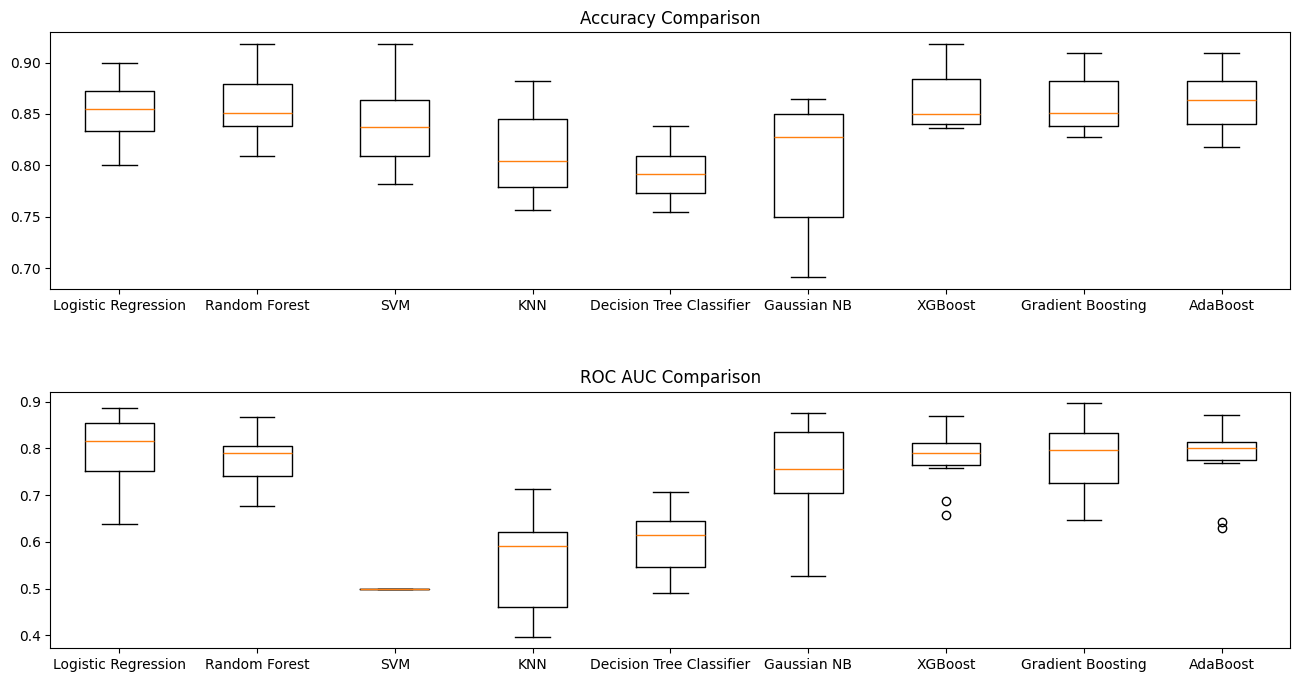

In [194]:
fig = plt.figure(figsize=(16, 8))

ax1 = fig.add_subplot(211)
plt.boxplot(acc_results)
ax1.set_xticklabels(names)
plt.title("Accuracy Comparison")

fig.subplots_adjust(hspace=0.4)

ax2 = fig.add_subplot(212)
plt.boxplot(auc_results)
ax2.set_xticklabels(names)
plt.title("ROC AUC Comparison")

# plt.savefig("boxplots.png", bbox_inches="tight")
plt.show()

Based on our Accuracy and ROC AUC comparison analysis, Logistic Regression and XGBoost have the highest mean Accuracy score while Logistic Regression also has the highest mean AUC scores. We will shortlist these two algorithms together with Random Forest for further analysis.

## Logistic Regression

In [195]:
kfold = KFold(n_splits=10, random_state=None)
modelCV = LogisticRegression(solver='liblinear', random_state=None)
scoring = 'roc_auc'
results = cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print(results, "\n")
print("Average AUC score = {:1.4f}; standard deviation = {:1.4f}".format(results.mean(), results.std()))

[0.88571429 0.85671937 0.80426357 0.63929825 0.85500268 0.74157303
 0.84970238 0.82877193 0.64026403 0.78125   ] 

Average AUC score = 0.7883; standard deviation = 0.0840


#### Fine-tuning
GridSearchCV allows us to fine-tune hyper-parameters by searching over specified parameter values for an estimator. The results from GridSearchCV provided us with fine-tuned hyper-parameter using ROC_AUC as the scoring metric.

In [196]:
%%time
param_grid = {"C": np.arange(1e-01, 1.01, 0.1), "class_weight": ["balanced", None]} # hyper-parameter list to fine-tune

log_gs = GridSearchCV(LogisticRegression(solver="liblinear", 
                                         random_state=0),
                                         
                                         return_train_score=True,
                                         param_grid=param_grid,
                                         scoring="roc_auc",
                                         cv=10)

log_gs.fit(X_train, y_train)

print("="*20)
print("best estimator: " + str(log_gs.best_estimator_))
print("best params: " + str(log_gs.best_params_))
print("best score:", log_gs.best_score_)
print("="*20)

best estimator: LogisticRegression(C=np.float64(0.5), random_state=0, solver='liblinear')
best params: {'C': np.float64(0.5), 'class_weight': None}
best score: 0.7997435962073781
CPU times: total: 4.44 s
Wall time: 4.46 s


In [197]:
# make predictions
y_pred = log_gs.predict(X_test)

In [198]:
# calculate accuracy score
logit_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of Logistic Regression Classifier on Test set: {:.2f}%'.format(logit_accuracy*100))

Accuracy of Logistic Regression Classifier on Test set: 86.68%


In [199]:
# Run the code to view the classification report metrics
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.88      0.98      0.92       309
           1       0.71      0.29      0.41        59

    accuracy                           0.87       368
   macro avg       0.79      0.63      0.67       368
weighted avg       0.85      0.87      0.84       368



In [200]:
# calculate AUC score using test dataset
# we will only keep probabilities associated with the employee leaving
y_pred_prob = log_gs.predict_proba(X_test)[:, 1]
logit_roc_auc = roc_auc_score(y_test, y_pred_prob)

print("AUC on Test set: {}".format(logit_roc_auc))

AUC on Test set: 0.8056058362130437


[[302   7]
 [ 42  17]]


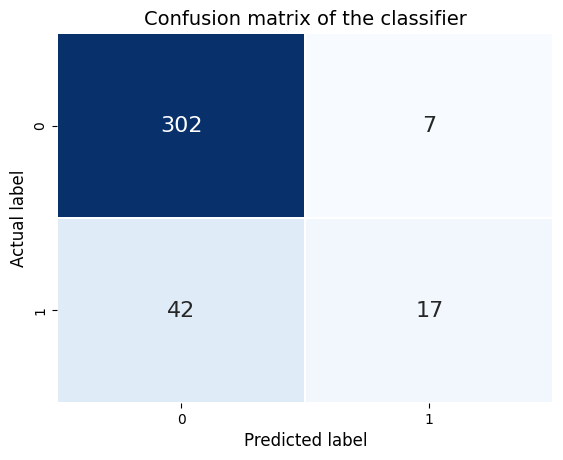

In [201]:
# import confusion_matrix
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_test, y_pred)
print(cm)

# fig, ax = plt.subplots()
# ax.xaxis.set_label_position("top")

# f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(cm, annot=True, annot_kws={"size":16}, fmt="d", cbar=False, linewidths=0.1, cmap="Blues")
plt.title('Confusion matrix of the classifier', fontsize=14)
plt.ylabel('Actual label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)

# plt.savefig("log_cm.png", bbox_inches="tight")
plt.show()

The Confusion matrix is telling us that we have 302+17 correct predictions and 42+7 incorrect predictions. In other words, an accuracy of 86%.

In [202]:
log_gs.score(X_test, y_test)

np.float64(0.8056058362130437)

In [203]:
log_gs.predict

<bound method BaseSearchCV.predict of GridSearchCV(cv=10,
             estimator=LogisticRegression(random_state=0, solver='liblinear'),
             param_grid={'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                         'class_weight': ['balanced', None]},
             return_train_score=True, scoring='roc_auc')>

## XGBoost Classifier

In [204]:
kfold = KFold(n_splits=10, random_state=0,shuffle=True)
modelCV = XGBClassifier(random_state=0)
scoring = 'roc_auc'
results = cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print(results, "\n")
print("Average AUC score = {:1.4f}; standard deviation = {:1.4f}".format(results.mean(), results.std()))

[0.74226804 0.81644737 0.735      0.85326087 0.79891304 0.78557875
 0.83611111 0.88791322 0.66555851 0.79506641] 

Average AUC score = 0.7916; standard deviation = 0.0611


#### Fine-tuning
GridSearchCV allows use to fine-tune hyper-parameters by searching over specified parameter values for an estimator. The results from GridSearchCV provided us with fine-tuned hyper-parameter using ROC_AUC as the scoring metric.
The default parameter values for XGBClassifier are n_estimators=100, max_depth=3, learning_rate=0.1, gamma=0.
<br>Refer https://xgboost.readthedocs.io/en/latest/python/python_api.html

In [205]:
%%time
xgb_classifier = XGBClassifier(random_state=0)

param_grid = {"n_estimators": [100, 150, 200],
              "max_depth": [2, 3, 4],
              "learning_rate":[0.01, 0.1],
              "gamma": [1,2,3]}



xgb_clf = GridSearchCV(xgb_classifier,
                        param_grid=param_grid,
                        scoring="roc_auc",
                        cv=10)

xgb_clf.fit(X_train, y_train)




print("="*20)
print("best estimator: " + str(xgb_clf.best_estimator_))
print("best params: " + str(xgb_clf.best_params_))
print("best score:", xgb_clf.best_score_)
print("="*20)

best estimator: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=2,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=150,
              n_jobs=None, num_parallel_tree=None, ...)
best params: {'gamma': 1, 'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 150}
best score: 0.8082352864786246
CPU times: total: 9min 3s
Wall time: 38.8 s


In [206]:
# get feature importances
importances = xgb_clf.best_estimator_.feature_importances_
df_param_coeff = pd.DataFrame(columns=['Feature', 'Coefficient'])
for i in range(len(X_train.columns)):
    feat = X_train.columns[i]
    coeff = importances[i]
    df_param_coeff.loc[i] = (feat, coeff)
df_param_coeff.sort_values(by='Coefficient', ascending=False, inplace=True)
df_param_coeff = df_param_coeff.reset_index(drop=True)
df_param_coeff.head(10)

Feature  Coefficient
0                 OverTime     0.095747
1                 JobLevel     0.092927
2        TotalWorkingYears     0.073596
3            MonthlyIncome     0.064211
4       YearsInCurrentRole     0.052363
5            MaritalStatus     0.049318
6                      Age     0.046075
7       NumCompaniesWorked     0.037293
8     YearsWithCurrManager     0.036561
9  EnvironmentSatisfaction     0.033389

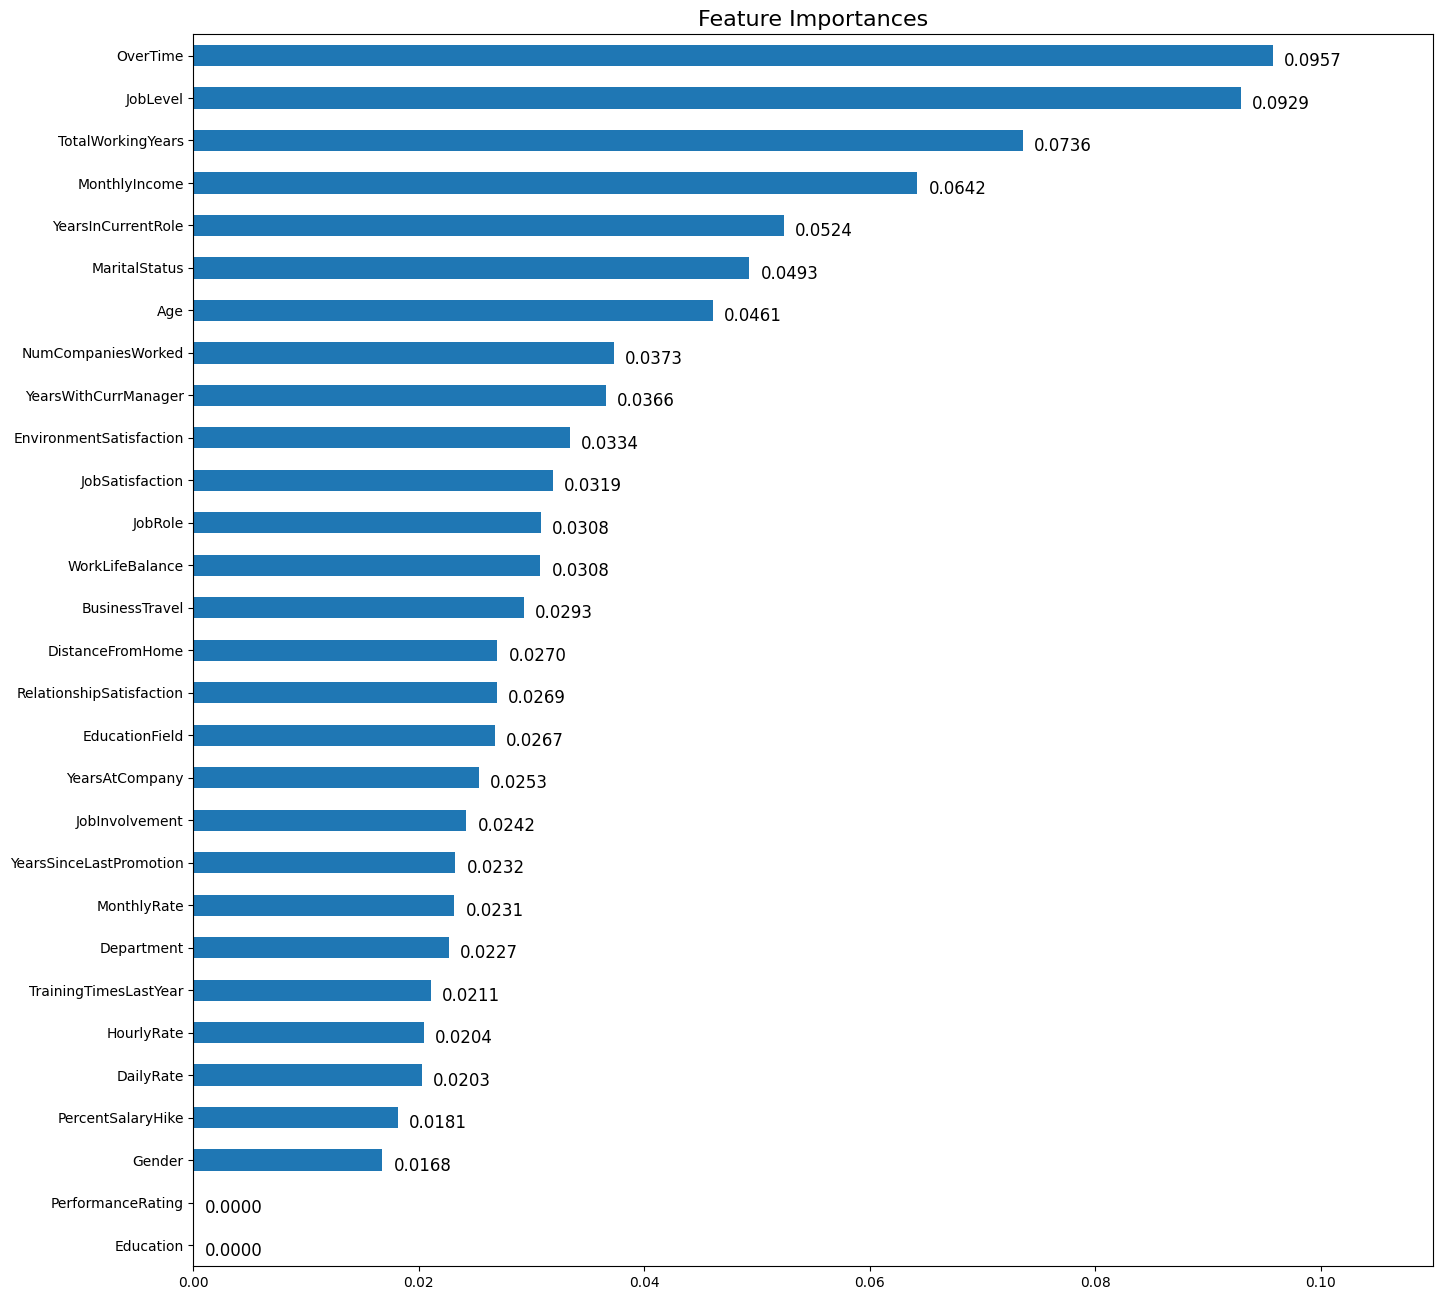

In [207]:
# plot feature importances
plt.figure(figsize=(16,16))
plt.title("Feature Importances", fontsize=16)
plt.xlim(0,0.11)
feat_importances = pd.Series(xgb_clf.best_estimator_.feature_importances_, index=X_train.columns)
g1 = feat_importances.sort_values().plot(kind="barh", color="#1f77b4")
for i in g1.patches:
    # get_width pulls left or right; get_y pushes up or down
    g1.text(i.get_width()+.001, i.get_y()+.0, "{:1.4f}".format(i.get_width()), fontsize=12)
    
# plt.savefig("xgb_f.png", bbox_inches="tight")
plt.show()

According to XGB Classifier OVertime,Job Level & Total working years this 3 features are more important while Gender performance rating & Eduction this features are least important.

In [209]:
# make predictions
y_pred = xgb_clf.predict(X_test)

In [210]:
#Predict on training data
y_train_pred = xgb_clf.predict(X_train)

In [211]:
# calculate accuracy score
xgb_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of XGBoost Classifier on test set: {:.2f}%'.format(xgb_accuracy*100))

Accuracy of XGBoost Classifier on test set: 87.50%


In [214]:
#Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)

print("Accuracy of XGBoost Classifier on Training set: {:.2f}% ".format(train_accuracy*100))

Accuracy of XGBoost Classifier on Training set: 91.74% 


In [215]:
# : Predict on training and test sets
y_train_pred = xgb_clf.predict(X_train)
y_test_pred = xgb_clf.predict(X_test)

# Step 3: Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Step 4: Print results
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Training Accuracy: 0.9174228675136116
Test Accuracy: 0.875


In [315]:
# Run the code to view the classification report metrics
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       309
           1       0.84      0.27      0.41        59

    accuracy                           0.88       368
   macro avg       0.86      0.63      0.67       368
weighted avg       0.87      0.88      0.85       368



In [316]:
# calculate AUC score using test dataset
# we will only keep probabilities associated with the employee leaving
y_pred_prob = xgb_clf.predict_proba(X_test)[:, 1]
xgb_roc_auc = roc_auc_score(y_test, y_pred_prob)

print("AUC on test set: {}".format(xgb_roc_auc))

AUC on test set: 0.8178377488892546


[[306   3]
 [ 43  16]]


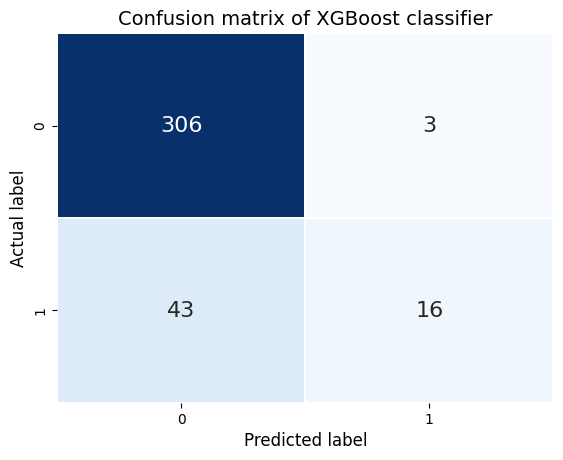

In [317]:
# import confusion_matrix
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_test, y_pred)
print(cm)

# fig, ax = plt.subplots()
# ax.xaxis.set_label_position("top")

# f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(cm, annot=True, annot_kws={"size":16}, fmt="d", cbar=False, linewidths=0.1, cmap="Blues")
plt.title('Confusion matrix of XGBoost classifier', fontsize=14)
plt.ylabel('Actual label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)

# plt.savefig("scatterplots.png", bbox_inches="tight")
plt.show()

The Confusion matrix is telling us that we have 306+16 correct predictions and 43+3 incorrect predictions. In other words, an accurac of 87.5%.

In [318]:
xgb_clf.score(X_test, y_test)

np.float64(0.8178377488892546)

In [319]:
xgb_clf.predict

<bound method BaseSearchCV.predict of GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=No...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=No

## Random Forest Classifier

In [320]:
kfold = KFold(n_splits=10, random_state=None)
modelCV = RandomForestClassifier(n_estimators=100,class_weight='balanced', random_state=None)
scoring = 'roc_auc'
results = cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print(results, "\n")
print("Average AUC score = {:1.4f}; standard deviation = {:1.4f}".format(results.mean(), results.std()))

[0.81428571 0.76333992 0.73473837 0.68070175 0.86302836 0.78170144
 0.78683036 0.81087719 0.71727173 0.82746011] 

Average AUC score = 0.7780; standard deviation = 0.0524


In [324]:
%%time
rf_classifier = RandomForestClassifier(random_state=0)

param_grid = {"n_estimators": [150, 200, 250],
              "min_samples_split":[2,4,6],
              "min_samples_leaf": [1, 2],
#               "max_depth": [5, 10, 15, 20, 25],
              "class_weight": ["balanced", None]}

grid_obj = GridSearchCV(rf_classifier,
                        param_grid=param_grid,
                        scoring="roc_auc",
                        cv=10)

grid_fit = grid_obj.fit(X_train, y_train)
rf_opt = grid_fit.best_estimator_

print("="*20)
print("best estimator: " + str(grid_obj.best_estimator_))
print("best params: " + str(grid_obj.best_params_))
print("best score:", grid_obj.best_score_)
print("="*20)

best estimator: RandomForestClassifier(n_estimators=150, random_state=0)
best params: {'class_weight': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
best score: 0.8026422997124673
CPU times: total: 2min 11s
Wall time: 2min 12s


In [325]:
# get feature importances
importances = grid_obj.best_estimator_.feature_importances_
df_param_coeff = pd.DataFrame(columns=['Feature', 'Coefficient'])
for i in range(len(X_train.columns)):
    feat = X_train.columns[i]
    coeff = importances[i]
    df_param_coeff.loc[i] = (feat, coeff)
df_param_coeff.sort_values(by='Coefficient', ascending=False, inplace=True)
df_param_coeff = df_param_coeff.reset_index(drop=True)
df_param_coeff.head(10)

Feature  Coefficient
0       MonthlyIncome     0.087008
1           DailyRate     0.062448
2            OverTime     0.059166
3                 Age     0.057074
4         MonthlyRate     0.056851
5   TotalWorkingYears     0.054219
6          HourlyRate     0.049200
7    DistanceFromHome     0.045371
8      YearsAtCompany     0.039114
9  NumCompaniesWorked     0.037925

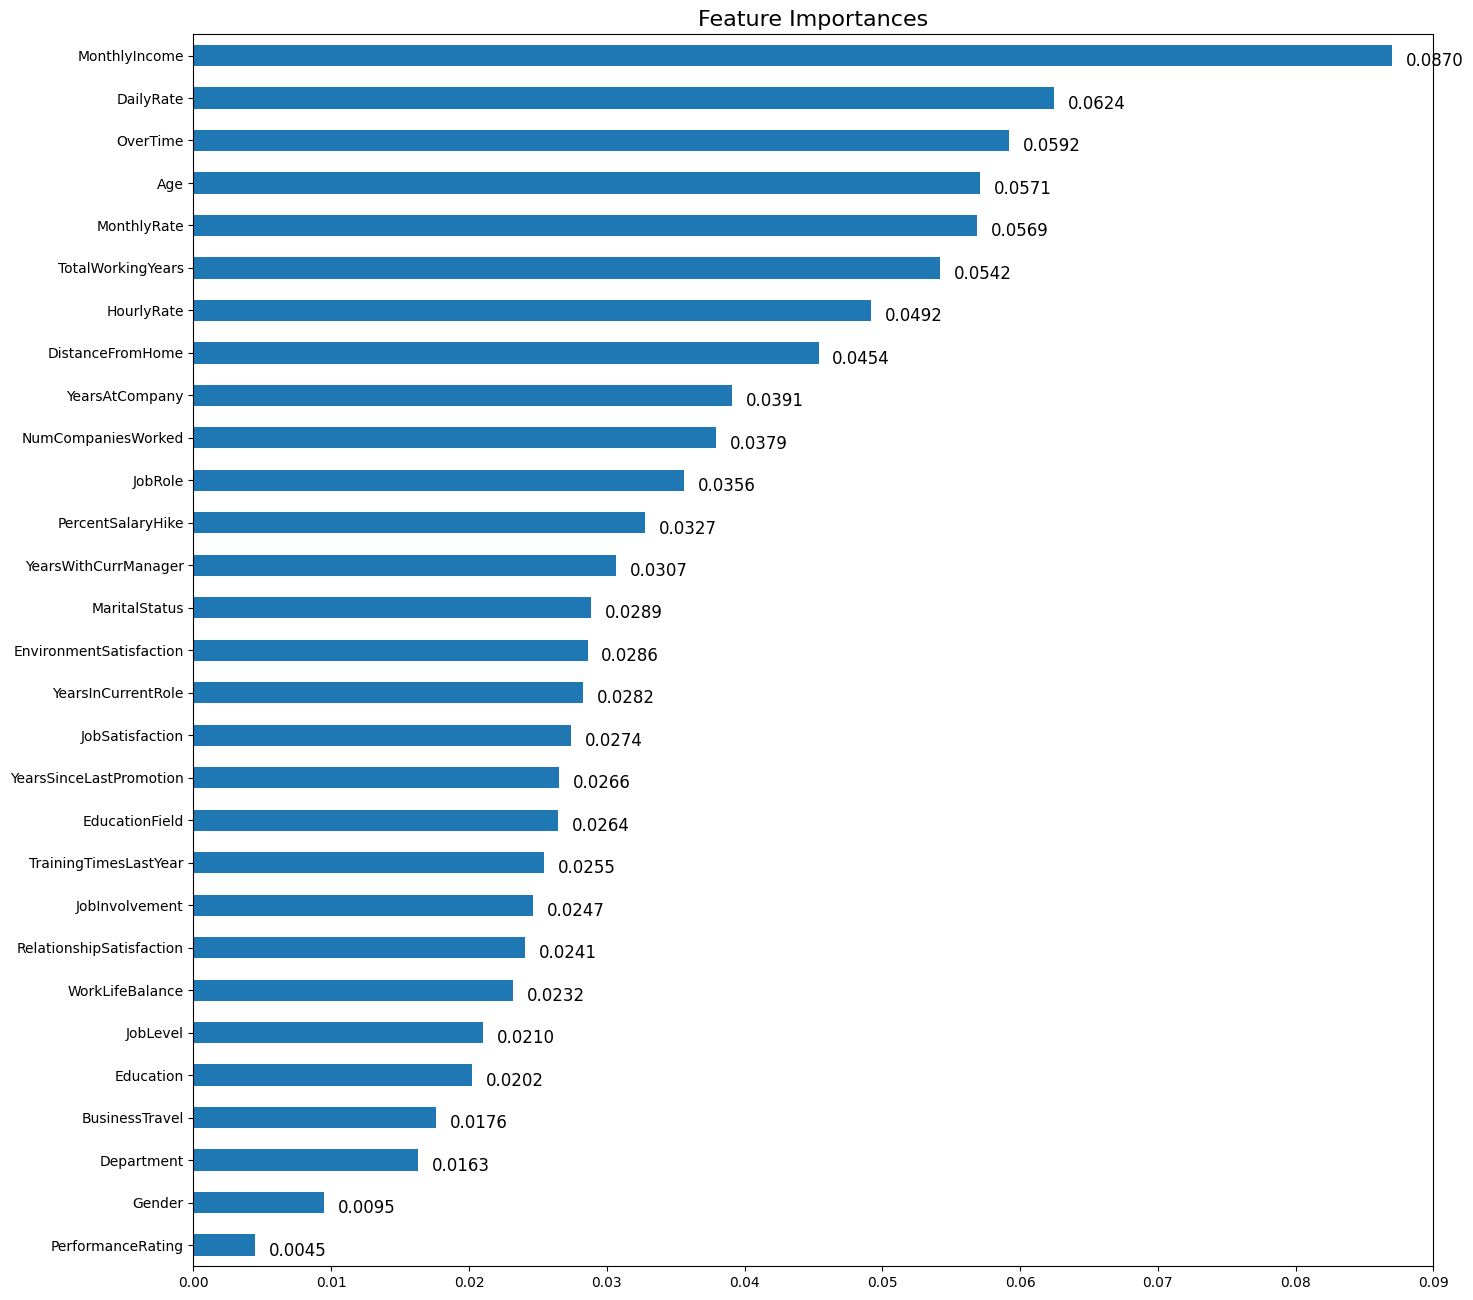

In [326]:
# plot feature importances
plt.figure(figsize=(16,16))
plt.title("Feature Importances", fontsize=16)
plt.xlim(0,0.09)
feat_importances = pd.Series(grid_obj.best_estimator_.feature_importances_, index=X_train.columns)
g1 = feat_importances.sort_values().plot(kind="barh", color="#1f77b4")
for i in g1.patches:
    # get_width pulls left or right; get_y pushes up or down
    g1.text(i.get_width()+.001, i.get_y()+.0, "{:1.4f}".format(i.get_width()), fontsize=12)
    
# plt.savefig("rf_f.png", bbox_inches="tight")
plt.show()

According to Random Forest Classifier model Features like Monthly income, Daily Rate overtime are most important while Department,Gender & Performance rating are least important features in the dataset.

In [327]:
# make predictions
y_pred = grid_obj.predict(X_test)

In [328]:
# calculate accuracy score
rf_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of Random Forest Classifier on Test set: {:.2f}%'.format(rf_accuracy*100))

Accuracy of Random Forest Classifier on Test set: 85.33%


In [329]:
# Run the code to view the classification report metrics
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       309
           1       0.86      0.10      0.18        59

    accuracy                           0.85       368
   macro avg       0.86      0.55      0.55       368
weighted avg       0.85      0.85      0.80       368



In [330]:
# calculate AUC score using test dataset
# we will only keep probabilities associated with the employee leaving
y_pred_prob = grid_obj.predict_proba(X_test)[:, 1]
rf_roc_auc = roc_auc_score(y_test, y_pred_prob)

print("AUC on Test set: {}".format(rf_roc_auc))

AUC on Test set: 0.8073336624430915


[[308   1]
 [ 53   6]]


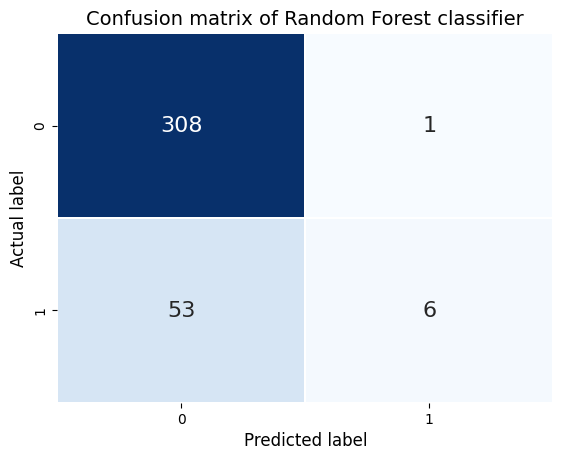

In [331]:
# import confusion_matrix
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_test, y_pred)
print(cm)

# fig, ax = plt.subplots()
# ax.xaxis.set_label_position("top")

# f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(cm, annot=True, annot_kws={"size":16}, fmt="d", cbar=False, linewidths=0.1, cmap="Blues")
plt.title('Confusion matrix of Random Forest classifier', fontsize=14)
plt.ylabel('Actual label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)

# plt.savefig("rf_cm.png", bbox_inches="tight")
plt.show()

The Confusion matrix is telling us that we have 308+6 correct predictions and 53+1 incorrect predictions. In other words, an accurac of 85.33%.

## ROC Curves
AUC - ROC curve is a performance measurement for classification problem at various thresholds settings. ROC is a probability curve and AUC represents degree or measure of separability. It tells how much a model is capable of distinguishing between classes. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner). 

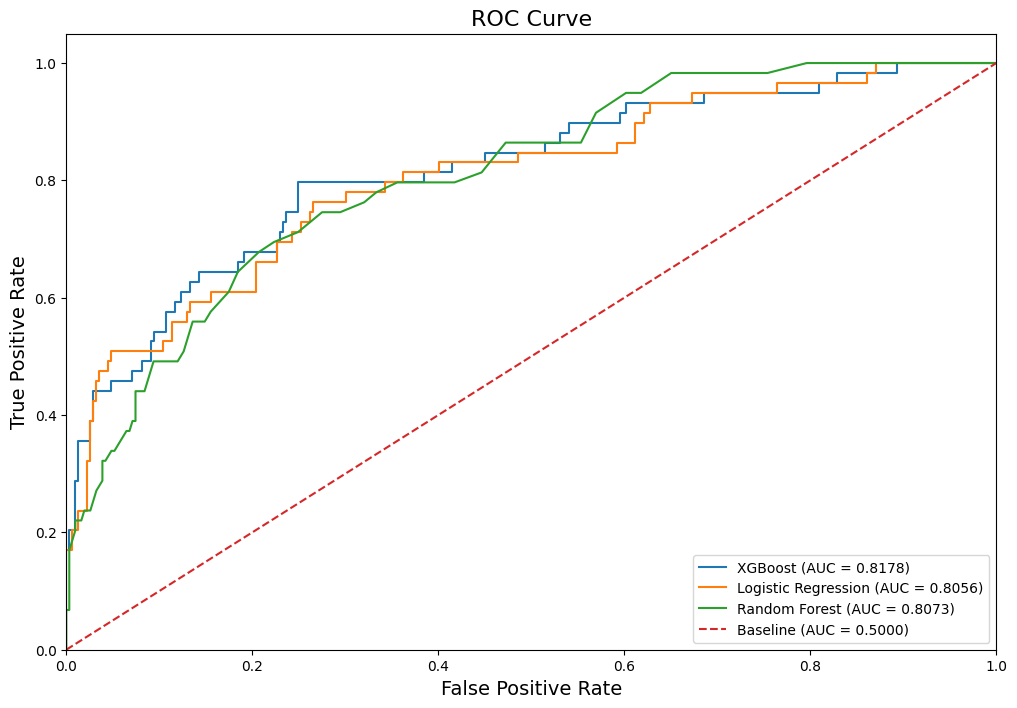

In [332]:
# create ROC curves
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, log_gs.predict_proba(X_test)[:,1])
xgb_fpr, xgb_tpr, xgb_thresholds = roc_curve(y_test, xgb_clf.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, grid_obj.predict_proba(X_test)[:,1])
plt.figure(figsize=(12, 8))

# plot XGBoost ROC
plt.plot(xgb_fpr, xgb_tpr, label="XGBoost (AUC = {:1.4f})".format(xgb_roc_auc))
# plot Logistic Regression ROC
plt.plot(fpr, tpr, label="Logistic Regression (AUC = {:1.4f})".format(logit_roc_auc))
# plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label="Random Forest (AUC = {:1.4f})".format(rf_roc_auc))
# plot Baseline ROC
plt.plot([0,1], [0,1],label="Baseline (AUC = 0.5000)", linestyle="--")

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate", fontsize=14)
plt.ylabel("True Positive Rate", fontsize=14)
plt.title("ROC Curve", fontsize=16)
plt.legend(loc="lower right")
# plt.savefig("roc.png", bbox_inches="tight")
plt.show()

In [333]:
grid_fit.score(X_test, y_test)

np.float64(0.8073336624430915)

In [334]:
grid_fit.predict

<bound method BaseSearchCV.predict of GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=0),
             param_grid={'class_weight': ['balanced', None],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [150, 200, 250]},
             scoring='roc_auc')>

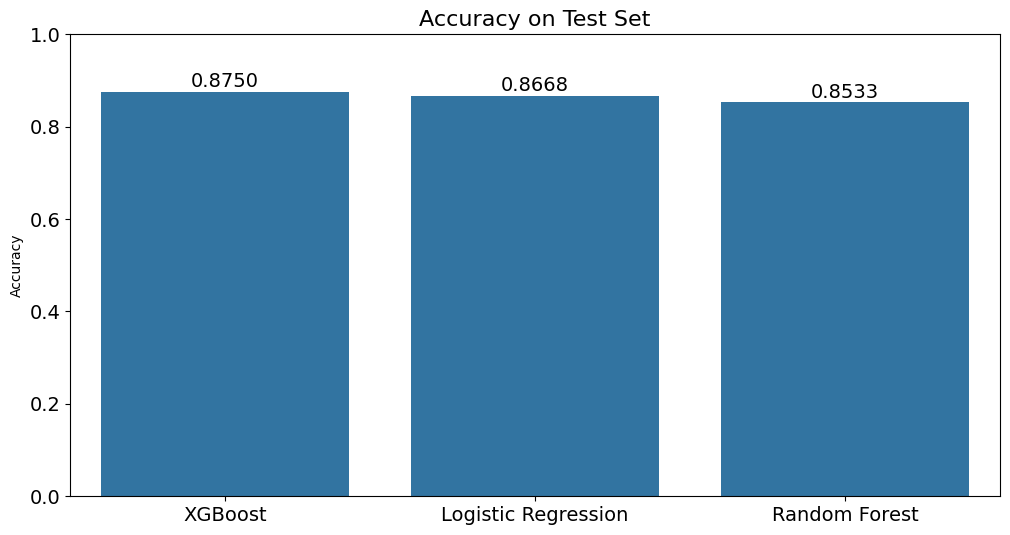

In [335]:
# combine all models' results into one dataframe
data = {"Model": ["XGBoost", "Logistic Regression", "Random Forest"], 
        "Accuracy": [xgb_accuracy, logit_accuracy, rf_accuracy]}

results = pd.DataFrame(data=data)
results


plt.figure(figsize=(12, 6))

plt.title("Accuracy on Test Set", fontsize=16)
g1 = sns.barplot(x="Model", y="Accuracy", data=results)
plt.ylim(0, 1)
g1.set_xlabel("")
g1.tick_params(labelsize=14)
for p in g1.patches:
    height = p.get_height()
    g1.text(p.get_x()+p.get_width()/2., height+0.01, "{:1.4f}".format(height), ha="center", fontsize=14) 
    
# plt.savefig("acc_results.png", bbox_inches="tight")
plt.show()

# As shown above, the fine-tuned XGBoost model showed a higher Accuracy & AUC score compared to Logistic Regression and Random Forest Classifier. 


# <a name="conclusion">Discussion and Conclusion</a> #
Comparing the 9 different algorithms with default parameter values (before fine-tuning), XGBoost has the best accuracy score (0.8750) and the best ROC AUC (0.8178). After fine-tuning the parameter values, XGBoost performed the best with the highest accuracy (0.8533) and ROC AUC (0.8178) on Test set. It is not surprising that XGBoost is an algorithm that has recently been dominating Kaggle competitions. According to the [author of XGBoost](https://www.quora.com/What-is-the-difference-between-the-R-gbm-gradient-boosting-machine-and-xgboost-extreme-gradient-boosting), both XGBoost and GBM follows the principle of gradient boosting.  There are however, the difference in modeling details. Specifically,  xgboost used a more regularized model formalization to control over-fitting, which gives it better performance. The name xgboost, though, actually refers to the engineering goal to push the limit of computations resources for boosted tree algorithms. Which is the reason why many people use xgboost. For model, it might be more suitable to be called as regularized gradient boosting.


## Risk Category, Indicators and Strategic Retention Plan
#### Risk Category
As the company generates more data on its employees (on New Joiners and recent Leavers) the algorithm can be re-trained using the additional data and theoritically generate more accurate predictions to identify high-risk employees of leaving based on the probabilistic label assigned to each feature variable (i.e. employee) by the algorithm.

Employees can be assigning a "Risk Category" based on the predicted probability of leaving the company:

- Low-risk for employees with probability < 0.6
- Medium-risk for employees with probability between 0.6 and 0.8
- High-risk for employees with probability > 0.8 

#### Strategic Retention Plan
The stronger indicators of people leaving include:
- Monthly Income: people on higher wages are less likely to leave the company. Hence, efforts should be made to gather information on industry benchmarks in the current local market to determine if the company is providing competitive wages.
- Over Time: people who work overtime are more likely to leave the company. Hence efforts must be taken to appropriately scope projects upfront with adequate support and manpower so as to reduce the use of overtime.
- Age: Employees in relatively young age bracket 25–35 are more likely to leave. Hence, efforts should be made to clearly articulate the long-term vision of the company and young employees fit in that vision, as well as provide incentives in the form of clear paths to promotion for instance.
- DistanceFromHome: Employees who live further from home are more likely to leave the company. Hence, efforts should be made to provide support in the form of company transportation for clusters of employees leaving the same area, or in the form of Transportation Allowance. Initial screening of employees based on their home location is probably not recommended as it would be regarded as a form of discrimination as long as employees make it to work on time every day.
- TotalWorkingYears: The more experienced employees are less likely to leave. Employees who have between 5–8 years of experience should be identified as potentially having a higher-risk of leaving.
- YearsAtCompany: Loyal companies are less likely to leave. Employees who hit their two-year anniversary should be identified as potentially having a higher-risk of leaving.
- YearsWithCurrManager: A large number of leavers leave 6 months after their Current Managers. By using Line Manager details for each employee, one can determine which Manager have experienced the largest numbers of employees resigning over the past year.
- WorkLifeBalance: Employees who had "Bad" Work-Life Balance are more likely to leave the company. Hence, efforts should be made to improve the work life balance of the employees such as limiting the hours of overtime, flexible working hours, option of working from home, and so on.

Several metrics can be used here to determine whether action should be taken with a Line Manager:

- number of years the Line Manager has been in a particular position: this may indicate that the employees may need management training or be assigned a mentor (ideally an Executive) in the organisation
- Patterns in the employees who have resigned: this may indicate recurring patterns in employees leaving in which case action may be taken accordingly.



A strategic "Retention Plan" should be drawn for each Risk Category group. In addition to the suggested steps for each feature listed above, face-to-face meetings between a HR representative and employees can be initiated for medium- and high-risk employees to discuss work conditions. Also, a meeting with those employee's Line Manager would allow to discuss the work environment within the team and whether steps can be taken to improve it.

If you have any feedback for this project, feel free to contact me via my [LinkedIn](https://www.linkedin.com/in/vivek-gangurde/) or [GitHub Pages](https://github.com/VivekGangurde).

***
### References
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
- https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html
- https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
- https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- https://xgboost.readthedocs.io/en/latest/python/python_api.html
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
- https://towardsdatascience.com/building-an-employee-churn-model-in-python-to-develop-a-strategic-retention-plan-57d5bd882c2d
- https://smallbusiness.chron.com/employee-turnover-vs-attrition-15846.html
- https://recruitloop.com/blog/7-ways-reduce-employee-attrition/

## Deployment of the Model

In [336]:
# Importing Liabraries for Deployment the model

from sklearn.pipeline import Pipeline
import joblib
import pickle

In [340]:
grid = GridSearchCV(pipe, parameters, cv=5, scoring='roc_auc')
grid.fit(X_train,y_train)
#
model = grid.best_estimator_
score = grid.best_score_

In [341]:
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, y_pred)
print(f'The ROC-AUC for test data is found to be {roc_auc}')

The ROC-AUC for test data is found to be 0.5492293346497724


In [342]:
print(X_train.columns.tolist())

['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [346]:
['Age', 'DailyRate', 'DistanceFromHome', 'BusinessTravel', 'Department', 'EducationField']

['Age',
 'DailyRate',
 'DistanceFromHome',
 'BusinessTravel',
 'Department',
 'EducationField']

In [347]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

numeric_features = ['Age', 'DailyRate', 'DistanceFromHome']
categorical_features = ['BusinessTravel', 'Department', 'EducationField']

preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

In [348]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('xgb_classifier', XGBClassifier())
])
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'DailyRate',
                                                   'DistanceFromHome']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['BusinessTravel',
                                                   'Department',
                                                   'EducationField'])])),
                ('xgb_classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               co...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [356]:
# As XGB Classifier is given best Accuracy results compare to other models, Will save this model for deployment on Streamlit.
model = XGBClassifier(random_state=0)
model.fit(X_train, y_train)
model.save_model("xgb_model.json") 


In [350]:
model.score(X_test, y_test) # Model Score on Test Data set

0.8586956521739131

In [351]:
print(model.get_booster().feature_names)

['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [352]:
print(X_train.columns.tolist())

['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [353]:
numeric_features = [
    'Age', 'DailyRate', 'DistanceFromHome', 'Education',
    'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
    'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
    'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
    'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
    'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
    'YearsWithCurrManager'
]

categorical_features = [
    'BusinessTravel', 'Department', 'EducationField', 'Gender',
    'JobRole', 'MaritalStatus', 'OverTime'
]

In [354]:
y.value_counts(normalize=True) * 100

Attrition
0    83.877551
1    16.122449
Name: proportion, dtype: float64

In [355]:
import xgboost
print(xgboost.__version__)

3.0.2


In [ ]:
import sys
print(sys.executable)